- **Project Initiation:**
  - The project started with an exploratory data analysis (EDA) phase.

- **Exploratory Data Analysis (EDA):**
  - Aimed to gain insights into the dataset.

- **Data Cleaning:**
  - Addressed missing values.
  - Removed duplicates from the dataset.
  - Resolved inconsistencies or errors in the data.

- **Data Transformation:**
  - Implemented data transformation techniques.
  - Included feature scaling to standardize variable ranges.
  - Applied encoding to handle categorical variables.

- **Preparation for Modeling:**
  - The data was prepared for modeling through cleaning and transformation processes.

The model building and evaluation stage focused on developing a multi-class classification model capable of accurately predicting credit score categories. Different machine learning algorithms such as decision trees,random forests, xgboost, KNN were implemented and evaluated for their performance. To address the issue of class imbalance, techniques such as oversampling the minority classes using SMOTE was employed. Model evaluation involved assessing metrics such as precision, recall, F1-score, and accuracy to measure the model's performance and ensure its effectiveness in classifying credit scores. The project concluded with a well-performing model that could assist financial institutions in making informed decisions based on accurate credit score classification.

In [6639]:
import numpy as np 
import pandas as pd 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
import re
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import make_scorer

In [6436]:
df_og_train=pd.read_csv("C:\\Users\\ajays\\Documents\\8O8L\\final project\\dataset\\archive (3)\\train.csv")
df_tkt = df_og_train.copy()
df_tkt.head()# viewing the head

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\2400105386.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_og_train=pd.read_csv("C:\\Users\\ajays\\Documents\\8O8L\\final project\\dataset\\archive (3)\\train.csv")


ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
1            809.98                31.944960                    NaN   
2            809.98                28.609352  22 Years and 3 Months   
3            809.98                31.377862  22 Years and 4 Months   
4            809.98                24.797347  22 Years and 5 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949       80.41529543900253   
1                     No           49.574949      118.28022162236736   
2                     No           49.574949         81.699521264648   
3                     No           49.574949       199.4580743910713   
4                     No           49.574949      41.420153086217326   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
1    Low_spent_Large_value_payments  284.62916249607184         Good  
2   Low_spent_Medium_value_payments   331.2098628537912         Good  
3    Low_spent_Small_value_payments  223.45130972736786         Good  
4  High_spent_Medium_value_payments  341.48923103222177         Good  

[5 rows x 28 columns]

In [6437]:
#checking Data size
df_tkt.shape

(100000, 28)

In [6438]:
df_tkt.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [6439]:
df_tkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

There seems to be missing values present in dataset. There seems to be both numerical and string values.

In [6440]:
#Examine descriptive statistics for columns that have non-numeric data types.
df_tkt.describe(exclude=np.number).T

count  unique                               top  \
ID                       100000  100000                            0x1602   
Customer_ID              100000   12500                         CUS_0xd40   
Month                    100000       8                           January   
Name                      90015   10139                            Langep   
Age                      100000    1788                                38   
SSN                      100000   12501                         #F%$D@*&8   
Occupation               100000      16                           _______   
Annual_Income            100000   18940                          36585.12   
Num_of_Loan              100000     434                                 3   
Type_of_Loan              88592    6260                     Not Specified   
Num_of_Delayed_Payment    92998     749                                19   
Changed_Credit_Limit     100000    4384                                 _   
Credit_Mix               100000       4                          Standard   
Outstanding_Debt         100000   13178                           1360.45   
Credit_History_Age        90970     404            15 Years and 11 Months   
Payment_of_Min_Amount    100000       3                               Yes   
Amount_invested_monthly   95521   91049                         __10000__   
Payment_Behaviour        100000       7    Low_spent_Small_value_payments   
Monthly_Balance           98800   98792  __-333333333333333333333333333__   
Credit_Score             100000       3                          Standard   

                          freq  
ID                           1  
Customer_ID                  8  
Month                    12500  
Name                        44  
Age                       2833  
SSN                       5572  
Occupation                7062  
Annual_Income               16  
Num_of_Loan              14386  
Type_of_Loan              1408  
Num_of_Delayed_Payment    5327  
Changed_Credit_Limit      2091  
Credit_Mix               36479  
Outstanding_Debt            24  
Credit_History_Age         446  
Payment_of_Min_Amount    52326  
Amount_invested_monthly   4305  
Payment_Behaviour        25513  
Monthly_Balance              9  
Credit_Score             53174

 The data seems to be of 12500 customers. There are multiple entries for same customers.

The "Month" variable has just 8 different values. A more thorough examination would be helpful in determining which particular months are included in the dataset.

Given that the typical age range is thought to fall between 0 and 100, the fact that the "Age" field has 1788 distinct values appears odd.

While "Customer_ID" only has 12500 unique values, the "SSN" column shows 12501 unique values. Since it is unlikely that an individual would have more than one SSN, this increases the potential that an inaccurate SSN value was input for a single customer.

### Helper functions

Created following functions that will help in exploring,analysing & cleaning of the data

Analysing one column at a time

In [6441]:
def column_peeker(df,clmn):
    print(df_tkt[clmn])
    print("No. of NUll values for the column\n",df_tkt[clmn].isnull().sum())
    print("value distributions \n",df_tkt[clmn].value_counts())

Dealing with missing values by imputation with local mode

In [6442]:
#def categorical_value_cleaning(df, clmn):

### Begining with the categorical variables


#### 1. Credit Score

In [6443]:
column_peeker(df_tkt,'Credit_Score')

0            Good
1            Good
2            Good
3            Good
4            Good
           ...   
99995        Poor
99996        Poor
99997        Poor
99998    Standard
99999        Poor
Name: Credit_Score, Length: 100000, dtype: object
No. of NUll values for the column
 0
value distributions 
 Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64


No null values for credit score. no need for imputation

#### 2. ID 

In [6444]:
column_peeker(df_tkt,'ID')

0         0x1602
1         0x1603
2         0x1604
3         0x1605
4         0x1606
          ...   
99995    0x25fe9
99996    0x25fea
99997    0x25feb
99998    0x25fec
99999    0x25fed
Name: ID, Length: 100000, dtype: object
No. of NUll values for the column
 0
value distributions 
 0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: ID, Length: 100000, dtype: int64


All ids are unique and no null values
#### Hence this can be used AS UNIQUE IDENTIFIER

Hence no Null values

#### 3. Month 

In [6445]:
#Get Details
column_peeker(df_train,'Month')

0         January
1        February
2           March
3           April
4             May
           ...   
99995       April
99996         May
99997        June
99998        July
99999      August
Name: Month, Length: 100000, dtype: object
No. of NUll values for the column
 0
value distributions 
 January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64


January to August 8 months

Distribution of Credit_Scrore accross different months is same

In [6446]:
#convert month to date time object
df_tkt['Month'] = pd.to_datetime(df_tkt['Month'], format='%B').apply(lambda x: x.month)

#### 4. Name 
removing the name coolumn as it is irrelevant

In [6447]:
df_tkt.drop('Name', axis=1, inplace=True)

In [6448]:
df_tkt

ID Customer_ID  Month   Age          SSN Occupation Annual_Income  \
0       0x1602   CUS_0xd40      1    23  821-00-0265  Scientist      19114.12   
1       0x1603   CUS_0xd40      2    23  821-00-0265  Scientist      19114.12   
2       0x1604   CUS_0xd40      3  -500  821-00-0265  Scientist      19114.12   
3       0x1605   CUS_0xd40      4    23  821-00-0265  Scientist      19114.12   
4       0x1606   CUS_0xd40      5    23  821-00-0265  Scientist      19114.12   
...        ...         ...    ...   ...          ...        ...           ...   
99995  0x25fe9  CUS_0x942c      4    25  078-73-5990   Mechanic      39628.99   
99996  0x25fea  CUS_0x942c      5    25  078-73-5990   Mechanic      39628.99   
99997  0x25feb  CUS_0x942c      6    25  078-73-5990   Mechanic      39628.99   
99998  0x25fec  CUS_0x942c      7    25  078-73-5990   Mechanic      39628.99   
99999  0x25fed  CUS_0x942c      8    25  078-73-5990   Mechanic     39628.99_   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  ...  \
0                1824.843333                  3                4  ...   
1                        NaN                  3                4  ...   
2                        NaN                  3                4  ...   
3                        NaN                  3                4  ...   
4                1824.843333                  3                4  ...   
...                      ...                ...              ...  ...   
99995            3359.415833                  4                6  ...   
99996            3359.415833                  4                6  ...   
99997            3359.415833                  4                6  ...   
99998            3359.415833                  4                6  ...   
99999            3359.415833                  4                6  ...   

       Credit_Mix Outstanding_Debt Credit_Utilization_Ratio  \
0               _           809.98                26.822620   
1            Good           809.98                31.944960   
2            Good           809.98                28.609352   
3            Good           809.98                31.377862   
4            Good           809.98                24.797347   
...           ...              ...                      ...   
99995           _           502.38                34.663572   
99996           _           502.38                40.565631   
99997        Good           502.38                41.255522   
99998        Good           502.38                33.638208   
99999        Good           502.38                34.192463   

           Credit_History_Age Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 1 Months                    No           49.574949   
1                         NaN                    No           49.574949   
2       22 Years and 3 Months                    No           49.574949   
3       22 Years and 4 Months                    No           49.574949   
4       22 Years and 5 Months                    No           49.574949   
...                       ...                   ...                 ...   
99995   31 Years and 6 Months                    No           35.104023   
99996   31 Years and 7 Months                    No           35.104023   
99997   31 Years and 8 Months                    No           35.104023   
99998   31 Years and 9 Months                    No           35.104023   
99999  31 Years and 10 Months                    No           35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0            80.41529543900253   High_spent_Small_value_payments   
1           118.28022162236736    Low_spent_Large_value_payments   
2              81.699521264648   Low_spent_Medium_value_payments   
3            199.4580743910713    Low_spent_Small_value_payments   
4           41.420153086217326  High_spent_Medium_value_payments   
...                        ...                               ...   
99995        60.971332557184

#### 5.SSN

It is also a unique identifier and hence can be dropped we already have customerID as an identifier

In [6449]:
df_tkt.drop('SSN', axis=1, inplace=True)

In [6450]:
df_tkt

ID Customer_ID  Month   Age Occupation Annual_Income  \
0       0x1602   CUS_0xd40      1    23  Scientist      19114.12   
1       0x1603   CUS_0xd40      2    23  Scientist      19114.12   
2       0x1604   CUS_0xd40      3  -500  Scientist      19114.12   
3       0x1605   CUS_0xd40      4    23  Scientist      19114.12   
4       0x1606   CUS_0xd40      5    23  Scientist      19114.12   
...        ...         ...    ...   ...        ...           ...   
99995  0x25fe9  CUS_0x942c      4    25   Mechanic      39628.99   
99996  0x25fea  CUS_0x942c      5    25   Mechanic      39628.99   
99997  0x25feb  CUS_0x942c      6    25   Mechanic      39628.99   
99998  0x25fec  CUS_0x942c      7    25   Mechanic      39628.99   
99999  0x25fed  CUS_0x942c      8    25   Mechanic     39628.99_   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0                1824.843333                  3                4   
1                        NaN                  3                4   
2                        NaN                  3                4   
3                        NaN                  3                4   
4                1824.843333                  3                4   
...                      ...                ...              ...   
99995            3359.415833                  4                6   
99996            3359.415833                  4                6   
99997            3359.415833                  4                6   
99998            3359.415833                  4                6   
99999            3359.415833                  4                6   

       Interest_Rate  ... Credit_Mix Outstanding_Debt  \
0                  3  ...          _           809.98   
1                  3  ...       Good           809.98   
2                  3  ...       Good           809.98   
3                  3  ...       Good           809.98   
4                  3  ...       Good           809.98   
...              ...  ...        ...              ...   
99995              7  ...          _           502.38   
99996              7  ...          _           502.38   
99997           5729  ...       Good           502.38   
99998              7  ...       Good           502.38   
99999              7  ...       Good           502.38   

       Credit_Utilization_Ratio      Credit_History_Age Payment_of_Min_Amount  \
0                     26.822620   22 Years and 1 Months                    No   
1                     31.944960                     NaN                    No   
2                     28.609352   22 Years and 3 Months                    No   
3                     31.377862   22 Years and 4 Months                    No   
4                     24.797347   22 Years and 5 Months                    No   
...                         ...                     ...                   ...   
99995                 34.663572   31 Years and 6 Months                    No   
99996                 40.565631   31 Years and 7 Months                    No   
99997                 41.255522   31 Years and 8 Months                    No   
99998                 33.638208   31 Years and 9 Months                    No   
99999                 34.192463  31 Years and 10 Months                    No   

       Total_EMI_per_month Amount_invested_monthly  \
0                49.574949       80.41529543900253   
1                49.574949      118.28022162236736   
2                49.574949         81.699521264648   
3                49.574949       199.4580743910713   
4                49.574949      41.420153086217326   
...                    ...                     ...   
99995            35.104023       60.97133255718485   
99996            35.104023       54.18595028760385   
99997            35.104023       24.02847744864441   
99998            35.104023      251.67258219721603   
99999            35.104023       167.1638651610451   

                      Payment_Behaviour     Monthly_Balance Credit_Scor

#### 6.Occupation

In [6451]:
column_peeker(df_tkt,'Occupation')

0        Scientist
1        Scientist
2        Scientist
3        Scientist
4        Scientist
           ...    
99995     Mechanic
99996     Mechanic
99997     Mechanic
99998     Mechanic
99999     Mechanic
Name: Occupation, Length: 100000, dtype: object
No. of NUll values for the column
 0
value distributions 
 _______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64


####  Garbage values for this is ____

We will use custimer Id to groupby and fill by local mode and remove the garbage values replace it with NAn first followed and then replace with values using the customerID

In [6452]:
df_tkt['Occupation'] = df_tkt['Occupation'].replace('_______', np.nan )

In [6453]:
column_peeker(df_tkt,'Occupation')

0        Scientist
1        Scientist
2        Scientist
3        Scientist
4        Scientist
           ...    
99995     Mechanic
99996     Mechanic
99997     Mechanic
99998     Mechanic
99999     Mechanic
Name: Occupation, Length: 100000, dtype: object
No. of NUll values for the column
 7062
value distributions 
 Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64


In [6454]:
def cal_mode(x):
    mod=x.mode()
    return mod.iloc[0] 

In [6455]:
df_t=df_tkt.groupby('Customer_ID')
df_t=df_t['Occupation'].transform(lambda x: x.fillna(cal_mode(x)))
df_tkt['Occupation']=df_t


In [6456]:
df_t.isnull().sum()

0

In [6457]:
df_tkt['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

In [6458]:
df_tkt['Occupation'].isnull().sum()

0

#### 7. Type of Loan

In [6459]:
column_peeker(df_tkt,'Type_of_Loan')

0        Auto Loan, Credit-Builder Loan, Personal Loan,...
1        Auto Loan, Credit-Builder Loan, Personal Loan,...
2        Auto Loan, Credit-Builder Loan, Personal Loan,...
3        Auto Loan, Credit-Builder Loan, Personal Loan,...
4        Auto Loan, Credit-Builder Loan, Personal Loan,...
                               ...                        
99995                          Auto Loan, and Student Loan
99996                          Auto Loan, and Student Loan
99997                          Auto Loan, and Student Loan
99998                          Auto Loan, and Student Loan
99999                          Auto Loan, and Student Loan
Name: Type_of_Loan, Length: 100000, dtype: object
No. of NUll values for the column
 11408
value distributions 
 Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                

In [6460]:
df_tkt['Type_of_Loan'].isnull().sum()

11408

In [6461]:
df_tkt['Type_of_Loan'].value_counts(dropna=False).head(50)

NaN                                                     11408
Not Specified                                            1408
Credit-Builder Loan                                      1280
Personal Loan                                            1272
Debt Consolidation Loan                                  1264
Student Loan                                             1240
Payday Loan                                              1200
Mortgage Loan                                            1176
Auto Loan                                                1152
Home Equity Loan                                         1136
Personal Loan, and Student Loan                           320
Not Specified, and Payday Loan                            272
Mortgage Loan, and Home Equity Loan                       264
Student Loan, and Payday Loan                             256
Student Loan, and Credit-Builder Loan                     248
Credit-Builder Loan, and Not Specified                    248
Payday L

Seems like some people have multiple loans of same type 

type of loan
identify individual types ofloans
deal with not specified 
	replace with Nan and fill with group mode Not the correct way to fill it unreliable so better drop this information
rather we will not map this to the column
rebuild the types of loans columns with identifying each type of loan and 
identifying it was present in the type of loan column or not 

In [6462]:
#map all NaN's to Not specified
#Handle Type of Loan null values
df_tkt['Type_of_Loan'].replace([np.NaN], 'Not Specified', inplace=True)

In [6463]:
df_tkt['Type_of_Loan'].value_counts(dropna=False).head(50)

Not Specified                                           12816
Credit-Builder Loan                                      1280
Personal Loan                                            1272
Debt Consolidation Loan                                  1264
Student Loan                                             1240
Payday Loan                                              1200
Mortgage Loan                                            1176
Auto Loan                                                1152
Home Equity Loan                                         1136
Personal Loan, and Student Loan                           320
Not Specified, and Payday Loan                            272
Mortgage Loan, and Home Equity Loan                       264
Student Loan, and Payday Loan                             256
Credit-Builder Loan, and Not Specified                    248
Student Loan, and Credit-Builder Loan                     248
Payday Loan, and Auto Loan                                240
Payday L

We will rather not fill this "Not Specified" with mode as it is not clear at that point of time what type of loan a person had rather map it as it's own category 
Q test out with "Not Specified" and without "Not Specified"

First we will need to identify the unique types of loans as here each person has multiple types of loans

In [6464]:
# Convert the Type_of_Loan column to a list
loan_types = df_tkt['Type_of_Loan'].tolist()

In [6465]:
Uniques_loan_types=list(set(loan_types))

In [6466]:
Uniques_loan_types

['Mortgage Loan, Not Specified, Credit-Builder Loan, Payday Loan, Home Equity Loan, Auto Loan, Debt Consolidation Loan, Payday Loan, and Mortgage Loan',
 'Not Specified, Not Specified, Home Equity Loan, Student Loan, Not Specified, Personal Loan, and Not Specified',
 'Personal Loan, Credit-Builder Loan, Not Specified, Debt Consolidation Loan, Personal Loan, Payday Loan, and Personal Loan',
 'Auto Loan, Personal Loan, Credit-Builder Loan, Debt Consolidation Loan, Credit-Builder Loan, Student Loan, Student Loan, and Mortgage Loan',
 'Home Equity Loan, Not Specified, Not Specified, Payday Loan, and Credit-Builder Loan',
 'Credit-Builder Loan, Credit-Builder Loan, Student Loan, Not Specified, Credit-Builder Loan, Credit-Builder Loan, and Personal Loan',
 'Home Equity Loan, Not Specified, Student Loan, Auto Loan, Debt Consolidation Loan, and Credit-Builder Loan',
 'Payday Loan, Personal Loan, Payday Loan, Personal Loan, Mortgage Loan, Home Equity Loan, Student Loan, Credit-Builder Loan, and

In [6467]:
#There is a lot of repition we need to do something to extract individual values

In [6468]:
# Clean the strings in the list
cleaned_list = [x.lower().replace('and ', '').replace(', ', ',').strip() for x in Uniques_loan_types]

In [6469]:
cleaned_list

['mortgage loan,not specified,credit-builder loan,payday loan,home equity loan,auto loan,debt consolidation loan,payday loan,mortgage loan',
 'not specified,not specified,home equity loan,student loan,not specified,personal loan,not specified',
 'personal loan,credit-builder loan,not specified,debt consolidation loan,personal loan,payday loan,personal loan',
 'auto loan,personal loan,credit-builder loan,debt consolidation loan,credit-builder loan,student loan,student loan,mortgage loan',
 'home equity loan,not specified,not specified,payday loan,credit-builder loan',
 'credit-builder loan,credit-builder loan,student loan,not specified,credit-builder loan,credit-builder loan,personal loan',
 'home equity loan,not specified,student loan,auto loan,debt consolidation loan,credit-builder loan',
 'payday loan,personal loan,payday loan,personal loan,mortgage loan,home equity loan,student loan,credit-builder loan,payday loan',
 'debt consolidation loan,personal loan,auto loan,student loan',
 '

In [6470]:
loan_types = set()

for loan_string in cleaned_list:
    for loan in loan_string.split(','):
        loan_types.add(loan.strip())

print(loan_types)

{'not specified', 'debt consolidation loan', 'home equity loan', 'credit-builder loan', 'mortgage loan', 'auto loan', 'personal loan', 'payday loan', 'student loan'}


In [6471]:
loan_types=list(loan_types)

In [6472]:
df_tkt['Type_of_Loan'].value_counts(dropna=False).head(50)

Not Specified                                           12816
Credit-Builder Loan                                      1280
Personal Loan                                            1272
Debt Consolidation Loan                                  1264
Student Loan                                             1240
Payday Loan                                              1200
Mortgage Loan                                            1176
Auto Loan                                                1152
Home Equity Loan                                         1136
Personal Loan, and Student Loan                           320
Not Specified, and Payday Loan                            272
Mortgage Loan, and Home Equity Loan                       264
Student Loan, and Payday Loan                             256
Credit-Builder Loan, and Not Specified                    248
Student Loan, and Credit-Builder Loan                     248
Payday Loan, and Auto Loan                                240
Payday L

In [6473]:
df_tkt['Type_of_Loan'].value_counts(dropna=False).head(50)

Not Specified                                           12816
Credit-Builder Loan                                      1280
Personal Loan                                            1272
Debt Consolidation Loan                                  1264
Student Loan                                             1240
Payday Loan                                              1200
Mortgage Loan                                            1176
Auto Loan                                                1152
Home Equity Loan                                         1136
Personal Loan, and Student Loan                           320
Not Specified, and Payday Loan                            272
Mortgage Loan, and Home Equity Loan                       264
Student Loan, and Payday Loan                             256
Credit-Builder Loan, and Not Specified                    248
Student Loan, and Credit-Builder Loan                     248
Payday Loan, and Auto Loan                                240
Payday L

Seems we need to rebuild this entire column and seprately tell whether each type of loan is present or not.
This code is used to rebuild the Type_of_Loan column in the df dataframe. It replaces the original column with new columns that contain boolean values indicating whether the original column contained a specific loan type. The code first selects the top 9 loan types (excluding the most common type) and creates a new column for each of them. The new columns contain boolean values indicating whether the original Type_of_Loan column contained the corresponding loan type. Finally, the original Type_of_Loan column is deleted from the dataframe 1.

The Type_of_Loan column contains information about the type of loan for each row in the dataframe. The data obtained after running value_counts() on this column shows that the most common value is NaN, followed by Not Specified, Credit-Builder Loan, Personal Loan, Debt Consolidation Loan, Student Loan, Payday Loan, Mortgage Loan, Auto Loan, and Home Equity Loan. The remaining values are combinations of these loan types 1.
## Rebuild Type of loans Columns 


We will create a new column for each item in the loan_types list

## Rebuild Type of loans Columns 


In [6474]:
df_tkt['Type_of_Loan'].str

In [6475]:
## Rebuild Type of loans Columns 
for i in df_tkt['Type_of_Loan'].value_counts().head(9).index[:] : 
    df_tp= df_tkt['Type_of_Loan'].str
    df_tkt[i]=df_tp.contains(i)

df_tkt = df_tkt.drop(columns=['Type_of_Loan'])

In [6476]:
df_tkt

ID Customer_ID  Month   Age Occupation Annual_Income  \
0       0x1602   CUS_0xd40      1    23  Scientist      19114.12   
1       0x1603   CUS_0xd40      2    23  Scientist      19114.12   
2       0x1604   CUS_0xd40      3  -500  Scientist      19114.12   
3       0x1605   CUS_0xd40      4    23  Scientist      19114.12   
4       0x1606   CUS_0xd40      5    23  Scientist      19114.12   
...        ...         ...    ...   ...        ...           ...   
99995  0x25fe9  CUS_0x942c      4    25   Mechanic      39628.99   
99996  0x25fea  CUS_0x942c      5    25   Mechanic      39628.99   
99997  0x25feb  CUS_0x942c      6    25   Mechanic      39628.99   
99998  0x25fec  CUS_0x942c      7    25   Mechanic      39628.99   
99999  0x25fed  CUS_0x942c      8    25   Mechanic     39628.99_   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0                1824.843333                  3                4   
1                        NaN                  3                4   
2                        NaN                  3                4   
3                        NaN                  3                4   
4                1824.843333                  3                4   
...                      ...                ...              ...   
99995            3359.415833                  4                6   
99996            3359.415833                  4                6   
99997            3359.415833                  4                6   
99998            3359.415833                  4                6   
99999            3359.415833                  4                6   

       Interest_Rate  ... Credit_Score  Not Specified Credit-Builder Loan  \
0                  3  ...         Good          False                True   
1                  3  ...         Good          False                True   
2                  3  ...         Good          False                True   
3                  3  ...         Good          False                True   
4                  3  ...         Good          False                True   
...              ...  ...          ...            ...                 ...   
99995              7  ...         Poor          False               False   
99996              7  ...         Poor          False               False   
99997           5729  ...         Poor          False               False   
99998              7  ...     Standard          False               False   
99999              7  ...         Poor          False               False   

      Personal Loan  Debt Consolidation Loan Student Loan Payday Loan  \
0              True                    False        False       False   
1              True                    False        False       False   
2              True                    False        False       False   
3              True                    False        False       False   
4              True                    False        False       False   
...             ...                      ...          ...         ...   
99995         False                    False         True       False   
99996         False                    False         True       False   
99997         False                    False         True       False   
99998         False                    False         True       False   
99999         False                    False         True       False   

       Mortgage Loan Auto Loan Home Equity Loan  
0              False      True             True  
1              False      True             True  
2              False      True             True  
3              False      True             True  
4              False      True             True  
...              ...       ...              ...  
99995          False      True            False  
99996          False      True            False  
99997          False      True            False  
99998          False      True            False  
99999          False      

#### 8. Credit Mix

In [6477]:
column_peeker(df_tkt,'Credit_Mix')

0           _
1        Good
2        Good
3        Good
4        Good
         ... 
99995       _
99996       _
99997    Good
99998    Good
99999    Good
Name: Credit_Mix, Length: 100000, dtype: object
No. of NUll values for the column
 0
value distributions 
 Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64


Need to handle garbage value  _ we will fill this with group mode


In [6478]:
df_tkt['Credit_Mix'] = df_tkt['Credit_Mix'].replace('_', np.nan)

In [6479]:
df_ptp=df_tkt.groupby('Customer_ID')
df_tkt['Credit_Mix']=df_ptp['Credit_Mix'].transform(lambda x: x.fillna(cal_mode(x)))

In [6480]:
column_peeker(df_tkt,'Credit_Mix')

0        Good
1        Good
2        Good
3        Good
4        Good
         ... 
99995    Good
99996    Good
99997    Good
99998    Good
99999    Good
Name: Credit_Mix, Length: 100000, dtype: object
No. of NUll values for the column
 0
value distributions 
 Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64


all fixed now  

#### 9. Payment of Min Amount

In [6481]:
column_peeker(df_tkt,'Payment_of_Min_Amount')

0        No
1        No
2        No
3        No
4        No
         ..
99995    No
99996    No
99997    No
99998    No
99999    No
Name: Payment_of_Min_Amount, Length: 100000, dtype: object
No. of NUll values for the column
 0
value distributions 
 Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64


ok we need to do something about this NM(not mentioned)

 Payment of Min Amount is a very important metric to judge credit score from domain knowledge 

Hence, if it is not mentioned we are better off without that data as it would skew our models into uncertainity

In [6482]:
column_peeker(df_tkt,'Payment_of_Min_Amount')

0        No
1        No
2        No
3        No
4        No
         ..
99995    No
99996    No
99997    No
99998    No
99999    No
Name: Payment_of_Min_Amount, Length: 100000, dtype: object
No. of NUll values for the column
 0
value distributions 
 Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64


In [6483]:
df_tkt = df_tkt[df_tkt['Payment_of_Min_Amount'] != "NM"]

In [6484]:
column_peeker(df_tkt,'Payment_of_Min_Amount')

0        No
1        No
2        No
3        No
4        No
         ..
99995    No
99996    No
99997    No
99998    No
99999    No
Name: Payment_of_Min_Amount, Length: 87993, dtype: object
No. of NUll values for the column
 0
value distributions 
 Yes    52326
No     35667
Name: Payment_of_Min_Amount, dtype: int64


#### 10. Payment Behaviour

Certainly! Here are the steps to clean the "Payment Behaviour" field based on the provided information:

Identify Garbage Values:

Determine the garbage value(s) in the "Payment Behaviour" field.
Replace Garbage Values with NaN:

Use the NumPy library to replace the identified garbage value(s) with NaN (Not a Number).
Assign Same Payment Behaviour Value for Each Customer ID:

Group the DataFrame by the "Customer ID" and fill NaN values in the "Payment Behaviour" field with a suitable value. This could be based on a strategy like filling with the most common payment behavior for each customer.

In [6485]:
column_peeker(df_tkt,'Payment_Behaviour')

0         High_spent_Small_value_payments
1          Low_spent_Large_value_payments
2         Low_spent_Medium_value_payments
3          Low_spent_Small_value_payments
4        High_spent_Medium_value_payments
                       ...               
99995     High_spent_Large_value_payments
99996    High_spent_Medium_value_payments
99997     High_spent_Large_value_payments
99998      Low_spent_Large_value_payments
99999                              !@9#%8
Name: Payment_Behaviour, Length: 87993, dtype: object
No. of NUll values for the column
 0
value distributions 
 Low_spent_Small_value_payments      22489
High_spent_Medium_value_payments    15379
Low_spent_Medium_value_payments     12132
High_spent_Large_value_payments     12102
High_spent_Small_value_payments      9961
Low_spent_Large_value_payments       9221
!@9#%8                               6709
Name: Payment_Behaviour, dtype: int64


NO NUll values but only a single garbage value we will deal with it seperately

In [6486]:
df_tkt['Payment_Behaviour'].replace("!@9#%8", np.nan, inplace=True)

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\3620190439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt['Payment_Behaviour'].replace("!@9#%8", np.nan, inplace=True)


In [6487]:
df_o=df_tkt.groupby('Customer_ID')
df_o=df_o['Payment_Behaviour'].transform(lambda x: x.fillna(cal_mode(x)))
df_tkt['Payment_Behaviour']=df_o

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\1369165138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt['Payment_Behaviour']=df_o


In [6488]:
column_peeker(df_tkt,'Payment_Behaviour')

0         High_spent_Small_value_payments
1          Low_spent_Large_value_payments
2         Low_spent_Medium_value_payments
3          Low_spent_Small_value_payments
4        High_spent_Medium_value_payments
                       ...               
99995     High_spent_Large_value_payments
99996    High_spent_Medium_value_payments
99997     High_spent_Large_value_payments
99998      Low_spent_Large_value_payments
99999     High_spent_Large_value_payments
Name: Payment_Behaviour, Length: 87993, dtype: object
No. of NUll values for the column
 0
value distributions 
 Low_spent_Small_value_payments      24402
High_spent_Medium_value_payments    16915
High_spent_Large_value_payments     13620
Low_spent_Medium_value_payments     12826
High_spent_Small_value_payments     10553
Low_spent_Large_value_payments       9677
Name: Payment_Behaviour, dtype: int64


In [6489]:
df_tkt

ID Customer_ID  Month   Age Occupation Annual_Income  \
0       0x1602   CUS_0xd40      1    23  Scientist      19114.12   
1       0x1603   CUS_0xd40      2    23  Scientist      19114.12   
2       0x1604   CUS_0xd40      3  -500  Scientist      19114.12   
3       0x1605   CUS_0xd40      4    23  Scientist      19114.12   
4       0x1606   CUS_0xd40      5    23  Scientist      19114.12   
...        ...         ...    ...   ...        ...           ...   
99995  0x25fe9  CUS_0x942c      4    25   Mechanic      39628.99   
99996  0x25fea  CUS_0x942c      5    25   Mechanic      39628.99   
99997  0x25feb  CUS_0x942c      6    25   Mechanic      39628.99   
99998  0x25fec  CUS_0x942c      7    25   Mechanic      39628.99   
99999  0x25fed  CUS_0x942c      8    25   Mechanic     39628.99_   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0                1824.843333                  3                4   
1                        NaN                  3                4   
2                        NaN                  3                4   
3                        NaN                  3                4   
4                1824.843333                  3                4   
...                      ...                ...              ...   
99995            3359.415833                  4                6   
99996            3359.415833                  4                6   
99997            3359.415833                  4                6   
99998            3359.415833                  4                6   
99999            3359.415833                  4                6   

       Interest_Rate  ... Credit_Score  Not Specified Credit-Builder Loan  \
0                  3  ...         Good          False                True   
1                  3  ...         Good          False                True   
2                  3  ...         Good          False                True   
3                  3  ...         Good          False                True   
4                  3  ...         Good          False                True   
...              ...  ...          ...            ...                 ...   
99995              7  ...         Poor          False               False   
99996              7  ...         Poor          False               False   
99997           5729  ...         Poor          False               False   
99998              7  ...     Standard          False               False   
99999              7  ...         Poor          False               False   

      Personal Loan  Debt Consolidation Loan Student Loan Payday Loan  \
0              True                    False        False       False   
1              True                    False        False       False   
2              True                    False        False       False   
3              True                    False        False       False   
4              True                    False        False       False   
...             ...                      ...          ...         ...   
99995         False                    False         True       False   
99996         False                    False         True       False   
99997         False                    False         True       False   
99998         False                    False         True       False   
99999         False                    False         True       False   

       Mortgage Loan Auto Loan Home Equity Loan  
0              False      True             True  
1              False      True             True  
2              False      True             True  
3              False      True             True  
4              False      True             True  
...              ...       ...              ...  
99995          False      True            False  
99996          False      True            False  
99997          False      True            False  
99998          False      True            False  
99999          False      

### HAndling Numerical COlumns

Eliminate the Lead and Trailing Special Characters:

The str.replace() function can be used to efficiently remove any special characters from the start or finish of strings in the dataset.

Converting Data Types from Object to Int/Float:



To change the data type of a particular column from object to either integer or float, use the.astype(float) function.

Managing Null Values and Outliers with Customer_ID Grouping:



Sorting the DataFrame according to the 'Customer_ID' column will help it get organized.

Provide an approach to swap out null values and outliers in each group with the associated column's mode value.



#### 1. Age

In [6490]:
column_peeker(df_tkt,'Age')

0          23
1          23
2        -500
3          23
4          23
         ... 
99995      25
99996      25
99997      25
99998      25
99999      25
Name: Age, Length: 87993, dtype: object
No. of NUll values for the column
 0
value distributions 
 38       2489
31       2477
26       2472
28       2458
32       2430
         ... 
3988_       1
1908        1
3452        1
4583_       1
1342        1
Name: Age, Length: 1599, dtype: int64


Garbage values with trailing and leading _

In [6491]:
df_tkt["Age"].min()

'-500'

In [6492]:
df_tkt["Age"].max()

'995'

Maximum and minimum values are all wrong we need to do some cleaning

In [6493]:
df_tkt["Age"] = df_tkt["Age"].str.strip('_')

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\3965489583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Age"] = df_tkt["Age"].str.strip('_')


In [6494]:
df_tkt["Age"].value_counts().head(60)

38      2634
31      2609
26      2603
28      2585
32      2553
35      2550
25      2506
27      2506
44      2489
36      2488
39      2479
34      2474
41      2460
19      2455
43      2431
37      2430
20      2427
29      2417
24      2412
22      2412
30      2391
21      2349
45      2344
23      2307
40      2293
42      2270
33      2247
18      2117
46      1432
15      1410
17      1316
16      1273
55      1218
52      1205
53      1204
48      1204
49      1200
54      1162
51      1145
50      1119
47      1075
14      1027
-500     769
56       326
2756       3
5579       3
6381       3
3439       3
532        3
2546       3
4083       3
2109       3
3920       3
3640       3
4494       3
6799       3
4307       2
5981       2
4959       2
8592       2
Name: Age, dtype: int64

convert to float int jo bhi ho 

In [6495]:
df_tkt["Age"]=df_tkt["Age"].astype(float)

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\1345245026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Age"]=df_tkt["Age"].astype(float)


In [6496]:
df_tkt["Age"].dtype

dtype('float64')

In [6497]:
# Create a DataFrame with non-null values, grouped by the specified groupby column

df_gnn = df_tkt[df_tkt["Age"].notna()]
df_gnn = df_gnn.groupby("Customer_ID")
df_dp  = df_gnn["Age"].apply(list)
# Calculate the mode for each group and get the min and max of these modes
x1, y1 = df_dp.apply(lambda t: stats.mode(t)).apply([min, max])
minim, maxim = x1[0][0], y1[0][0]

# Assign NaN to values that are outliers (less than min, greater than max, or less than 0)
col = df_tkt["Age"].apply(lambda t: np.NaN if ((t < minim) or (t > maxim) or (t < 0)) else t)
col=col
# Fill NaN values with the local mode within each group
mode_by = df_tkt.groupby("Customer_ID")
md_b=mode_by["Age"].transform(lambda t: t.mode()[0] if not t.mode().empty else np.NaN)
df_tkt["Age"] = col.fillna(md_b)

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\1518411227.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  x1, y1 = df_dp.apply(lambda t: stats.mode(t)).apply([min, max])
C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\1518411227.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Age"] = col.fillna(md_b)


In [6498]:
df_tkt["Age"] = df_tkt["Age"].replace(-500.0, 52.0)

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\3599531962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Age"] = df_tkt["Age"].replace(-500.0, 52.0)


In [6499]:
df_tkt["Age"].unique()

array([23., 28., 34., 54., 55., 21., 31., 30., 24., 44., 45., 40., 41.,
       32., 33., 35., 36., 39., 37., 20., 46., 26., 42., 19., 48., 38.,
       43., 22., 16., 18., 15., 27., 25., 14., 17., 47., 53., 56., 29.,
       49., 51., 50., 52.])

#### 3.Annual Income

In [6500]:
df_tkt["Annual_Income"]

0         19114.12
1         19114.12
2         19114.12
3         19114.12
4         19114.12
           ...    
99995     39628.99
99996     39628.99
99997     39628.99
99998     39628.99
99999    39628.99_
Name: Annual_Income, Length: 87993, dtype: object

In [6501]:
column_peeker(df_tkt,"Annual_Income")

0         19114.12
1         19114.12
2         19114.12
3         19114.12
4         19114.12
           ...    
99995     39628.99
99996     39628.99
99997     39628.99
99998     39628.99
99999    39628.99_
Name: Annual_Income, Length: 87993, dtype: object
No. of NUll values for the column
 0
value distributions 
 36585.12              16
9141.63               14
33029.66              14
72524.2               14
40341.16              14
                      ..
73052.94_              1
118080.4_              1
38299.84_              1
88434.95999999998_     1
14544.27_              1
Name: Annual_Income, Length: 18321, dtype: int64


In [6502]:
df_t21=df_tkt["Annual_Income"].str
df_tkt["Annual_Income"] = df_t21.strip('_')

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\2378142500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Annual_Income"] = df_t21.strip('_')


In [6503]:
column_peeker(df_tkt,"Annual_Income")

0        19114.12
1        19114.12
2        19114.12
3        19114.12
4        19114.12
           ...   
99995    39628.99
99996    39628.99
99997    39628.99
99998    39628.99
99999    39628.99
Name: Annual_Income, Length: 87993, dtype: object
No. of NUll values for the column
 0
value distributions 
 40341.16      16
36585.12      16
109945.32     16
72524.2       15
9141.63       15
              ..
14630332.0     1
5394429.0      1
7377250.0      1
13770119.0     1
19967839.0     1
Name: Annual_Income, Length: 13389, dtype: int64


In [6504]:
df_tkt["Annual_Income"]=df_tkt["Annual_Income"].astype(float)

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\2863052524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Annual_Income"]=df_tkt["Annual_Income"].astype(float)


In [6505]:
df_tkt["Annual_Income"].dtype

dtype('float64')

In [6506]:
# Create a DataFrame with non-null values, grouped by the specified groupby column
df_gtg=df_tkt[df_tkt["Annual_Income"].notna()]
df_gtg=df_gtg.groupby("Customer_ID")
df_dr=df_gtg["Annual_Income"].apply(list)
# Calculate the mode for each group and get the min and max of these modes
x1, y1 = df_dr.apply(lambda t: stats.mode(t)).apply([min, max])
minim, maxim = x1[0][0], y1[0][0]

# Assign NaN to values that are outliers (less than min, greater than max, or less than 0)
col = df_tkt["Annual_Income"].apply(lambda k: np.NaN if ((k < minim) or (k > maxim) or (k < 0)) else k)

# Fill NaN values with the local mode within each group
mbd=df_tkt.groupby("Customer_ID")
mode_by=mbd["Annual_Income"].transform(lambda y: y.mode()[0] if not y.mode().empty else np.NaN)
df_tkt["Annual_Income"] = col.fillna(mode_by)

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\2593588983.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  x1, y1 = df_dr.apply(lambda t: stats.mode(t)).apply([min, max])
C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\2593588983.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Annual_Income"] = col.fillna(mode_by)


In [6507]:
column_peeker(df_tkt,"Annual_Income")

0        19114.12
1        19114.12
2        19114.12
3        19114.12
4        19114.12
           ...   
99995    39628.99
99996    39628.99
99997    39628.99
99998    39628.99
99999    39628.99
Name: Annual_Income, Length: 87993, dtype: float64
No. of NUll values for the column
 0
value distributions 
 109945.32    16
36585.12     16
72524.20     16
40341.16     16
33029.66     15
             ..
29043.12      3
19125.75      3
7183.53       3
36039.18      3
30447.38      2
Name: Annual_Income, Length: 12488, dtype: int64


#### 4.Monthly Inhand Salary

In [6508]:
df_tkt["Monthly_Inhand_Salary"]

0        1824.843333
1                NaN
2                NaN
3                NaN
4        1824.843333
            ...     
99995    3359.415833
99996    3359.415833
99997    3359.415833
99998    3359.415833
99999    3359.415833
Name: Monthly_Inhand_Salary, Length: 87993, dtype: float64

In [6509]:
column_peeker(df_tkt,"Monthly_Inhand_Salary")

0        1824.843333
1                NaN
2                NaN
3                NaN
4        1824.843333
            ...     
99995    3359.415833
99996    3359.415833
99997    3359.415833
99998    3359.415833
99999    3359.415833
Name: Monthly_Inhand_Salary, Length: 87993, dtype: float64
No. of NUll values for the column
 13165
value distributions 
 2295.058333     15
6769.130000     13
4387.272500     13
6082.187500     13
6358.956667     12
                ..
670.790417       1
1235.975000      1
9322.687972      1
2034.134167      1
11598.240000     1
Name: Monthly_Inhand_Salary, Length: 13196, dtype: int64


In [6510]:
df_tkt["Monthly_Inhand_Salary"]=df_tkt["Monthly_Inhand_Salary"].astype(float)

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\3454423599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Monthly_Inhand_Salary"]=df_tkt["Monthly_Inhand_Salary"].astype(float)


In [6511]:
# Create a DataFrame with non-null values, grouped by the specified groupby column
df_pot=df_tkt[df_tkt["Monthly_Inhand_Salary"].notna()]
df_pot=df_pot.groupby("Customer_ID")
df_drp=df_pot["Monthly_Inhand_Salary"].apply(list)
# Calculate the mode for each group and get the min and max of these modes
x1, y1 = df_drp.apply(lambda t: stats.mode(t)).apply([min, max])
minim, maxim = x1[0][0], y1[0][0]

# Assign NaN to values that are outliers (less than min, greater than max, or less than 0)
col = df_tkt["Monthly_Inhand_Salary"].apply(lambda p: np.NaN if ((p < minim) or (p > maxim) or (p < 0)) else p)

# Fill NaN values with the local mode within each group
MBD=df_tkt.groupby("Customer_ID")
MBD=MBD["Monthly_Inhand_Salary"].transform(lambda l: l.mode()[0] if not l.mode().empty else np.NaN)
df_tkt["Monthly_Inhand_Salary"] = col.fillna(MBD)

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\541945450.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  x1, y1 = df_drp.apply(lambda t: stats.mode(t)).apply([min, max])
C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\541945450.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Monthly_Inhand_Salary"] = col.fillna(MBD)


In [6512]:
df_tkt["Monthly_Inhand_Salary"].max()

15204.633333333331

In [6513]:
column_peeker(df_tkt,"Monthly_Inhand_Salary")

0        1824.843333
1        1824.843333
2        1824.843333
3        1824.843333
4        1824.843333
            ...     
99995    3359.415833
99996    3359.415833
99997    3359.415833
99998    3359.415833
99999    3359.415833
Name: Monthly_Inhand_Salary, Length: 87993, dtype: float64
No. of NUll values for the column
 0
value distributions 
 1315.560833     16
2295.058333     16
4387.272500     15
6769.130000     14
6082.187500     14
                ..
10127.548143     1
1056.522397      1
7635.246667      1
9664.622500      1
1612.987484      1
Name: Monthly_Inhand_Salary, Length: 13196, dtype: int64


#### 5.Num Bank Accounts

In [6514]:
df_tkt["Num_Bank_Accounts"]

0        3
1        3
2        3
3        3
4        3
        ..
99995    4
99996    4
99997    4
99998    4
99999    4
Name: Num_Bank_Accounts, Length: 87993, dtype: int64

In [6515]:
column_peeker(df_tkt,"Num_Bank_Accounts")

0        3
1        3
2        3
3        3
4        3
        ..
99995    4
99996    4
99997    4
99998    4
99999    4
Name: Num_Bank_Accounts, Length: 87993, dtype: int64
No. of NUll values for the column
 0
value distributions 
 6       11423
7       11291
8       11260
4       10780
5       10666
        ...  
1677        1
1567        1
785         1
182         1
697         1
Name: Num_Bank_Accounts, Length: 877, dtype: int64


In [6516]:
df_tkt["Num_Bank_Accounts"]=df_tkt["Num_Bank_Accounts"].astype(float)

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\590316989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Num_Bank_Accounts"]=df_tkt["Num_Bank_Accounts"].astype(float)


In [6517]:
# Create a DataFrame with non-null values, grouped by the specified groupby column
df_drop = df_tkt[df_tkt["Num_Bank_Accounts"].notna()]
df_drop=df_drop.groupby("Customer_ID")
df_drop=df_drop["Num_Bank_Accounts"].apply(list)

# Calculate the mode for each group and get the min and max of these modes
x1, y1 = df_drop.apply(lambda i: stats.mode(i)).apply([min, max])
minim, maxim = x1[0][0], y1[0][0]

# Assign NaN to values that are outliers (less than min, greater than max, or less than 0)
col = df_tkt["Num_Bank_Accounts"].apply(lambda z: np.NaN if ((z < minim) or (z > maxim) or (z < 0)) else z)

# Fill NaN values with the local mode within each group
mode_by = df_tkt.groupby("Customer_ID")
mode_by =mode_by["Num_Bank_Accounts"].transform(lambda e: e.mode()[0] if not e.mode().empty else np.NaN)
df_tkt["Num_Bank_Accounts"] = col.fillna(mode_by)

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\3852155502.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  x1, y1 = df_drop.apply(lambda i: stats.mode(i)).apply([min, max])
C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\3852155502.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Num_Bank_Accounts"] = col.fillna(mode_by)


In [6518]:
column_peeker(df_tkt,"Num_Bank_Accounts")

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
99995    4.0
99996    4.0
99997    4.0
99998    4.0
99999    4.0
Name: Num_Bank_Accounts, Length: 87993, dtype: float64
No. of NUll values for the column
 0
value distributions 
  6.0     11583
 7.0     11437
 8.0     11417
 4.0     10918
 5.0     10823
 3.0     10639
 9.0      4822
 10.0     4674
 1.0      3968
 0.0      3857
 2.0      3828
-1.0        20
 11.0        7
Name: Num_Bank_Accounts, dtype: int64


#### 6.Num Credit Cards

In [6519]:
column_peeker(df_tkt,"Num_Credit_Card")

0        4
1        4
2        4
3        4
4        4
        ..
99995    6
99996    6
99997    6
99998    6
99999    6
Name: Num_Credit_Card, Length: 87993, dtype: int64
No. of NUll values for the column
 0
value distributions 
 5       16236
6       14626
7       14602
4       12339
3       11664
        ...  
204         1
175         1
693         1
1114        1
679         1
Name: Num_Credit_Card, Length: 1120, dtype: int64


In [6520]:
df_tkt["Num_Credit_Card"]=df_tkt["Num_Credit_Card"].astype(float)

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\2935284233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Num_Credit_Card"]=df_tkt["Num_Credit_Card"].astype(float)


In [6521]:
# Create a DataFrame with non-null values, grouped by the specified groupby column
df_drop = df_tkt[df_tkt["Num_Credit_Card"].notna()]
df_drop = df_drop.groupby("Customer_ID")["Num_Credit_Card"].apply(list)
# Calculate the mode for each group and get the min and max of these modes
x1, y1 = df_drop.apply(lambda i: stats.mode(i)).apply([min, max])
minim, maxim = x1[0][0], y1[0][0]

# Assign NaN to values that are outliers (less than min, greater than max, or less than 0)
col = df_tkt["Num_Credit_Card"].apply(lambda r: np.NaN if ((r < minim) or (r > maxim) or (r < 0)) else r)

# Fill NaN values with the local mode within each group
mode_by = df_tkt.groupby("Customer_ID")
mode_by = mode_by["Num_Credit_Card"].transform(lambda g: g.mode()[0] if not g.mode().empty else np.NaN)
df_tkt["Num_Credit_Card"] = col.fillna(mode_by)

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\2605653091.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  x1, y1 = df_drop.apply(lambda i: stats.mode(i)).apply([min, max])
C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\2605653091.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Num_Credit_Card"] = col.fillna(mode_by)


In [6522]:
column_peeker(df_tkt,"Num_Credit_Card")

0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
99995    6.0
99996    6.0
99997    6.0
99998    6.0
99999    6.0
Name: Num_Credit_Card, Length: 87993, dtype: float64
No. of NUll values for the column
 0
value distributions 
 5.0     16634
7.0     14955
6.0     14944
4.0     12626
3.0     11915
8.0      4451
10.0     4380
9.0      4183
2.0      1943
1.0      1919
11.0       31
0.0        12
Name: Num_Credit_Card, dtype: int64


#### 7.Interest Rate

In [6523]:
column_peeker(df_tkt,"Interest_Rate")

0           3
1           3
2           3
3           3
4           3
         ... 
99995       7
99996       7
99997    5729
99998       7
99999       7
Name: Interest_Rate, Length: 87993, dtype: int64
No. of NUll values for the column
 0
value distributions 
 5       4395
8       4394
6       4178
12      3990
7       3964
        ... 
5762       1
4372       1
3547       1
4905       1
5729       1
Name: Interest_Rate, Length: 1583, dtype: int64


In [6524]:
df_tkt["Interest_Rate"]=df_tkt["Interest_Rate"].astype(float)

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\129672723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Interest_Rate"]=df_tkt["Interest_Rate"].astype(float)


In [6525]:
# Create a DataFrame with non-null values, grouped by the specified groupby column
df_drop = df_tkt[df_tkt["Interest_Rate"].notna()]
df_drop = df_drop.groupby("Customer_ID")
df_drop = df_drop["Interest_Rate"].apply(list)
# Calculate the mode for each group and get the min and max of these modes
x1, y1 = df_drop.apply(lambda h: stats.mode(h)).apply([min, max])
minim, maxim = x1[0][0], y1[0][0]

# Assign NaN to values that are outliers (less than min, greater than max, or less than 0)
col = df_tkt["Interest_Rate"].apply(lambda i: np.NaN if ((i < minim) or (i > maxim) or (i < 0)) else i)

# Fill NaN values with the local mode within each group
mode_by = df_tkt.groupby("Customer_ID")
mode_by = mode_by["Interest_Rate"].transform(lambda p: p.mode()[0] if not p.mode().empty else np.NaN)
df_tkt["Interest_Rate"] = col.fillna(mode_by)

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\3148291998.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  x1, y1 = df_drop.apply(lambda h: stats.mode(h)).apply([min, max])
C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\3148291998.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Interest_Rate"] = col.fillna(mode_by)


In [6526]:
column_peeker(df_tkt,"Interest_Rate")

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
99995    7.0
99996    7.0
99997    7.0
99998    7.0
99999    7.0
Name: Interest_Rate, Length: 87993, dtype: float64
No. of NUll values for the column
 0
value distributions 
 5.0     4503
8.0     4474
6.0     4277
12.0    4084
7.0     4049
9.0     4018
10.0    3999
11.0    3997
18.0    3687
15.0    3543
20.0    3515
17.0    3456
16.0    3354
19.0    3228
3.0     2517
1.0     2441
4.0     2292
2.0     2238
13.0    2172
14.0    1987
22.0    1559
32.0    1553
30.0    1537
23.0    1520
24.0    1516
29.0    1482
27.0    1442
28.0    1437
25.0    1413
21.0    1407
34.0    1355
26.0    1345
31.0    1299
33.0    1297
Name: Interest_Rate, dtype: int64


#### 8.Delay from Due Date

In [6527]:
column_peeker(df_tkt,"Delay_from_due_date")

0         3
1        -1
2         3
3         5
4         6
         ..
99995    23
99996    18
99997    27
99998    20
99999    18
Name: Delay_from_due_date, Length: 87993, dtype: int64
No. of NUll values for the column
 0
value distributions 
  15    3133
 13    3017
 14    2917
 8     2914
 9     2866
       ... 
-4       55
 65      50
-5       30
 66      29
 67      21
Name: Delay_from_due_date, Length: 73, dtype: int64


In [6528]:
df_tkt["Delay_from_due_date"]=df_tkt["Delay_from_due_date"].astype(float)

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\3300669997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Delay_from_due_date"]=df_tkt["Delay_from_due_date"].astype(float)


In [6529]:
# Create a DataFrame with non-null values, grouped by the specified groupby column
df_drop = df_tkt[df_tkt["Delay_from_due_date"].notna()]
df_drop = df_drop.groupby("Customer_ID")
df_drop = df_drop["Delay_from_due_date"].apply(list)
# Calculate the mode for each group and get the min and max of these modes
x1, y1 = df_drop.apply(lambda y: stats.mode(y)).apply([min, max])
minim, maxim = x1[0][0], y1[0][0]

# Assign NaN to values that are outliers (less than min, greater than max, or less than 0)
col = df_tkt["Delay_from_due_date"].apply(lambda w: np.NaN if ((w < minim) or (w > maxim) or (w < 0)) else w)

# Fill NaN values with the local mode within each group
mode_by = df_tkt.groupby("Customer_ID")
mode_by = mode_by["Delay_from_due_date"].transform(lambda r1: r1.mode()[0] if not r1.mode().empty else np.NaN)
df_tkt["Delay_from_due_date"] = col.fillna(mode_by)

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\1141271179.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  x1, y1 = df_drop.apply(lambda y: stats.mode(y)).apply([min, max])
C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\1141271179.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Delay_from_due_date"] = col.fillna(mode_by)


In [6530]:
column_peeker(df_tkt,"Delay_from_due_date")

0         3.0
1         3.0
2         3.0
3         5.0
4         6.0
         ... 
99995    23.0
99996    18.0
99997    27.0
99998    20.0
99999    18.0
Name: Delay_from_due_date, Length: 87993, dtype: float64
No. of NUll values for the column
 0
value distributions 
  15.0    3133
 13.0    3017
 14.0    2917
 8.0     2914
 9.0     2866
         ... 
 46.0     426
-1.0        8
-2.0        6
-4.0        6
-5.0        5
Name: Delay_from_due_date, Length: 67, dtype: int64


In [6531]:
df_tkt["Delay_from_due_date"].min()

-5.0

In [6532]:
df_tkt["Delay_from_due_date"].max()

62.0

#### 9.Number of Delayed Payment

In [6533]:
column_peeker(df_tkt,"Num_of_Delayed_Payment")

0          7
1        NaN
2          7
3          4
4        NaN
        ... 
99995      7
99996      7
99997      6
99998    NaN
99999      6
Name: Num_of_Delayed_Payment, Length: 87993, dtype: object
No. of NUll values for the column
 6134
value distributions 
 19      4641
17      4616
16      4546
18      4531
10      4523
        ... 
1502       1
4075       1
3845       1
1060       1
2047       1
Name: Num_of_Delayed_Payment, Length: 671, dtype: int64


In [6534]:
df_tkt["Num_of_Delayed_Payment"].value_counts().head(60)

19     4641
17     4616
16     4546
18     4531
10     4523
15     4454
20     4340
12     4314
9      4239
8      4150
11     4133
14     3572
13     3475
21     2219
6      2013
7      2002
22     1959
5      1763
23     1747
3      1619
4      1588
2      1553
24     1446
25     1413
1      1410
0      1397
-1      278
26      276
27      215
-2      190
12_     141
10_     138
8_      135
15_     135
17_     134
20_     133
19_     130
9_      129
11_     125
16_     121
18_     120
14_     117
28      115
13_     114
-3       77
7_       73
22_      69
3_       64
6_       60
21_      55
2_       54
23_      53
25_      49
24_      48
5_       45
1_       44
4_       41
0_       34
-2_      10
-1_       8
Name: Num_of_Delayed_Payment, dtype: int64

In [6535]:
df_tkt["Num_of_Delayed_Payment"] = df_tkt["Num_of_Delayed_Payment"].str.strip('_')

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\657546731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Num_of_Delayed_Payment"] = df_tkt["Num_of_Delayed_Payment"].str.strip('_')


In [6536]:
df_tkt["Num_of_Delayed_Payment"]=df_tkt["Num_of_Delayed_Payment"].astype(float)

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\2371901206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Num_of_Delayed_Payment"]=df_tkt["Num_of_Delayed_Payment"].astype(float)


In [6537]:
# Create a DataFrame with non-null values, grouped by the specified groupby column
df_drop = df_tkt[df_tkt["Num_of_Delayed_Payment"].notna()]
df_drop = df_drop.groupby("Customer_ID")["Num_of_Delayed_Payment"].apply(list)
# Calculate the mode for each group and get the min and max of these modes
x1, y1 = df_drop.apply(lambda l: stats.mode(l)).apply([min, max])
minim, maxim = x1[0][0], y1[0][0]

# Assign NaN to values that are outliers (less than min, greater than max, or less than 0)
col = df_tkt["Num_of_Delayed_Payment"].apply(lambda e: np.NaN if ((e < minim) or (e > maxim) or (e < 0)) else e)

# Fill NaN values with the local mode within each group
mode_by = df_tkt.groupby("Customer_ID")["Num_of_Delayed_Payment"]
mode_by = mode_by.transform(lambda g: g.mode()[0] if not g.mode().empty else np.NaN)
df_tkt["Num_of_Delayed_Payment"] = col.fillna(mode_by)


C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\2224261197.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  x1, y1 = df_drop.apply(lambda l: stats.mode(l)).apply([min, max])
C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\2224261197.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Num_of_Delayed_Payment"] = col.fillna(mode_by)


In [6538]:
column_peeker(df_tkt,"Num_of_Delayed_Payment")

0        7.0
1        4.0
2        7.0
3        4.0
4        4.0
        ... 
99995    7.0
99996    7.0
99997    6.0
99998    6.0
99999    6.0
Name: Num_of_Delayed_Payment, Length: 87993, dtype: float64
No. of NUll values for the column
 0
value distributions 
  19.0    5202
 10.0    5110
 17.0    5102
 16.0    5083
 18.0    5059
 15.0    5004
 20.0    4876
 12.0    4837
 9.0     4751
 8.0     4646
 11.0    4640
 14.0    3958
 13.0    3853
 21.0    2427
 6.0     2232
 7.0     2218
 22.0    2157
 5.0     1956
 23.0    1945
 0.0     1818
 2.0     1812
 3.0     1809
 1.0     1776
 4.0     1760
 25.0    1731
 24.0    1625
 26.0     282
 27.0     224
-1.0       50
-2.0       39
-3.0       11
Name: Num_of_Delayed_Payment, dtype: int64


#### 10.Changed Credit Limit

In [6539]:
column_peeker(df_tkt,"Changed_Credit_Limit")

0        11.27
1        11.27
2            _
3         6.27
4        11.27
         ...  
99995     11.5
99996     11.5
99997     11.5
99998     11.5
99999     11.5
Name: Changed_Credit_Limit, Length: 87993, dtype: object
No. of NUll values for the column
 0
value distributions 
 _                     1828
8.22                   122
7.35                   115
11.5                   112
11.32                  109
                      ... 
29.26                    1
1.3199999999999998       1
12.510000000000002       1
-3.67                    1
21.17                    1
Name: Changed_Credit_Limit, Length: 4303, dtype: int64


In [6540]:
df_tkt["Changed_Credit_Limit"] = df_tkt["Changed_Credit_Limit"].str.strip('_')

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\174992862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Changed_Credit_Limit"] = df_tkt["Changed_Credit_Limit"].str.strip('_')


In [6541]:
df_tkt["Changed_Credit_Limit"] = df_tkt["Changed_Credit_Limit"].replace('', 0)

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\3106802851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Changed_Credit_Limit"] = df_tkt["Changed_Credit_Limit"].replace('', 0)


In [6542]:
df_tkt["Changed_Credit_Limit"]=df_tkt["Changed_Credit_Limit"].astype(float)

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\334596713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Changed_Credit_Limit"]=df_tkt["Changed_Credit_Limit"].astype(float)


In [6543]:
# Create a DataFrame with non-null values, grouped by the specified groupby column
df_drop = df_tkt[df_tkt["Changed_Credit_Limit"].notna()]
df_drop = df_drop.groupby("Customer_ID")["Changed_Credit_Limit"]
df_drop = df_drop.apply(list)
# Calculate the mode for each group and get the min and max of these modes
x1, y1 = df_drop.apply(lambda m: stats.mode(m)).apply([min, max])
minim, maxim = x1[0][0], y1[0][0]

# Assign NaN to values that are outliers (less than min, greater than max, or less than 0)
col = df_tkt["Changed_Credit_Limit"].apply(lambda e1: np.NaN if ((e1 < minim) or (e1 > maxim) or (e1 < 0)) else e1)

# Fill NaN values with the local mode within each group
mode_by = df_tkt.groupby("Customer_ID")
mode_by = mode_by["Changed_Credit_Limit"].transform(lambda rt: rt.mode()[0] if not rt.mode().empty else np.NaN)
df_tkt["Changed_Credit_Limit"] = col.fillna(mode_by)

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\3839654611.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  x1, y1 = df_drop.apply(lambda m: stats.mode(m)).apply([min, max])
C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\3839654611.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Changed_Credit_Limit"] = col.fillna(mode_by)


In [6544]:
column_peeker(df_tkt,"Changed_Credit_Limit")

0        11.27
1        11.27
2         0.00
3         6.27
4        11.27
         ...  
99995    11.50
99996    11.50
99997    11.50
99998    11.50
99999    11.50
Name: Changed_Credit_Limit, Length: 87993, dtype: float64
No. of NUll values for the column
 0
value distributions 
 0.00     1832
8.22      122
7.35      115
11.50     112
11.32     109
         ... 
20.50       1
8.31        1
0.85        1
10.42       1
21.17       1
Name: Changed_Credit_Limit, Length: 3516, dtype: int64


In [6545]:
df_tkt["Changed_Credit_Limit"].max()

29.98

#### 11. Number of Credit Inquiries

In [6546]:
column_peeker(df_tkt,"Num_Credit_Inquiries")

0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
99995    3.0
99996    3.0
99997    3.0
99998    3.0
99999    3.0
Name: Num_Credit_Inquiries, Length: 87993, dtype: float64
No. of NUll values for the column
 1749
value distributions 
 4.0       9885
3.0       7780
6.0       7178
7.0       7120
2.0       7094
          ... 
1389.0       1
1217.0       1
699.0        1
449.0        1
74.0         1
Name: Num_Credit_Inquiries, Length: 1119, dtype: int64


In [6547]:
# Create a DataFrame with non-null values, grouped by the specified groupby column
df_drop = df_tkt[df_tkt["Num_Credit_Inquiries"].notna()]
df_drop = df_drop.groupby("Customer_ID")["Num_Credit_Inquiries"].apply(list)
# Calculate the mode for each group and get the min and max of these modes
x1, y1 = df_drop.apply(lambda r: stats.mode(r)).apply([min, max])
minim, maxim = x1[0][0], y1[0][0]

# Assign NaN to values that are outliers (less than min, greater than max, or less than 0)
col = df_tkt["Num_Credit_Inquiries"].apply(lambda q: np.NaN if ((q < minim) or (q > maxim) or (q < 0)) else q)

# Fill NaN values with the local mode within each group
mode_by = df_tkt.groupby("Customer_ID")
mode_by = mode_by["Num_Credit_Inquiries"].transform(lambda v: v.mode()[0] if not v.mode().empty else np.NaN)
df_tkt["Num_Credit_Inquiries"] = col.fillna(mode_by)

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\1612866550.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  x1, y1 = df_drop.apply(lambda r: stats.mode(r)).apply([min, max])
C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\1612866550.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Num_Credit_Inquiries"] = col.fillna(mode_by)


In [6548]:
df_tkt["Num_Credit_Inquiries"].max()

17.0

#### 12. Outstanding Debt

In [6549]:
column_peeker(df_tkt,"Outstanding_Debt")

0        809.98
1        809.98
2        809.98
3        809.98
4        809.98
          ...  
99995    502.38
99996    502.38
99997    502.38
99998    502.38
99999    502.38
Name: Outstanding_Debt, Length: 87993, dtype: object
No. of NUll values for the column
 0
value distributions 
 1360.45    22
1109.03    21
460.46     19
1151.7     18
1456.12    16
           ..
577.4_      1
479.81_     1
654.12_     1
263.49_     1
785.19_     1
Name: Outstanding_Debt, Length: 13051, dtype: int64


In [6550]:
df_tkt["Outstanding_Debt"] = df_tkt["Outstanding_Debt"].str.strip('_')

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\2920516665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Outstanding_Debt"] = df_tkt["Outstanding_Debt"].str.strip('_')


In [6551]:
df_tkt["Outstanding_Debt"]=df_tkt["Outstanding_Debt"].astype(float)

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\1179872736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Outstanding_Debt"]=df_tkt["Outstanding_Debt"].astype(float)


In [6552]:
column_peeker(df_tkt,"Outstanding_Debt")

0        809.98
1        809.98
2        809.98
3        809.98
4        809.98
          ...  
99995    502.38
99996    502.38
99997    502.38
99998    502.38
99999    502.38
Name: Outstanding_Debt, Length: 87993, dtype: float64
No. of NUll values for the column
 0
value distributions 
 1109.03    22
1360.45    22
1151.70    19
460.46     19
967.75     16
           ..
4000.40     3
489.94      3
2117.29     3
1559.06     3
3141.05     2
Name: Outstanding_Debt, Length: 12203, dtype: int64


In [6553]:
# Create a DataFrame with non-null values, grouped by the specified groupby column

df_drop = df_tkt[df_tkt["Outstanding_Debt"].notna()]
df_drop = df_drop.groupby("Customer_ID")
df_drop = df_drop["Outstanding_Debt"].apply(list)
# Calculate the mode for each group and get the min and max of these modes
x1, y1 = df_drop.apply(lambda p: stats.mode(p)).apply([min, max])
minim, maxim = x1[0][0], y1[0][0]

# Assign NaN to values that are outliers (less than min, greater than max, or less than 0)
col = df_tkt["Outstanding_Debt"].apply(lambda io: np.NaN if ((io < minim) or (io > maxim) or (io < 0)) else io)

# Fill NaN values with the local mode within each group
mode_by = df_tkt.groupby("Customer_ID")
mode_by = mode_by["Outstanding_Debt"].transform(lambda y: y.mode()[0] if not y.mode().empty else np.NaN)
df_tkt["Outstanding_Debt"] = col.fillna(mode_by)


C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\794824198.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  x1, y1 = df_drop.apply(lambda p: stats.mode(p)).apply([min, max])
C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\794824198.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Outstanding_Debt"] = col.fillna(mode_by)


In [6554]:
df_tkt["Outstanding_Debt"].max()

4998.07

#### 13.Credit Utilization Ratio

In [6555]:
column_peeker(df_tkt,"Credit_Utilization_Ratio")

0        26.822620
1        31.944960
2        28.609352
3        31.377862
4        24.797347
           ...    
99995    34.663572
99996    40.565631
99997    41.255522
99998    33.638208
99999    34.192463
Name: Credit_Utilization_Ratio, Length: 87993, dtype: float64
No. of NUll values for the column
 0
value distributions 
 26.822620    1
24.246805    1
28.309347    1
31.921162    1
29.324613    1
            ..
33.625968    1
37.151479    1
36.997208    1
29.887655    1
34.192463    1
Name: Credit_Utilization_Ratio, Length: 87993, dtype: int64


In [6556]:
# Create a DataFrame with non-null values, grouped by the specified groupby column
df_drop = df_tkt[df_tkt["Credit_Utilization_Ratio"].notna()]
df_drop = df_drop.groupby("Customer_ID")
df_drop = df_drop["Credit_Utilization_Ratio"].apply(list)
# Calculate the mode for each group and get the min and max of these modes
x1, y1 = df_drop.apply(lambda p: stats.mode(p)).apply([min, max])
minim, maxim = x1[0][0], y1[0][0]

# Assign NaN to values that are outliers (less than min, greater than max, or less than 0)
col = df_tkt["Credit_Utilization_Ratio"].apply(lambda b: np.NaN if ((b < minim) or (b > maxim) or (b < 0)) else b)

# Fill NaN values with the local mode within each group
mode_by = df_tkt.groupby("Customer_ID")
mode_by = mode_by["Credit_Utilization_Ratio"].transform(lambda z: z.mode()[0] if not z.mode().empty else np.NaN)
df_tkt["Credit_Utilization_Ratio"] = col.fillna(mode_by)


C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\379248355.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  x1, y1 = df_drop.apply(lambda p: stats.mode(p)).apply([min, max])
C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\379248355.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Credit_Utilization_Ratio"] = col.fillna(mode_by)


In [6557]:
column_peeker(df_tkt,"Credit_Utilization_Ratio")

0        26.822620
1        31.944960
2        28.609352
3        31.377862
4        24.797347
           ...    
99995    34.663572
99996    29.135447
99997    29.135447
99998    33.638208
99999    34.192463
Name: Credit_Utilization_Ratio, Length: 87993, dtype: float64
No. of NUll values for the column
 0
value distributions 
 34.933080    8
28.627010    8
38.112157    7
35.044596    7
30.948987    7
            ..
35.568532    1
27.796486    1
33.945389    1
28.007696    1
34.192463    1
Name: Credit_Utilization_Ratio, Length: 74449, dtype: int64


#### 14. Credit History Age

In [6558]:
df_tkt['Credit_History_Age'].value_counts()

15 Years and 11 Months    399
19 Years and 4 Months     396
19 Years and 3 Months     394
15 Years and 9 Months     393
19 Years and 5 Months     391
                         ... 
0 Years and 3 Months       16
0 Years and 2 Months       14
33 Years and 7 Months      12
33 Years and 8 Months      11
0 Years and 1 Months        2
Name: Credit_History_Age, Length: 404, dtype: int64

In [6559]:
def Cnvrtr(gh):
    if pd.notnull(gh):
        yrs = int(gh.split(' ')[0])
        mnth = int(gh.split(' ')[3])
        tiss= (yrs*12)+mnth
        return tiss
    else:
        return gh
    
df_tkt['Credit_History_Age'] = df_tkt['Credit_History_Age'].apply(lambda x:Cnvrtr(x)).astype(float)

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\985606206.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt['Credit_History_Age'] = df_tkt['Credit_History_Age'].apply(lambda x:Cnvrtr(x)).astype(float)


In [6560]:
column_peeker(df_tkt,'Credit_History_Age')

0        265.0
1          NaN
2        267.0
3        268.0
4        269.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 87993, dtype: float64
No. of NUll values for the column
 7927
value distributions 
 191.0    399
232.0    396
231.0    394
189.0    393
233.0    391
        ... 
3.0       16
2.0       14
403.0     12
404.0     11
1.0        2
Name: Credit_History_Age, Length: 404, dtype: int64


In [6561]:
# Create a DataFrame with non-null values, grouped by the specified groupby column
df_drop = df_tkt[df_tkt['Credit_History_Age'].notna()]
df_drop = df_drop.groupby("Customer_ID")
df_drop = df_drop['Credit_History_Age'].apply(list)
# Calculate the mode for each group and get the min and max of these modes
x1, y1 = df_drop.apply(lambda f: stats.mode(f)).apply([min, max])
minim, maxim = x1[0][0], y1[0][0]

# Assign NaN to values that are outliers (less than min, greater than max, or less than 0)
col = df_tkt['Credit_History_Age'].apply(lambda f: np.NaN if ((f < minim) or (f > maxim) or (f < 0)) else f)

# Fill NaN values with the local mode within each group
mode_by = df_tkt.groupby("Customer_ID")
mode_by = mode_by['Credit_History_Age'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
df_tkt['Credit_History_Age'] = col.fillna(mode_by)

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\1125973017.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  x1, y1 = df_drop.apply(lambda f: stats.mode(f)).apply([min, max])
C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\1125973017.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt['Credit_History_Age'] = col.fillna(mode_by)


In [6562]:
column_peeker(df_tkt,'Credit_History_Age')

0        265.0
1        265.0
2        267.0
3        268.0
4        269.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 87993, dtype: float64
No. of NUll values for the column
 0
value distributions 
 191.0    450
231.0    446
189.0    443
190.0    439
215.0    438
        ... 
48.0      41
4.0       31
2.0       19
3.0       18
1.0        2
Name: Credit_History_Age, Length: 398, dtype: int64


In [6563]:
df_tkt['Credit_History_Age'].max()

398.0

#### 15.Total EMI per month

In [6564]:
column_peeker(df_tkt,"Total_EMI_per_month")

0        49.574949
1        49.574949
2        49.574949
3        49.574949
4        49.574949
           ...    
99995    35.104023
99996    35.104023
99997    35.104023
99998    35.104023
99999    35.104023
Name: Total_EMI_per_month, Length: 87993, dtype: float64
No. of NUll values for the column
 0
value distributions 
 0.000000        9404
49.574949          8
222.716068         8
80.977045          8
35.343875          8
                ... 
62647.000000       1
14621.000000       1
70623.000000       1
67558.000000       1
58638.000000       1
Name: Total_EMI_per_month, Length: 14557, dtype: int64


In [6565]:
# Create a DataFrame with non-null values, grouped by the specified groupby column
df_drop = df_tkt[df_tkt["Total_EMI_per_month"].notna()]
df_drop = df_drop.groupby("Customer_ID")
df_drop = df_drop["Total_EMI_per_month"].apply(list)
# Calculate the mode for each group and get the min and max of these modes
x1, y1 = df_drop.apply(lambda f: stats.mode(f)).apply([min, max])
minim, maxim = x1[0][0], y1[0][0]

# Assign NaN to values that are outliers (less than min, greater than max, or less than 0)
col = df_tkt["Total_EMI_per_month"].apply(lambda op: np.NaN if ((op < minim) or (op > maxim) or (op < 0)) else op)

# Fill NaN values with the local mode within each group
mode_by = df_tkt.groupby("Customer_ID")
mode_by = mode_by["Total_EMI_per_month"].transform(lambda h: h.mode()[0] if not h.mode().empty else np.NaN)
df_tkt["Total_EMI_per_month"] = col.fillna(mode_by)


C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\2529584232.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  x1, y1 = df_drop.apply(lambda f: stats.mode(f)).apply([min, max])
C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\2529584232.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Total_EMI_per_month"] = col.fillna(mode_by)


In [6566]:
column_peeker(df_tkt,"Total_EMI_per_month")

0        49.574949
1        49.574949
2        49.574949
3        49.574949
4        49.574949
           ...    
99995    35.104023
99996    35.104023
99997    35.104023
99998    35.104023
99999    35.104023
Name: Total_EMI_per_month, Length: 87993, dtype: float64
No. of NUll values for the column
 0
value distributions 
 0.000000       9738
49.574949         8
204.154048        8
198.496377        8
54.999938         8
               ... 
1192.006303       1
83.395483         1
114.758661        1
371.534230        1
111.745557        1
Name: Total_EMI_per_month, Length: 11856, dtype: int64


In [6567]:
df_tkt["Total_EMI_per_month"].max()

1779.1032538262775

#### 16.Amount Invested Monthly

In [6568]:
column_peeker(df_tkt,"Amount_invested_monthly")

0         80.41529543900253
1        118.28022162236736
2           81.699521264648
3         199.4580743910713
4        41.420153086217326
                ...        
99995     60.97133255718485
99996     54.18595028760385
99997     24.02847744864441
99998    251.67258219721603
99999     167.1638651610451
Name: Amount_invested_monthly, Length: 87993, dtype: object
No. of NUll values for the column
 3943
value distributions 
 __10000__             3768
0.0                    151
80.41529543900253        1
351.72643631474466       1
62.030802602004044       1
                      ... 
59.355187842394564       1
203.6109836799196        1
66.82913700153573        1
16.054730340229284       1
167.1638651610451        1
Name: Amount_invested_monthly, Length: 80133, dtype: int64


In [6569]:
df_tkt["Amount_invested_monthly"] = df_tkt["Amount_invested_monthly"].str.strip('_')

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\1939541235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Amount_invested_monthly"] = df_tkt["Amount_invested_monthly"].str.strip('_')


In [6570]:
df_tkt["Amount_invested_monthly"]=df_tkt["Amount_invested_monthly"].astype(float)

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\2007791118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Amount_invested_monthly"]=df_tkt["Amount_invested_monthly"].astype(float)


In [6571]:
# Create a DataFrame with non-null values, grouped by the specified groupby column
df_drop = df_tkt[df_tkt["Amount_invested_monthly"].notna()]
df_drop = df_drop.groupby("Customer_ID")
df_drop = df_drop["Amount_invested_monthly"].apply(list)
# Calculate the mode for each group and get the min and max of these modes
x1, y1 = df_drop.apply(lambda x: stats.mode(x)).apply([min, max])
minim, maxim = x1[0][0], y1[0][0]

# Assign NaN to values that are outliers (less than min, greater than max, or less than 0)
col = df_tkt["Amount_invested_monthly"].apply(lambda g: np.NaN if ((g < minim) or (g > maxim) or (g < 0)) else g)

# Fill NaN values with the local mode within each group
mode_by = df_tkt.groupby("Customer_ID")
mode_by = mode_by["Amount_invested_monthly"].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
df_tkt["Amount_invested_monthly"] = col.fillna(mode_by)

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\490175615.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  x1, y1 = df_drop.apply(lambda x: stats.mode(x)).apply([min, max])
C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\490175615.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Amount_invested_monthly"] = col.fillna(mode_by)


In [6572]:
column_peeker(df_tkt,"Amount_invested_monthly")

0         80.415295
1        118.280222
2         81.699521
3        199.458074
4         41.420153
            ...    
99995     60.971333
99996     54.185950
99997     24.028477
99998    251.672582
99999    167.163865
Name: Amount_invested_monthly, Length: 87993, dtype: float64
No. of NUll values for the column
 0
value distributions 
 10000.000000    3878
0.000000         186
123.971219         6
85.967286          5
144.303889         5
                ... 
130.399345         1
113.512496         1
410.736213         1
358.567408         1
167.163865         1
Name: Amount_invested_monthly, Length: 80133, dtype: int64


In [6573]:
df_tkt["Amount_invested_monthly"].min()

0.0

In [6574]:
df_tkt["Amount_invested_monthly"].max()

10000.0

#### 17. Monthly Balance

In [6575]:
column_peeker(df_tkt,"Monthly_Balance")

0        312.49408867943663
1        284.62916249607184
2         331.2098628537912
3        223.45130972736786
4        341.48923103222177
                ...        
99995            479.866228
99996             496.65161
99997            516.809083
99998            319.164979
99999            393.673696
Name: Monthly_Balance, Length: 87993, dtype: object
No. of NUll values for the column
 1049
value distributions 
 __-333333333333333333333333333__    7
466.0911759407667                   1
305.3244921836277                   1
343.5103089241464                   1
415.32532309844316                  1
                                   ..
671.8606267242022                   1
781.6376260859132                   1
273.62864969347027                  1
728.4873762779738                   1
393.6736955618808                   1
Name: Monthly_Balance, Length: 86938, dtype: int64


In [6576]:
df_tkt["Monthly_Balance"].value_counts().head(50)

__-333333333333333333333333333__    7
466.0911759407667                   1
305.3244921836277                   1
343.5103089241464                   1
415.32532309844316                  1
370.4370162624192                   1
401.81301155241687                  1
454.0506928166145                   1
384.2510402957755                   1
375.4955335443431                   1
312.49408867943663                  1
335.5686587386194                   1
255.89875907752258                  1
268.8651053748439                   1
251.67631031607414                  1
295.64537960910087                  1
307.89891340252535                  1
280.00755702376097                  1
307.47677740194536                  1
504.97221491748263                  1
328.74759701743614                  1
342.8948382302856                   1
302.4686857358268                   1
319.9756576775843                   1
262.6587632603218                   1
254.8708872627381                   1
252.08489793

In [6577]:
df_tkt['Monthly_Balance'] = df_tkt['Monthly_Balance'].replace('__-333333333333333333333333333__', np.nan)
df_tkt['Monthly_Balance'].replace('',np.nan)

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\1954153176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt['Monthly_Balance'] = df_tkt['Monthly_Balance'].replace('__-333333333333333333333333333__', np.nan)


0        312.49408867943663
1        284.62916249607184
2         331.2098628537912
3        223.45130972736786
4        341.48923103222177
                ...        
99995            479.866228
99996             496.65161
99997            516.809083
99998            319.164979
99999            393.673696
Name: Monthly_Balance, Length: 87993, dtype: object

In [6578]:
df_tkt["Monthly_Balance"].value_counts().head(50)

312.49408867943663    1
328.74759701743614    1
343.5103089241464     1
415.32532309844316    1
370.4370162624192     1
401.81301155241687    1
454.0506928166145     1
384.2510402957755     1
375.4955335443431     1
466.0911759407667     1
255.89875907752258    1
325.94997897699767    1
268.8651053748439     1
251.67631031607414    1
295.64537960910087    1
307.89891340252535    1
280.00755702376097    1
307.47677740194536    1
504.97221491748263    1
431.12645108613776    1
305.3244921836277     1
335.5686587386194     1
342.8948382302856     1
319.9756576775843     1
262.6587632603218     1
254.8708872627381     1
252.08489793906085    1
254.9709216273975     1
250.0931678204641     1
289.7550752754317     1
260.625831704352      1
606.8303890602195     1
111.99052062106064    1
299.5453745546086     1
559.5405544823427     1
604.3402008638865     1
589.6993420195964     1
486.0168700694348     1
281.88431224337995    1
299.872589676581      1
318.93376172740835    1
302.468685735826

In [6579]:
column_peeker(df_tkt,"Monthly_Balance")

0        312.49408867943663
1        284.62916249607184
2         331.2098628537912
3        223.45130972736786
4        341.48923103222177
                ...        
99995            479.866228
99996             496.65161
99997            516.809083
99998            319.164979
99999            393.673696
Name: Monthly_Balance, Length: 87993, dtype: object
No. of NUll values for the column
 1056
value distributions 
 312.49408867943663    1
328.74759701743614    1
343.5103089241464     1
415.32532309844316    1
370.4370162624192     1
                     ..
671.8606267242022     1
781.6376260859132     1
273.62864969347027    1
728.4873762779738     1
393.6736955618808     1
Name: Monthly_Balance, Length: 86937, dtype: int64


In [6580]:
df_tkt["Monthly_Balance"] = df_tkt["Monthly_Balance"].str.strip('_')

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\3919721557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Monthly_Balance"] = df_tkt["Monthly_Balance"].str.strip('_')


In [6581]:
df_tkt["Monthly_Balance"]=df_tkt["Monthly_Balance"].astype(float)

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\1659062831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Monthly_Balance"]=df_tkt["Monthly_Balance"].astype(float)


In [6582]:
# Create a DataFrame with non-null values, grouped by the specified groupby column
df_drop = df_tkt[df_tkt["Monthly_Balance"].notna()]
df_drop = df_drop.groupby("Customer_ID")
df_drop = df_drop["Monthly_Balance"].apply(list)
# Calculate the mode for each group and get the min and max of these modes
x1, y1 = df_drop.apply(lambda x: stats.mode(x)).apply([min, max])
minim, maxim = x1[0][0], y1[0][0]

# Assign NaN to values that are outliers (less than min, greater than max, or less than 0)
col = df_tkt["Monthly_Balance"].apply(lambda ty: np.NaN if ((ty < minim) or (ty > maxim) or (ty < 0)) else ty)

# Fill NaN values with the local mode within each group
mode_by = df_tkt.groupby("Customer_ID")
mode_by = mode_by["Monthly_Balance"].transform(lambda i: i.mode()[0] if not i.mode().empty else np.NaN)
df_tkt["Monthly_Balance"] = col.fillna(mode_by)


C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\2818991288.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  x1, y1 = df_drop.apply(lambda x: stats.mode(x)).apply([min, max])
C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\2818991288.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Monthly_Balance"] = col.fillna(mode_by)


In [6583]:
column_peeker(df_tkt,"Monthly_Balance")

0        312.494089
1        284.629162
2        331.209863
3        223.451310
4        341.489231
            ...    
99995           NaN
99996           NaN
99997           NaN
99998           NaN
99999           NaN
Name: Monthly_Balance, Length: 87993, dtype: float64
No. of NUll values for the column
 1513
value distributions 
 1014.173394    8
372.873822     7
1145.340999    7
979.133422     7
1006.813751    7
              ..
1172.294253    1
373.118966     1
506.691567     1
460.813021     1
214.614934     1
Name: Monthly_Balance, Length: 84847, dtype: int64


In [6584]:
df_tkt["Monthly_Balance"].min()

0.007759664775335295

In [6585]:
df_tkt["Monthly_Balance"].max()

1183.9306960885192

In [6586]:
#drop all nan

#### 18.Number of Loan

In [6587]:
column_peeker(df_tkt,"Num_of_Loan")

0        4
1        4
2        4
3        4
4        4
        ..
99995    2
99996    2
99997    2
99998    2
99999    2
Name: Num_of_Loan, Length: 87993, dtype: object
No. of NUll values for the column
 0
value distributions 
 3        12629
2        12517
4        12379
0         9206
1         8827
         ...  
745          1
1320_        1
1444         1
392          1
966          1
Name: Num_of_Loan, Length: 381, dtype: int64


In [6588]:
df_tkt["Num_of_Loan"] = df_tkt["Num_of_Loan"].str.strip('_')

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\1578360173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Num_of_Loan"] = df_tkt["Num_of_Loan"].str.strip('_')


In [6589]:
column_peeker(df_tkt,"Num_of_Loan")

0        4
1        4
2        4
3        4
4        4
        ..
99995    2
99996    2
99997    2
99998    2
99999    2
Name: Num_of_Loan, Length: 87993, dtype: object
No. of NUll values for the column
 0
value distributions 
 3       13255
2       13197
4       13018
0        9687
1        9276
        ...  
252         1
745         1
1444        1
392         1
966         1
Name: Num_of_Loan, Length: 364, dtype: int64


In [6590]:
df_tkt["Num_of_Loan"]=df_tkt["Num_of_Loan"].astype(float)

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\441633572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Num_of_Loan"]=df_tkt["Num_of_Loan"].astype(float)


In [6591]:
# Create a DataFrame with non-null values, grouped by the specified groupby column
df_drop = df_tkt[df_tkt["Num_of_Loan"].notna()]
df_drop = df_drop.groupby("Customer_ID")
df_drop = df_drop["Num_of_Loan"].apply(list)
# Calculate the mode for each group and get the min and max of these modes
x1, y1 = df_drop.apply(lambda x: stats.mode(x)).apply([min, max])
minim, maxim = x1[0][0], y1[0][0]

# Assign NaN to values that are outliers (less than min, greater than max, or less than 0)
col = df_tkt["Num_of_Loan"].apply(lambda q: np.NaN if ((q < minim) or (q > maxim) or (q < 0)) else q)

# Fill NaN values with the local mode within each group
mode_by = df_tkt.groupby("Customer_ID")
mode_by = mode_by["Num_of_Loan"].transform(lambda c: c.mode()[0] if not c.mode().empty else np.NaN)
df_tkt["Num_of_Loan"] = col.fillna(mode_by)

C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\2327932336.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  x1, y1 = df_drop.apply(lambda x: stats.mode(x)).apply([min, max])
C:\Users\ajays\AppData\Local\Temp\ipykernel_32484\2327932336.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkt["Num_of_Loan"] = col.fillna(mode_by)


In [6592]:
column_peeker(df_tkt,"Num_of_Loan")

0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
99995    2.0
99996    2.0
99997    2.0
99998    2.0
99999    2.0
Name: Num_of_Loan, Length: 87993, dtype: float64
No. of NUll values for the column
 0
value distributions 
  3.0      13831
 2.0      13780
 4.0      13635
 0.0      10106
 1.0       9725
 6.0       7171
 7.0       6725
 5.0       6649
 9.0       3399
 8.0       2957
-100.0       15
Name: Num_of_Loan, dtype: int64


In [6593]:
df_tkt = df_tkt[df_tkt['Num_of_Loan'] != -100]

In [6594]:
df_tkt["Num_of_Loan"].min()

0.0

In [6595]:
# Remove rows containing certain entries in the specified column
df_tkt= df_tkt[~df_tkt["Num_of_Loan"].isin([-100])]

In [6596]:
df_tkt["Num_of_Loan"].max()

9.0

In [6597]:
#Check if null values are present
df_tkt.isna().sum()

ID                             0
Customer_ID                    0
Month                          0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance             1513
Credit_Score                   0
Not Specified                  0
Credit-Builder Loan            0
Personal Loan                  0
Debt Consolidation Loan        0
Student Loan                   0
Payday Loa

In [6673]:
# Group by CustomerID for rows with NaN values in Monthly_Balance
nan_balance_groups = df_tkt[df_tkt['Monthly_Balance'].isna()].groupby('CustomerID')

# Display the groups
for customer_id, group_df in nan_balance_groups:
    print(f"CustomerID: {customer_id}")
    print(group_df)
    print("\n")

KeyError: 'CustomerID'

In [6598]:
df_tkt.drop(['ID','Customer_ID'],axis=1,inplace=True)

In [6599]:
df_tkt.isna().sum()

Month                          0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance             1513
Credit_Score                   0
Not Specified                  0
Credit-Builder Loan            0
Personal Loan                  0
Debt Consolidation Loan        0
Student Loan                   0
Payday Loan                    0
Mortgage Loan                  0
Auto Loan 

In [6600]:
df_tkt.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Not Specified', 'Credit-Builder Loan', 'Personal Loan',
       'Debt Consolidation Loan', 'Student Loan', 'Payday Loan',
       'Mortgage Loan', 'Auto Loan', 'Home Equity Loan'],
      dtype='object')

In [6601]:
df_tkt = df_tkt.dropna()

In [6602]:
df_tkt

Month   Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
0          1  23.0  Scientist       19114.12            1824.843333   
1          2  23.0  Scientist       19114.12            1824.843333   
2          3  23.0  Scientist       19114.12            1824.843333   
3          4  23.0  Scientist       19114.12            1824.843333   
4          5  23.0  Scientist       19114.12            1824.843333   
...      ...   ...        ...            ...                    ...   
98298      3  38.0     Lawyer       41015.55            3152.962500   
98300      5  38.0     Lawyer       41015.55            3152.962500   
98301      6  38.0     Lawyer       41015.55            3152.962500   
98302      7  38.0     Lawyer       41015.55            3152.962500   
98303      8  38.0     Lawyer       41015.55            3152.962500   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                    3.0              4.0            3.0          4.0   
1                    3.0              4.0            3.0          4.0   
2                    3.0              4.0            3.0          4.0   
3                    3.0              4.0            3.0          4.0   
4                    3.0              4.0            3.0          4.0   
...                  ...              ...            ...          ...   
98298                0.0              4.0            4.0          1.0   
98300                0.0              4.0            4.0          1.0   
98301                0.0              4.0            4.0          1.0   
98302                0.0              4.0            4.0          1.0   
98303                0.0              4.0            4.0          1.0   

       Delay_from_due_date  ...  Credit_Score  Not Specified  \
0                      3.0  ...          Good          False   
1                      3.0  ...          Good          False   
2                      3.0  ...          Good          False   
3                      5.0  ...          Good          False   
4                      6.0  ...          Good          False   
...                    ...  ...           ...            ...   
98298                  9.0  ...      Standard          False   
98300                  9.0  ...      Standard          False   
98301                  9.0  ...      Standard          False   
98302                  9.0  ...      Standard          False   
98303                  9.0  ...      Standard          False   

       Credit-Builder Loan Personal Loan  Debt Consolidation Loan  \
0                     True          True                    False   
1                     True          True                    False   
2                     True          True                    False   
3                     True          True                    False   
4                     True          True                    False   
...                    ...           ...                      ...   
98298                False         False                    False   
98300                False         False                    False   
98301                False         False                    False   
98302                False         False                    False   
98303                False         False                    False   

       Student Loan  Payday Loan Mortgage Loan  Auto Loan  Home Equity Loan  
0             False        False         False       True              True  
1             False        False         False       True              True  
2             False        False         False       True              True  
3             False        False         False       True              True  
4             False        False         False       True              True  
...             ...          ...           ...        ...               ...  
98298         False         True         False      False             False  
98300         False         True         False      Fal

In [6603]:
df_tkt = df_tkt[df_tkt['Payment_of_Min_Amount'] != "NM"]

In [6604]:
df_tkt

Month   Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
0          1  23.0  Scientist       19114.12            1824.843333   
1          2  23.0  Scientist       19114.12            1824.843333   
2          3  23.0  Scientist       19114.12            1824.843333   
3          4  23.0  Scientist       19114.12            1824.843333   
4          5  23.0  Scientist       19114.12            1824.843333   
...      ...   ...        ...            ...                    ...   
98298      3  38.0     Lawyer       41015.55            3152.962500   
98300      5  38.0     Lawyer       41015.55            3152.962500   
98301      6  38.0     Lawyer       41015.55            3152.962500   
98302      7  38.0     Lawyer       41015.55            3152.962500   
98303      8  38.0     Lawyer       41015.55            3152.962500   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                    3.0              4.0            3.0          4.0   
1                    3.0              4.0            3.0          4.0   
2                    3.0              4.0            3.0          4.0   
3                    3.0              4.0            3.0          4.0   
4                    3.0              4.0            3.0          4.0   
...                  ...              ...            ...          ...   
98298                0.0              4.0            4.0          1.0   
98300                0.0              4.0            4.0          1.0   
98301                0.0              4.0            4.0          1.0   
98302                0.0              4.0            4.0          1.0   
98303                0.0              4.0            4.0          1.0   

       Delay_from_due_date  ...  Credit_Score  Not Specified  \
0                      3.0  ...          Good          False   
1                      3.0  ...          Good          False   
2                      3.0  ...          Good          False   
3                      5.0  ...          Good          False   
4                      6.0  ...          Good          False   
...                    ...  ...           ...            ...   
98298                  9.0  ...      Standard          False   
98300                  9.0  ...      Standard          False   
98301                  9.0  ...      Standard          False   
98302                  9.0  ...      Standard          False   
98303                  9.0  ...      Standard          False   

       Credit-Builder Loan Personal Loan  Debt Consolidation Loan  \
0                     True          True                    False   
1                     True          True                    False   
2                     True          True                    False   
3                     True          True                    False   
4                     True          True                    False   
...                    ...           ...                      ...   
98298                False         False                    False   
98300                False         False                    False   
98301                False         False                    False   
98302                False         False                    False   
98303                False         False                    False   

       Student Loan  Payday Loan Mortgage Loan  Auto Loan  Home Equity Loan  
0             False        False         False       True              True  
1             False        False         False       True              True  
2             False        False         False       True              True  
3             False        False         False       True              True  
4             False        False         False       True              True  
...             ...          ...           ...        ...               ...  
98298         False         True         False      False             False  
98300         False         True         False      Fal

In [6605]:
df_tkt.isna().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Not Specified               0
Credit-Builder Loan         0
Personal Loan               0
Debt Consolidation Loan     0
Student Loan                0
Payday Loan                 0
Mortgage Loan               0
Auto Loan                   0
Home Equity Loan            0
dtype: int64

In [6606]:
#Label Encoding
categoricalS = ['Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score']
# Initialize the LabelEncoder
le = LabelEncoder()
# Loop through each column and apply label encoding
for col in categoricalS:
    # Fit and transform the column with label encoding
    df_tkt[col] = le.fit_transform(df_tkt[col])
    
    # Get the unique classes and their corresponding encoded values
    uniq_classes = le.classes_
    encdd_values = le.transform(uniq_classes)
    
    print(f"\nColumn: {col}")
    print("Original Class Labels and Encoded Values:")
    for orgnl, encdd in zip(uniq_classes, encdd_values):
        print(f"Original Class Label: {orgnl} | Encoded Value: {encdd}")


Column: Occupation
Original Class Labels and Encoded Values:
Original Class Label: Accountant | Encoded Value: 0
Original Class Label: Architect | Encoded Value: 1
Original Class Label: Developer | Encoded Value: 2
Original Class Label: Doctor | Encoded Value: 3
Original Class Label: Engineer | Encoded Value: 4
Original Class Label: Entrepreneur | Encoded Value: 5
Original Class Label: Journalist | Encoded Value: 6
Original Class Label: Lawyer | Encoded Value: 7
Original Class Label: Manager | Encoded Value: 8
Original Class Label: Mechanic | Encoded Value: 9
Original Class Label: Media_Manager | Encoded Value: 10
Original Class Label: Musician | Encoded Value: 11
Original Class Label: Scientist | Encoded Value: 12
Original Class Label: Teacher | Encoded Value: 13
Original Class Label: Writer | Encoded Value: 14

Column: Credit_Mix
Original Class Labels and Encoded Values:
Original Class Label: Bad | Encoded Value: 0
Original Class Label: Good | Encoded Value: 1
Original Class Label: 

In [6607]:
df_tkt

Month   Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0          1  23.0          12       19114.12            1824.843333   
1          2  23.0          12       19114.12            1824.843333   
2          3  23.0          12       19114.12            1824.843333   
3          4  23.0          12       19114.12            1824.843333   
4          5  23.0          12       19114.12            1824.843333   
...      ...   ...         ...            ...                    ...   
98298      3  38.0           7       41015.55            3152.962500   
98300      5  38.0           7       41015.55            3152.962500   
98301      6  38.0           7       41015.55            3152.962500   
98302      7  38.0           7       41015.55            3152.962500   
98303      8  38.0           7       41015.55            3152.962500   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                    3.0              4.0            3.0          4.0   
1                    3.0              4.0            3.0          4.0   
2                    3.0              4.0            3.0          4.0   
3                    3.0              4.0            3.0          4.0   
4                    3.0              4.0            3.0          4.0   
...                  ...              ...            ...          ...   
98298                0.0              4.0            4.0          1.0   
98300                0.0              4.0            4.0          1.0   
98301                0.0              4.0            4.0          1.0   
98302                0.0              4.0            4.0          1.0   
98303                0.0              4.0            4.0          1.0   

       Delay_from_due_date  ...  Credit_Score  Not Specified  \
0                      3.0  ...             0          False   
1                      3.0  ...             0          False   
2                      3.0  ...             0          False   
3                      5.0  ...             0          False   
4                      6.0  ...             0          False   
...                    ...  ...           ...            ...   
98298                  9.0  ...             2          False   
98300                  9.0  ...             2          False   
98301                  9.0  ...             2          False   
98302                  9.0  ...             2          False   
98303                  9.0  ...             2          False   

       Credit-Builder Loan  Personal Loan  Debt Consolidation Loan  \
0                     True           True                    False   
1                     True           True                    False   
2                     True           True                    False   
3                     True           True                    False   
4                     True           True                    False   
...                    ...            ...                      ...   
98298                False          False                    False   
98300                False          False                    False   
98301                False          False                    False   
98302                False          False                    False   
98303                False          False                    False   

       Student Loan  Payday Loan  Mortgage Loan  Auto Loan  Home Equity Loan  
0             False        False          False       True              True  
1             False        False          False       True              True  
2             False        False          False       True              True  
3             False        False          False       True              True  
4             False        False          False       True              True  
...             ...          ...            ...        ...               ...  
98298         False         True          False      False             False  
98300         False    

In [6608]:
#Label Encoding
lancenaik = ['Not Specified','Debt Consolidation Loan', 'Home Equity Loan', 'Credit-Builder Loan', 'Mortgage Loan', 'Auto Loan', 'Personal Loan', 'Payday Loan', 'Student Loan']
# Initialize the LabelEncoder
le = LabelEncoder()
# Loop through each column and apply label encoding
for col in lancenaik:
    df_tkt[col] = le.fit_transform(df_tkt[col])

In [6609]:
df_tkt.T

0             1             2      \
Month                         1.000000      2.000000      3.000000   
Age                          23.000000     23.000000     23.000000   
Occupation                   12.000000     12.000000     12.000000   
Annual_Income             19114.120000  19114.120000  19114.120000   
Monthly_Inhand_Salary      1824.843333   1824.843333   1824.843333   
Num_Bank_Accounts             3.000000      3.000000      3.000000   
Num_Credit_Card               4.000000      4.000000      4.000000   
Interest_Rate                 3.000000      3.000000      3.000000   
Num_of_Loan                   4.000000      4.000000      4.000000   
Delay_from_due_date           3.000000      3.000000      3.000000   
Num_of_Delayed_Payment        7.000000      4.000000      7.000000   
Changed_Credit_Limit         11.270000     11.270000      0.000000   
Num_Credit_Inquiries          4.000000      4.000000      4.000000   
Credit_Mix                    1.000000      1.000000      1.000000   
Outstanding_Debt            809.980000    809.980000    809.980000   
Credit_Utilization_Ratio     26.822620     31.944960     28.609352   
Credit_History_Age          265.000000    265.000000    267.000000   
Payment_of_Min_Amount         0.000000      0.000000      0.000000   
Total_EMI_per_month          49.574949     49.574949     49.574949   
Amount_invested_monthly      80.415295    118.280222     81.699521   
Payment_Behaviour             2.000000      3.000000      4.000000   
Monthly_Balance             312.494089    284.629162    331.209863   
Credit_Score                  0.000000      0.000000      0.000000   
Not Specified                 0.000000      0.000000      0.000000   
Credit-Builder Loan           1.000000      1.000000      1.000000   
Personal Loan                 1.000000      1.000000      1.000000   
Debt Consolidation Loan       0.000000      0.000000      0.000000   
Student Loan                  0.000000      0.000000      0.000000   
Payday Loan                   0.000000      0.000000      0.000000   
Mortgage Loan                 0.000000      0.000000      0.000000   
Auto Loan                     1.000000      1.000000      1.000000   
Home Equity Loan              1.000000      1.000000      1.000000   

                                 3             4             5      \
Month                         4.000000      5.000000      6.000000   
Age                          23.000000     23.000000     23.000000   
Occupation                   12.000000     12.000000     12.000000   
Annual_Income             19114.120000  19114.120000  19114.120000   
Monthly_Inhand_Salary      1824.843333   1824.843333   1824.843333   
Num_Bank_Accounts             3.000000      3.000000      3.000000   
Num_Credit_Card               4.000000      4.000000      4.000000   
Interest_Rate                 3.000000      3.000000      3.000000   
Num_of_Loan                   4.000000      4.000000      4.000000   
Delay_from_due_date           5.000000      6.000000      8.000000   
Num_of_Delayed_Payment        4.000000      4.000000      4.000000   
Changed_Credit_Limit          6.270000     11.270000      9.270000   
Num_Credit_Inquiries          4.000000      4.000000      4.000000   
Credit_Mix                    1.000000      1.000000      1.000000   
Outstanding_Debt            809.980000    809.980000    809.980000   
Credit_Utilization_Ratio     31.377862     24.797347     27.262259   
Credit_History_Age          268.000000    269.000000    270.000000   
Payment_of_Min_Amount         0.000000      0.000000      0.000000   
Total_EMI_per_month          49.574949     49.574949     49.574949   
Amount_invested_monthly     199.458074     41.420153     62.430172   
Payment_Behaviour             5.000000      1.000000      1.000000   
Monthly_Balance             223.451310    341.489231    340.479212   
Credit_Score                  0.000000      0.000000      0.000000   
Not Specified                 0.000000    

In [6610]:
df_tkt['Credit_Score'].value_counts()

2    46072
1    25097
0    15296
Name: Credit_Score, dtype: int64

In [6611]:
df_tkt.drop_duplicates()

Month   Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0          1  23.0          12       19114.12            1824.843333   
1          2  23.0          12       19114.12            1824.843333   
2          3  23.0          12       19114.12            1824.843333   
3          4  23.0          12       19114.12            1824.843333   
4          5  23.0          12       19114.12            1824.843333   
...      ...   ...         ...            ...                    ...   
98298      3  38.0           7       41015.55            3152.962500   
98300      5  38.0           7       41015.55            3152.962500   
98301      6  38.0           7       41015.55            3152.962500   
98302      7  38.0           7       41015.55            3152.962500   
98303      8  38.0           7       41015.55            3152.962500   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                    3.0              4.0            3.0          4.0   
1                    3.0              4.0            3.0          4.0   
2                    3.0              4.0            3.0          4.0   
3                    3.0              4.0            3.0          4.0   
4                    3.0              4.0            3.0          4.0   
...                  ...              ...            ...          ...   
98298                0.0              4.0            4.0          1.0   
98300                0.0              4.0            4.0          1.0   
98301                0.0              4.0            4.0          1.0   
98302                0.0              4.0            4.0          1.0   
98303                0.0              4.0            4.0          1.0   

       Delay_from_due_date  ...  Credit_Score  Not Specified  \
0                      3.0  ...             0              0   
1                      3.0  ...             0              0   
2                      3.0  ...             0              0   
3                      5.0  ...             0              0   
4                      6.0  ...             0              0   
...                    ...  ...           ...            ...   
98298                  9.0  ...             2              0   
98300                  9.0  ...             2              0   
98301                  9.0  ...             2              0   
98302                  9.0  ...             2              0   
98303                  9.0  ...             2              0   

       Credit-Builder Loan  Personal Loan  Debt Consolidation Loan  \
0                        1              1                        0   
1                        1              1                        0   
2                        1              1                        0   
3                        1              1                        0   
4                        1              1                        0   
...                    ...            ...                      ...   
98298                    0              0                        0   
98300                    0              0                        0   
98301                    0              0                        0   
98302                    0              0                        0   
98303                    0              0                        0   

       Student Loan  Payday Loan  Mortgage Loan  Auto Loan  Home Equity Loan  
0                 0            0              0          1                 1  
1                 0            0              0          1                 1  
2                 0            0              0          1                 1  
3                 0            0              0          1                 1  
4                 0            0              0          1                 1  
...             ...          ...            ...        ...               ...  
98298             0            1              0          0                 0  
98300             0    

In [6612]:
# Group by the target column and sample 15,000 records for each class
df_tkt = df_tkt.groupby('Credit_Score', group_keys=False).apply(lambda x: x.sample(min(len(x), 15000), random_state=42))
# Display the value counts after resampling
print(df_tkt['Credit_Score'].value_counts())

0    15000
1    15000
2    15000
Name: Credit_Score, dtype: int64


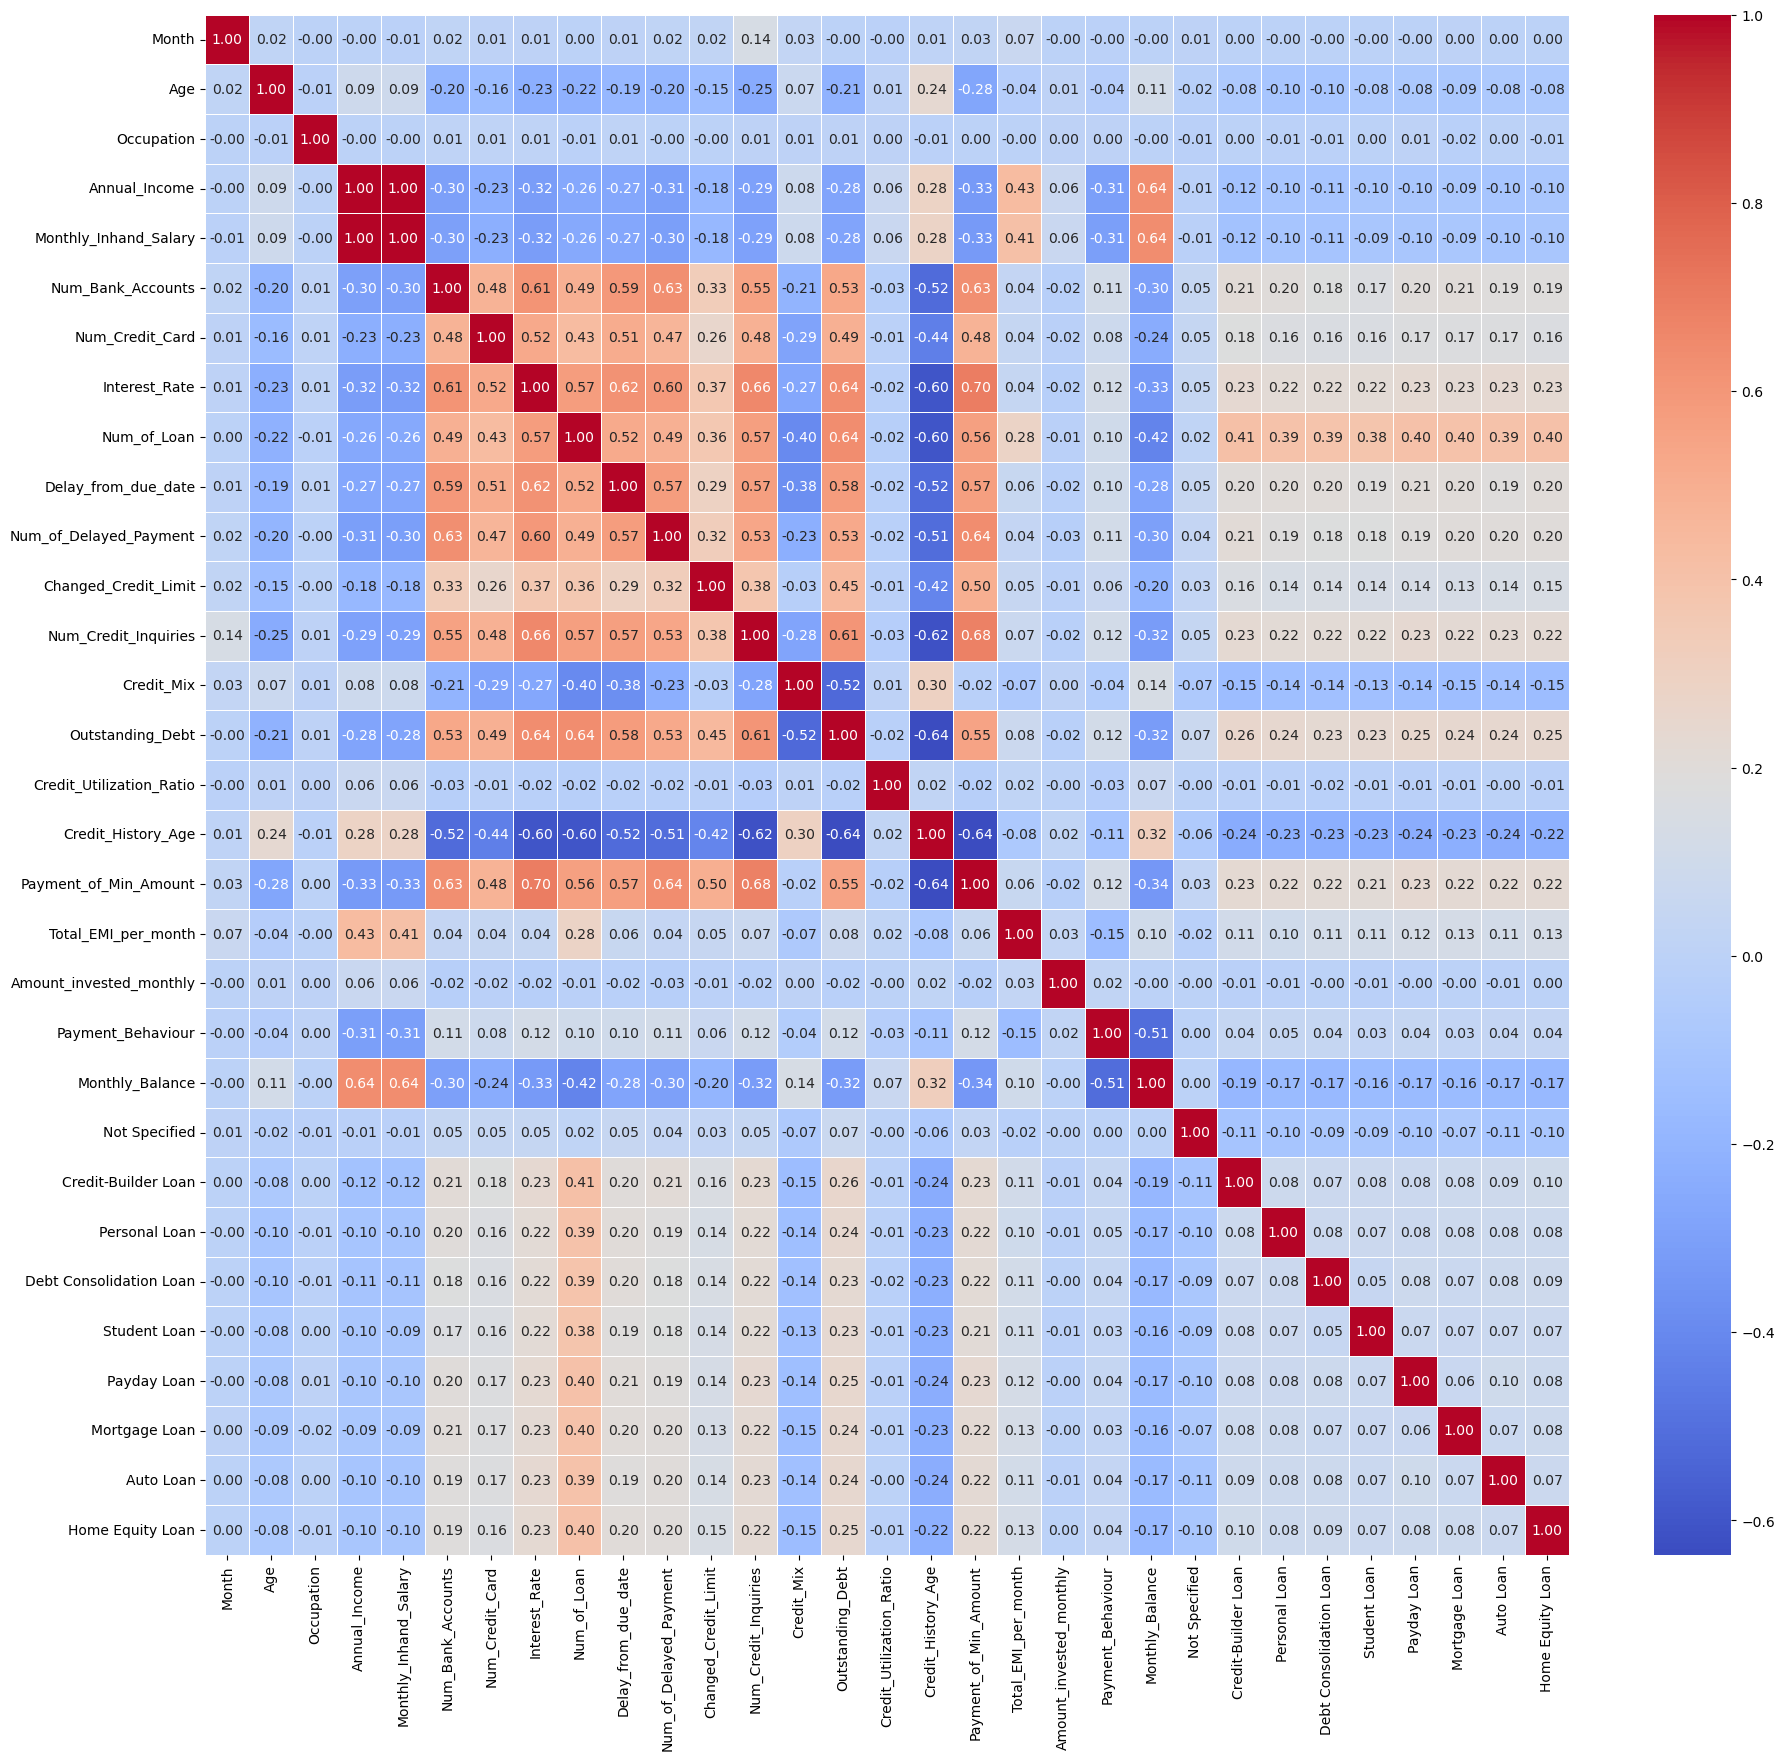

In [6613]:
X = df_tkt.drop(columns=['Credit_Score'])  # Features
y = df_tkt['Credit_Score']  # Target variable
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = X.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(22, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Save the heatmap as an image
plt.savefig('correlation_matrix_heatmap.png')

# Show the plot (optional)
plt.show()

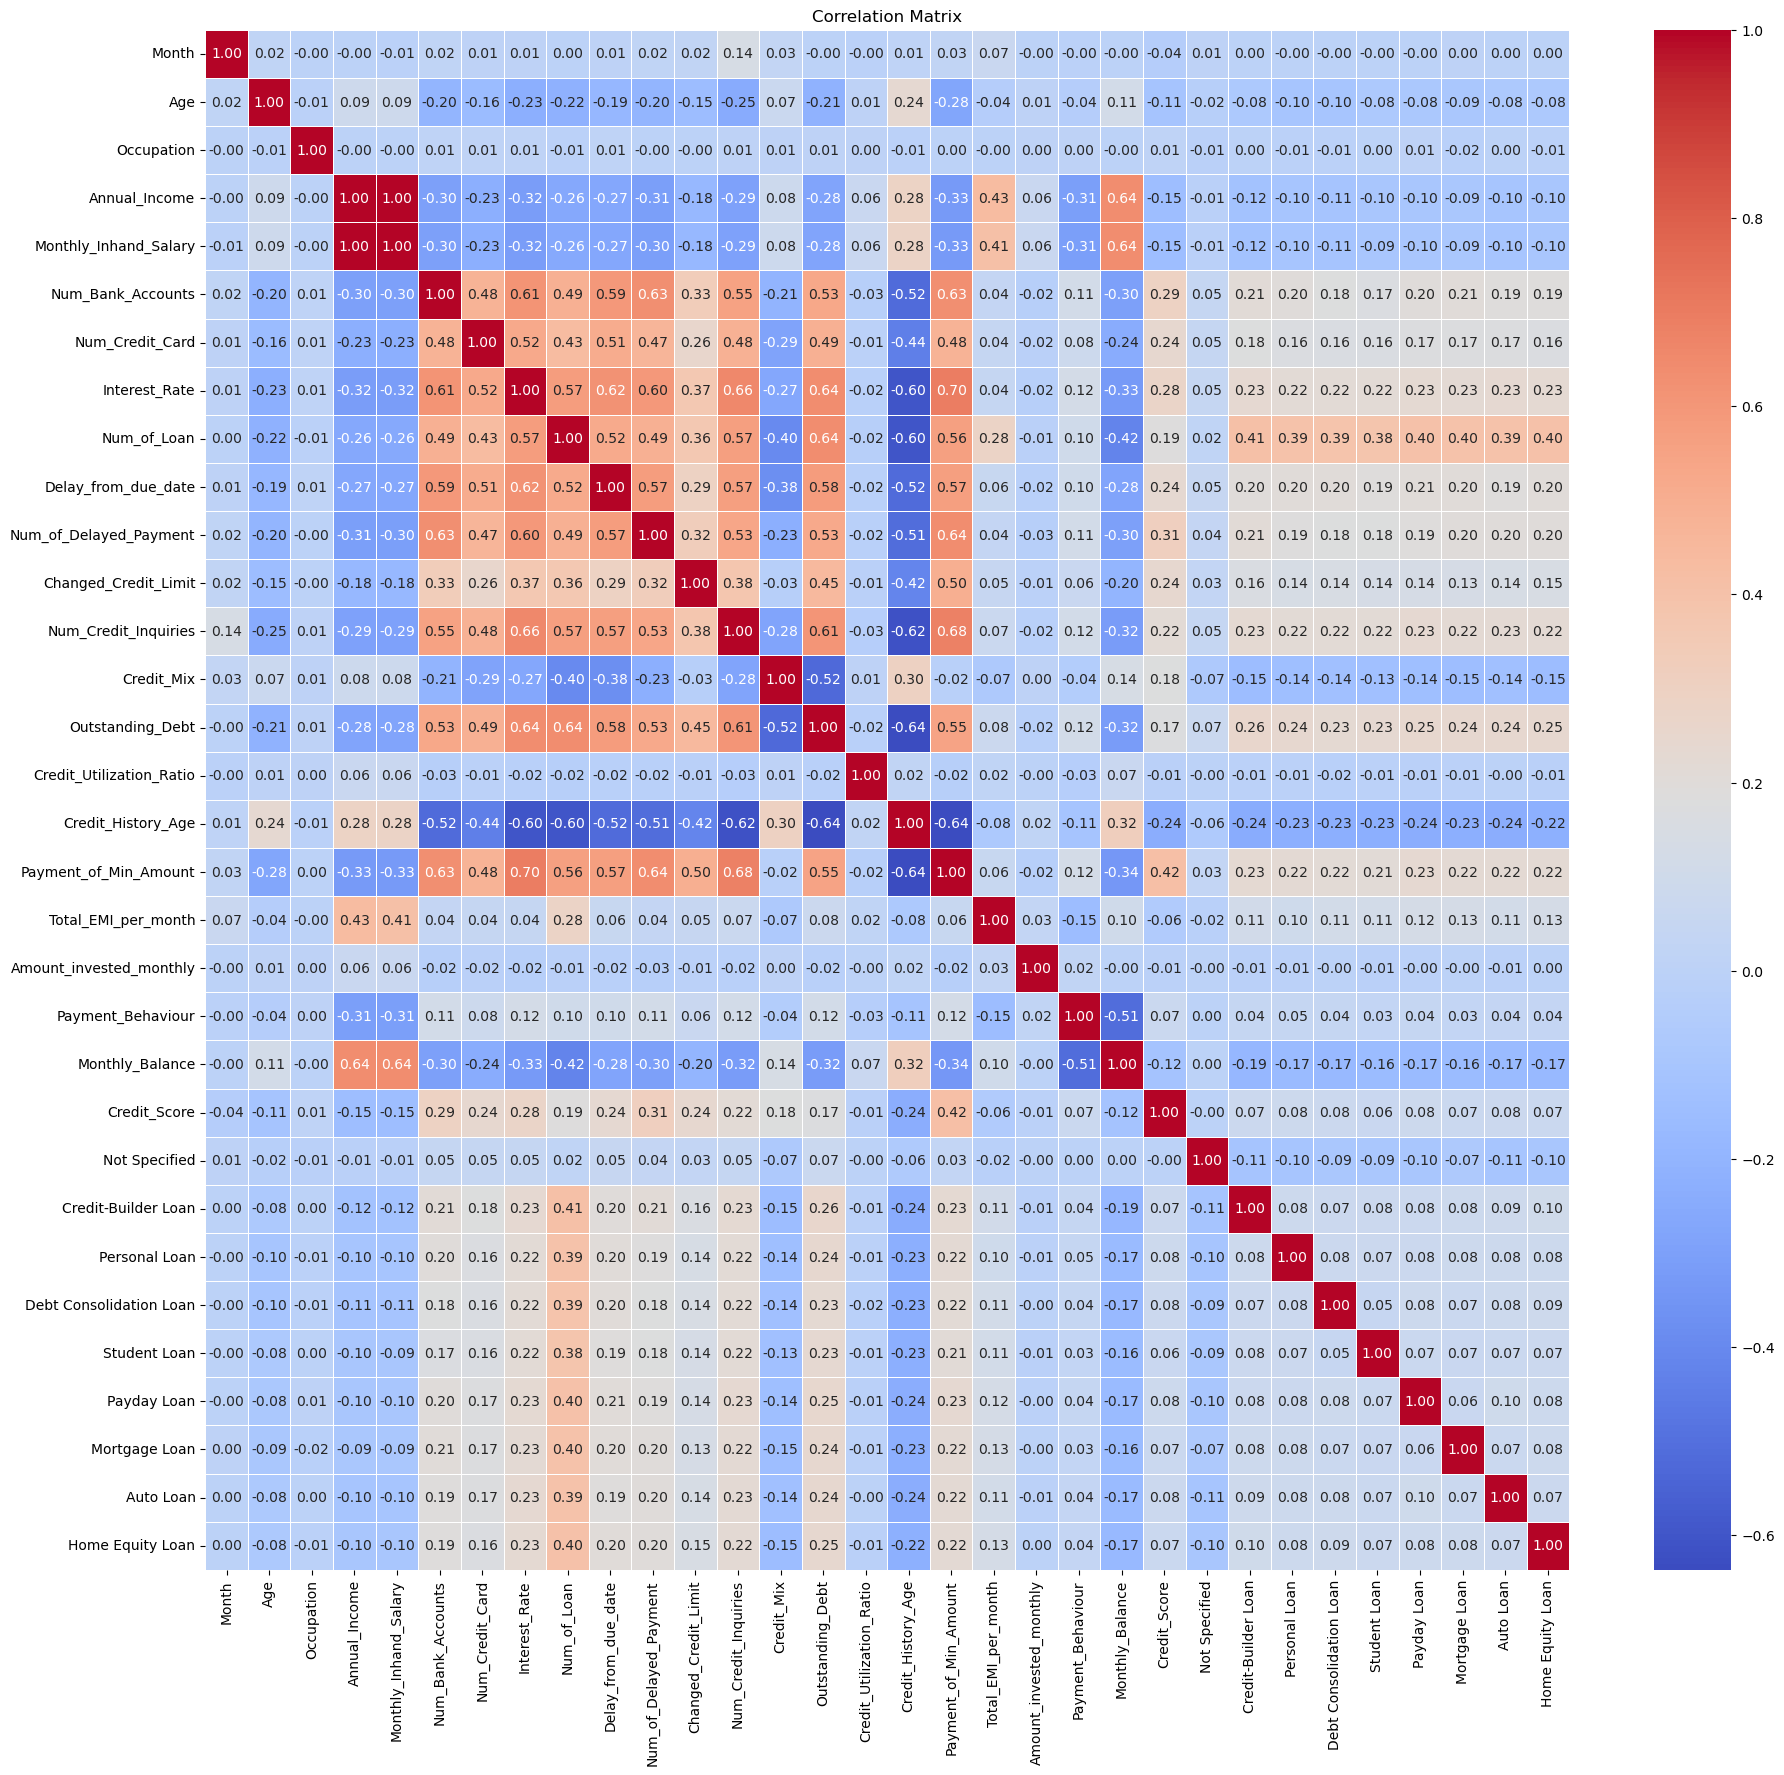

In [6614]:
# Calculate the correlation matrix
correlation_matrix = df_tkt.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(22, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [6615]:
# Use VarianceThreshold to identify low-variance features
selector = VarianceThreshold(threshold=0.20)
low_variance_features = selector.fit_transform(df_tkt)

# Get the names of the low-variance columns
low_variance_columns = df_tkt.columns[~selector.get_support()]

# Display the result
print("Columns with low variance:", low_variance_columns)

Columns with low variance: Index([], dtype='object')


In [6616]:
#all are high varinace features with almost 20-80 split hence no constant features

In [6617]:
# Calculate mutual information between features and target variable
mutual_info_scores = mutual_info_classif(X, y)

# Create a DataFrame to display feature names and their corresponding scores
result_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Info_Score': mutual_info_scores})

# Sort the DataFrame by Mutual_Info_Score in ascending order
result_df = result_df.sort_values(by='Mutual_Info_Score')

# Display the sorted mutual information scores
print(result_df)

                     Feature  Mutual_Info_Score
0                      Month           0.000000
22             Not Specified           0.000000
2                 Occupation           0.000445
26              Student Loan           0.009412
20         Payment_Behaviour           0.011061
25   Debt Consolidation Loan           0.011137
24             Personal Loan           0.013408
28             Mortgage Loan           0.013781
27               Payday Loan           0.016240
23       Credit-Builder Loan           0.016787
30          Home Equity Loan           0.017587
29                 Auto Loan           0.018917
19   Amount_invested_monthly           0.026810
1                        Age           0.038904
21           Monthly_Balance           0.046773
15  Credit_Utilization_Ratio           0.053563
11      Changed_Credit_Limit           0.123566
10    Num_of_Delayed_Payment           0.129295
8                Num_of_Loan           0.129517
5          Num_Bank_Accounts           0

In [6618]:
# on the basis of this info we can identify a few columns that are least related to the target varibales we will use a threshold value of 0.05

In [6619]:
# Feature names to be removed
columns_to_remove = [
    'Occupation', 'Not Specified', 'Month', 'Payment_Behaviour', 
    'Home Equity Loan', 'Mortgage Loan', 'Payday Loan', 'Student Loan', 
    'Personal Loan', 'Debt Consolidation Loan', 'Auto Loan', 
    'Credit-Builder Loan', 'Amount_invested_monthly', 'Age', 
    'Credit_Utilization_Ratio','Monthly_Balance'
]
#Num_of_Delayed_Payment', 'Num_of_Loan', 'Changed_Credit_Limit', 'Num_Credit_Card', 'Num_Bank_Accounts', 'Credit_History_Age' threshold 0.16
# Remove specified columns from the DataFrame
X = X.drop(columns=columns_to_remove)

In [6620]:
X.T

30721         24075         67223  \
Annual_Income           17983.020000  44441.990000  42337.390000   
Monthly_Inhand_Salary    1522.585000   3993.499167   3545.115833   
Num_Bank_Accounts           5.000000      2.000000      2.000000   
Num_Credit_Card             6.000000      3.000000      4.000000   
Interest_Rate               9.000000      8.000000      4.000000   
Num_of_Loan                 4.000000      1.000000      2.000000   
Delay_from_due_date        14.000000     13.000000     12.000000   
Num_of_Delayed_Payment      4.000000     11.000000     12.000000   
Changed_Credit_Limit        3.920000      9.240000      2.290000   
Num_Credit_Inquiries        3.000000      8.000000      2.000000   
Credit_Mix                  1.000000      1.000000      1.000000   
Outstanding_Debt          393.890000    191.550000    568.610000   
Credit_History_Age        272.000000    295.000000    388.000000   
Payment_of_Min_Amount       0.000000      0.000000      0.000000   
Total_EMI_per_month        36.679456     20.330946     39.434381   

                               44493        87138         43886         64534  \
Annual_Income           32438.590000  112671.2700  29616.720000  32300.850000   
Monthly_Inhand_Salary    2811.215833    9454.2725   2187.060000   2739.737500   
Num_Bank_Accounts           3.000000       2.0000      2.000000      6.000000   
Num_Credit_Card             4.000000       4.0000      1.000000      5.000000   
Interest_Rate               2.000000      12.0000      3.000000     12.000000   
Num_of_Loan                 2.000000       0.0000      2.000000      3.000000   
Delay_from_due_date        15.000000       6.0000     15.000000     24.000000   
Num_of_Delayed_Payment     17.000000       6.0000      3.000000     10.000000   
Changed_Credit_Limit       10.620000       7.5800      5.830000     15.300000   
Num_Credit_Inquiries        4.000000       8.0000      7.000000      0.000000   
Credit_Mix                  1.000000       1.0000      1.000000      2.000000   
Outstanding_Debt           64.650000    1221.9100    189.920000    298.850000   
Credit_History_Age        199.000000     328.0000    244.000000    359.000000   
Payment_of_Min_Amount       0.000000       0.0000      0.000000      1.000000   
Total_EMI_per_month        38.481829       0.0000     27.904323     71.333636   

                               40289         60285         30716  ...  \
Annual_Income           76476.660000  16955.675000  15279.545000  ...   
Monthly_Inhand_Salary    6536.055000   1295.972917   1517.791627  ...   
Num_Bank_Accounts           1.000000      0.000000      0.000000  ...   
Num_Credit_Card             2.000000      1.000000      5.000000  ...   
Interest_Rate              10.000000      7.000000      8.000000  ...   
Num_of_Loan                 2.000000      2.000000      3.000000  ...   
Delay_from_due_date         2.000000     12.000000      1.000000  ...   
Num_of_Delayed_Payment      4.000000      4.000000      4.000000  ...   
Changed_Credit_Limit        0.780000      3.090000      6.990000  ...   
Num_Credit_Inquiries        3.000000      4.000000      4.000000  ...   
Credit_Mix                  1.000000      1.000000      1.000000  ...   
Outstanding_Debt         1020.690000   1035.870000    168.350000  ...   
Credit_History_Age        246.000000    387.000000    367.000000  ...   
Payment_of_Min_Amount       0.000000      0.000000      0.000000  ...   
Total_EMI_per_month       108.961368     20.035087     76.539303  ...   

                               10677         19194         20051  \
Annual_Income           28910.450000  91869.450000  19431.830000   
Monthly_Inhand_Salary    2414.204167   7426.787500   1797.319167   
Num_Bank_Accounts           7.000000      5.000000      3.000000   
Num_Credit_Card             4.000000      4.000000      6.000000   
Interest_Rate              13.000000      8.000000      8.000000   
Num_of_Loan                 4.000000      3.000000      4.000000   


In [6621]:
# we will remove the Annunal income feature
del X['Annual_Income']

In [6622]:
X

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
30721            1522.585000                5.0              6.0   
24075            3993.499167                2.0              3.0   
67223            3545.115833                2.0              4.0   
44493            2811.215833                3.0              4.0   
87138            9454.272500                2.0              4.0   
...                      ...                ...              ...   
96301             992.736250                4.0              6.0   
6998              671.190000                6.0              6.0   
83896            7837.480000                3.0              6.0   
92220            4735.728333                7.0              4.0   
62516            2838.603333                8.0              8.0   

       Interest_Rate  Num_of_Loan  Delay_from_due_date  \
30721            9.0          4.0                 14.0   
24075            8.0          1.0                 13.0   
67223            4.0          2.0                 12.0   
44493            2.0          2.0                 15.0   
87138           12.0          0.0                  6.0   
...              ...          ...                  ...   
96301           14.0          6.0                 30.0   
6998            14.0          4.0                 22.0   
83896           15.0          1.0                 14.0   
92220           12.0          1.0                 14.0   
62516           15.0          3.0                  5.0   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
30721                     4.0                  3.92                   3.0   
24075                    11.0                  9.24                   8.0   
67223                    12.0                  2.29                   2.0   
44493                    17.0                 10.62                   4.0   
87138                     6.0                  7.58                   8.0   
...                       ...                   ...                   ...   
96301                    19.0                 16.44                   7.0   
6998                     10.0                 14.96                  11.0   
83896                    20.0                  4.55                   3.0   
92220                    16.0                 11.42                   4.0   
62516                     9.0                 12.65                   9.0   

       Credit_Mix  Outstanding_Debt  Credit_History_Age  \
30721           1            393.89               272.0   
24075           1            191.55               295.0   
67223           1            568.61               388.0   
44493           1             64.65               199.0   
87138           1           1221.91               328.0   
...           ...               ...                 ...   
96301           2            177.98               177.0   
6998            2            322.61                95.0   
83896           2           1275.86               355.0   
92220           2           1450.89               393.0   
62516           2           2152.42               234.0   

       Payment_of_Min_Amount  Total_EMI_per_month  
30721                      0            36.679456  
24075                      0            20.330946  
67223                      0            39.434381  
44493                      0            38.481829  
87138                      0             0.000000  
...                      ...                  ...  
96301                      1            35.562731  
6998                       1            22.400699  
83896                      1            39.385644  
92220                      0            30.184092  
62516                      1            81.038302  

[45000 rows x 14 columns]

In [6623]:
X.T

30721        24075        67223        44493  \
Monthly_Inhand_Salary   1522.585000  3993.499167  3545.115833  2811.215833   
Num_Bank_Accounts          5.000000     2.000000     2.000000     3.000000   
Num_Credit_Card            6.000000     3.000000     4.000000     4.000000   
Interest_Rate              9.000000     8.000000     4.000000     2.000000   
Num_of_Loan                4.000000     1.000000     2.000000     2.000000   
Delay_from_due_date       14.000000    13.000000    12.000000    15.000000   
Num_of_Delayed_Payment     4.000000    11.000000    12.000000    17.000000   
Changed_Credit_Limit       3.920000     9.240000     2.290000    10.620000   
Num_Credit_Inquiries       3.000000     8.000000     2.000000     4.000000   
Credit_Mix                 1.000000     1.000000     1.000000     1.000000   
Outstanding_Debt         393.890000   191.550000   568.610000    64.650000   
Credit_History_Age       272.000000   295.000000   388.000000   199.000000   
Payment_of_Min_Amount      0.000000     0.000000     0.000000     0.000000   
Total_EMI_per_month       36.679456    20.330946    39.434381    38.481829   

                            87138        43886        64534        40289  \
Monthly_Inhand_Salary   9454.2725  2187.060000  2739.737500  6536.055000   
Num_Bank_Accounts          2.0000     2.000000     6.000000     1.000000   
Num_Credit_Card            4.0000     1.000000     5.000000     2.000000   
Interest_Rate             12.0000     3.000000    12.000000    10.000000   
Num_of_Loan                0.0000     2.000000     3.000000     2.000000   
Delay_from_due_date        6.0000    15.000000    24.000000     2.000000   
Num_of_Delayed_Payment     6.0000     3.000000    10.000000     4.000000   
Changed_Credit_Limit       7.5800     5.830000    15.300000     0.780000   
Num_Credit_Inquiries       8.0000     7.000000     0.000000     3.000000   
Credit_Mix                 1.0000     1.000000     2.000000     1.000000   
Outstanding_Debt        1221.9100   189.920000   298.850000  1020.690000   
Credit_History_Age       328.0000   244.000000   359.000000   246.000000   
Payment_of_Min_Amount      0.0000     0.000000     1.000000     0.000000   
Total_EMI_per_month        0.0000    27.904323    71.333636   108.961368   

                              60285        30716  ...        10677  \
Monthly_Inhand_Salary   1295.972917  1517.791627  ...  2414.204167   
Num_Bank_Accounts          0.000000     0.000000  ...     7.000000   
Num_Credit_Card            1.000000     5.000000  ...     4.000000   
Interest_Rate              7.000000     8.000000  ...    13.000000   
Num_of_Loan                2.000000     3.000000  ...     4.000000   
Delay_from_due_date       12.000000     1.000000  ...    15.000000   
Num_of_Delayed_Payment     4.000000     4.000000  ...     8.000000   
Changed_Credit_Limit       3.090000     6.990000  ...     9.390000   
Num_Credit_Inquiries       4.000000     4.000000  ...     6.000000   
Credit_Mix                 1.000000     1.000000  ...     2.000000   
Outstanding_Debt        1035.870000   168.350000  ...   292.980000   
Credit_History_Age       387.000000   367.000000  ...   187.000000   
Payment_of_Min_Amount      0.000000     0.000000  ...     1.000000   
Total_EMI_per_month       20.035087    76.539303  ...    95.022782   

                              19194        20051        26312        61271  \
Monthly_Inhand_Salary   7426.787500  1797.319167  3806.260000  3965.395000   
Num_Bank_Accounts          5.000000     3.000000     7.000000     3.000000   
Num_Credit_Card            4.000000     6.000000     7.000000     7.000000   
Interest_Rate              8.000000     8.000000    19.000000    10.000000   
Num_of_Loan                3.000000     4.000000     1.000000     6.000000   
Delay_from_due_date       18.000000    22.000000    18.000000    18.000000   
Num_of_Delayed_Payment     7.000000     9.000000    20.000000     9.000000   
Changed_Credit_Limit      11.270000    11.6

In [6624]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
X[X.columns] = scaler.fit_transform(X[X.columns])

In [6625]:
# Split the data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [6630]:
y_test.shape

(9000,)

In [6631]:
 dtk = DecisionTreeClassifier(
            criterion='gini',
            max_depth=11,
            random_state=42
        )
dtk.fit(X_train,y_train)

y_dtk_pred = dtk.predict(X_test)
tst_accuracy = accuracy_score(y_test, y_dtk_pred)
print(tst_accuracy)

0.7456666666666667


In [6632]:
conf_matrix = confusion_matrix(y_test, y_dtk_pred)

In [6633]:
conf_matrix

array([[2571,   96,  333],
       [ 342, 2398,  260],
       [ 596,  662, 1742]], dtype=int64)

In [6634]:
cost(conf_matrix)

8984000

In [6636]:
# Define the hyperparameter values to search
params = {
    'crt': ['gini', 'entropy'],
    'mdpth': [x for x in range(2, 30)],
}

bscore = 0
bparams = {} 


for crt in params['crt']:
    for mdpth in params['mdpth']:
        
        dti = DecisionTreeClassifier(
            criterion=crt,
            max_depth=mdpth,
            random_state=42
        )

        dti.fit(X_train,y_train)

        y_dti_pred = dti.predict(X_test)

        conf_matrix = confusion_matrix(y_test, y_dti_pred)
        i_cost=cost(conf_matrix)
        
        if i_cost > bscore:
            bscore = i_cost
            bparams = {
                'crt': criterion,
                'mdpth': max_depth,
            }


best_dt = DecisionTreeClassifier(
    criterion=bparams['crt'],
    max_depth=bparams['mdpth'],
    random_state=42
)
best_dt.fit(X_train, y_train)


y_dt_pred = best_dt.predict(X_test)

cost
tst_accuracy = accuracy_score(y_test, y_dt_pred)

# Print the results
print("Best Hyperparameters:", best_params)
print("Mean Cross-Validation Score:", bscore)
print("Test cost with best parameters:", tst_accuracy)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 11}
Mean Cross-Validation Score: 10668000
Test Accuracy with best parameters: 0.7708888888888888


In [6646]:

# Perform k-fold cross-validation with your custom metric
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Adjust the number of splits as needed

custom_metric_scores = cross_val_score(best_dt, X, y, cv=kf, scoring=custom_scorer)

In [6647]:
custom_metric_scores

array([10228000, 10228000, 10228000, 10228000, 10228000])

In [ ]:
# Define the hyperparameter values to search
params = {
    'crt': ['gini', 'entropy'],
    'mdpth': [x for x in range(2, 30)],
}

bscore = 0
bparams = {} 


for crt in params['crt']:
    for mdpth in params['mdpth']:
        
        dt = DecisionTreeClassifier(
            criterion=crt,
            max_depth=mdpth,
            random_state=42
        )
        
        # Perform k-fold cross-validation with your custom metric
        kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Adjust the number of splits as needed

        custom_metric_scores = cross_val_score(dt, X, y, cv=kf, scoring=custom_scorer)
        print(custom_metric_scores)
        """
        
        if i_cost > bscore:
            bscore = i_cost
            bparams = {
                'crt': criterion,
                'mdpth': max_depth,
            }


best_dt = DecisionTreeClassifier(
    criterion=bparams['crt'],
    max_depth=bparams['mdpth'],
    random_state=42
)
best_dt.fit(X_train, y_train)


y_dt_pred = best_dt.predict(X_test)

cost
tst_accuracy = accuracy_score(y_test, y_dt_pred)

# Print the results
print("Best Hyperparameters:", best_params)
print("Mean Cross-Validation Score:", bscore)
print("Test cost with best parameters:", tst_accuracy)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 11}
Mean Cross-Validation cost: 10231600.0
Test cost with best parameters: 0.7708888888888888


In [6359]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36000 entries, 72003 to 40395
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Monthly_Inhand_Salary   36000 non-null  float64
 1   Num_Bank_Accounts       36000 non-null  float64
 2   Num_Credit_Card         36000 non-null  float64
 3   Interest_Rate           36000 non-null  float64
 4   Num_of_Loan             36000 non-null  float64
 5   Delay_from_due_date     36000 non-null  float64
 6   Num_of_Delayed_Payment  36000 non-null  float64
 7   Changed_Credit_Limit    36000 non-null  float64
 8   Num_Credit_Inquiries    36000 non-null  float64
 9   Credit_Mix              36000 non-null  float64
 10  Outstanding_Debt        36000 non-null  float64
 11  Credit_History_Age      36000 non-null  float64
 12  Payment_of_Min_Amount   36000 non-null  float64
 13  Total_EMI_per_month     36000 non-null  float64
dtypes: float64(14)
memory usage: 4.1 M

In [6360]:
# Display the class distribution in the training and testing sets
print("Train distribution:\n", y_train.value_counts(),"Test distribution:\n",y_test.value_counts())

Train distribution:
 2    12000
0    12000
1    12000
Name: Credit_Score, dtype: int64 Test distribution:
 1    3000
2    3000
0    3000
Name: Credit_Score, dtype: int64


Column: Credit_Score<br>
Original Class Labels and Encoded Values:<br>
Original Class Label: Good | Encoded Value: 0<br>
Original Class Label: Poor | Encoded Value: 1<br>
Original Class Label: Standard | Encoded Value: 2<br>`

In [6650]:
def cost2(y_true, y_pred):
        mtrx = confusion_matrix(y_true, y_pred)
        return mtrx[0][0]*5000 - (mtrx[2][0]+mtrx[1][0])*5000 + mtrx[2][2]*2000 - mtrx[1][2]*2000 - mtrx[0][2]*3000+ mtrx[1][1]*0-mtrx[0][1]*5000-mtrx[0][2]*2000
# Make your custom scoring function usable with cross_val_score
custom_scorer = make_scorer(cost2)

In [6411]:
def cost(mtrx):
        return mtrx[0][0]*5000 - (mtrx[2][0]+mtrx[1][0])*5000 + mtrx[2][2]*2000 - mtrx[1][2]*2000 - mtrx[0][2]*3000+ mtrx[1][1]*0-mtrx[0][1]*5000-mtrx[0][2]*2000

## Decision Tree Classifier

In [6655]:
# Define the hyperparameter values to search
params = {
    'crt': ['gini', 'entropy'],
    'mdpth': [x for x in range(2, 30)],
}

bscore = 0
bparams = {} 


for crt in params['crt']:
    for mdpth in params['mdpth']:
        
        dti = DecisionTreeClassifier(
            criterion=crt,
            max_depth=mdpth,
            random_state=42
        )

        # Perform k-fold cross-validation with your custom metric
        kf = KFold(n_splits=5, shuffle=True, random_state=42)  
        # Adjust the number of splits as needed
        custom_metric_scores = cross_val_score(dti, X, y, cv=kf, scoring=custom_scorer)
        score_mean=custom_metric_scores.mean()
        
        
        if score_mean> bscore:
            bscore = score_mean
            bparams = {
                'crt': criterion,
                'mdpth': max_depth,
            }

best_dt = DecisionTreeClassifier(
    criterion=bparams['crt'],
    max_depth=bparams['mdpth'],
    random_state=42
)
best_dt.fit(X, y )
#waiting for deployment
"""
best_dt.fit(X, y )
# Make predictions on the test set
y_pred = best_dt.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

y_best_dt_pred = best_dt.predict(X_test)
"""
# Print the results
print("Best Hyperparameters:", best_params)
print("Best Mean Cross-Validation cost:", bscore)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 11}
Mean Cross-Validation cost: 10231600.0
Test cost with best parameters: 0.7708888888888888


#### error metrics

Classification Report:
               precision    recall  f1-score   support

        Good       0.82      0.83      0.83      3000
        Poor       0.80      0.83      0.81      3000
    Standard       0.69      0.66      0.67      3000

    accuracy                           0.77      9000
   macro avg       0.77      0.77      0.77      9000
weighted avg       0.77      0.77      0.77      9000

Accuracy: 0.77
Recall: 0.77
Precision: 0.77


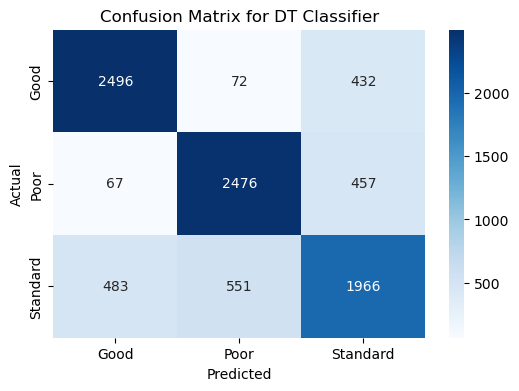

"\n# Decision Tree Classifier\ny_pred_proba_dt = best_dt.predict_proba(X_test)[:, 1]\nfpr_dt, tpr_dt, thresholds_dt = metrics.roc_curve(y_test, y_dt_pred)\ndt_roc_auc = metrics.auc(fpr_dt, tpr_dt)\n\n# Plotting ROC curves\nplt.figure(figsize=(10, 6))\n\n# Decision Tree ROC Curve\nplt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {dt_roc_auc:.2f})', color='green')\n\n# Random Guess Line (AUC = 0.5)\nplt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess (AUC = 0.5)')\n\n# Customize the plot\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive Rate')\nplt.title('Receiver Operating Characteristic (ROC) Curves')\nplt.legend()\nplt.show()\n"

In [6401]:
cnm_dt[0][2]

432

In [6412]:
cost(cnm_dt)

10228000

In [6370]:
X_test.shape

(9000, 14)

In [6371]:
y_dt_pred

array([2, 2, 0, ..., 2, 0, 1])

## KNN classifier

In [6672]:
# Define the hyperparameter values to search
params = {
    'n_K': range(2, 31),
    'mtrc': ['euclidean', 'manhattan', 'minkowski']
}

bscore_KNN=0
bparams_KNN = {} 
for n in params['n_K']:
    for mtrc in params['mtrc']:
        # Create KNN Classifier with current hyperparameter values
        knn = KNeighborsClassifier(n_neighbors=n, metric=mtrc)               

        # Perform k-fold cross-validation with your custom metric
        kf = KFold(n_splits=5, shuffle=True, random_state=42)  
        # Adjust the number of splits as needed
        custom_metric_scores = cross_val_score(knn, X, y, cv=kf, scoring=custom_scorer)
        score_mean=custom_metric_scores.mean()
        print(custom_metric_scores,score_mean)
        if score_mean> bscore_KNN:
            bscore_KNN = score_mean
            bparams_KNN = {
                'n_K' : n,
                'mtrc': mtrk,
            }
"""
best_KNN = KNeighborsClassifier(
    n_neighbors=bparams_KNN['n_k'],
    metric=bparams_KNN['mtrk']
)
best_KNN.fit(X, y)
#waiting for deployment
"""
"""
best_dt.fit(X, y )
# Make predictions on the test set
y_pred = best_dt.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

y_best_dt_pred = best_dt.predict(X_test)
"""
# Print the results
print("Best Hyperparameters:", bparams_KNN)
print("Best Mean Cross-Validation cost:", bscore_KNN)

[11947000 12106000 11421000 11367000 11986000] 11765400.0
[12651000 12805000 12145000 12029000 12673000] 12460600.0
[11947000 12106000 11421000 11367000 11986000] 11765400.0
[10943000 11049000 10647000 10710000 11192000] 10908200.0
[11587000 11680000 11352000 11400000 11795000] 11562800.0
[10943000 11049000 10647000 10710000 11192000] 10908200.0
[10694000 11058000 10313000 10493000 11026000] 10716800.0
[11258000 11467000 10913000 10843000 11447000] 11185600.0
[10694000 11058000 10313000 10493000 11026000] 10716800.0
[10058000 10480000  9947000  9823000 10558000] 10173200.0
[10342000 11018000 10393000 10077000 10955000] 10557000.0
[10058000 10480000  9947000  9823000 10558000] 10173200.0
[ 9596000 10365000  9443000  9531000 10162000] 9819400.0
[10048000 10690000  9954000  9529000 10722000] 10188600.0
[ 9596000 10365000  9443000  9531000 10162000] 9819400.0
[9185000 9708000 9202000 9080000 9729000] 9380800.0
[9559000 9966000 9563000 8967000 9807000] 9572400.0
[9185000 9708000 9202000 908

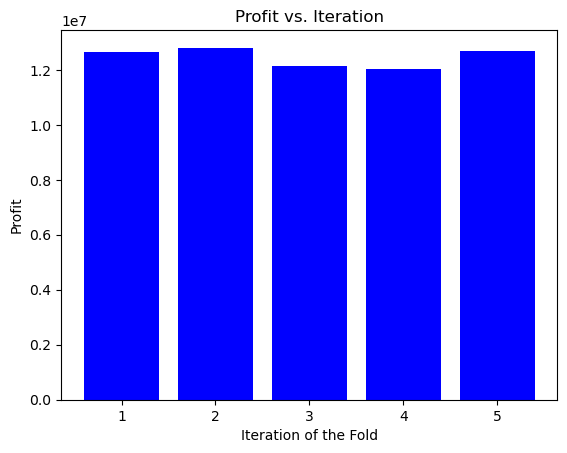

In [6682]:
profits = [12651000, 12805000, 12145000, 12029000, 12673000]

# Iterations (assumed to be 1, 2, 3, 4, 5)
iterations = range(1, len(profits) + 1)

# Bar plot
plt.bar(iterations, profits, color='blue')
plt.xlabel('Iteration of the Fold')
plt.ylabel('Profit')
plt.title('Profit vs. Iteration')
plt.show()

In [ ]:
#old code do not excute
"""
# Iterate over hyperparameter values
for n_K in params['n_K']:
    for mtrc in params['mtrc']:
        # Create KNN Classifier with current hyperparameter values
        knn = KNeighborsClassifier(n_neighbors=n_K, metric=mtrc)

        # Perform cross-validation and calculate mean accuracy
        cv_a = cross_val_score(knn_classifier, np.array(X_train), y_train, cv=5, scoring='accuracy')
        mean_acc = np.mean(cv_a)

        # Store the mean accuracy along with hyperparameter values
        mn_cv_accuracies.append({
            'n_neighbors': n_K,
            'metric': mtrc,
            'mean_accuracy': mean_acc
        })

# Find the best hyperparameters based on mean accuracy
bst_hparameters = max(mn_cv_accuracies, key=lambda x: x['mean_accuracy'])

print("Best Hyperparameters:")
print(bst_hparameters)
best_KNN = KNeighborsClassifier(n_neighbors=bst_hparameters['n_neighbors'], metric=bst_hparameters['metric'])
best_KNN.fit(X_train, y_train)


y_KNN_pred = best_KNN.predict(np.array(X_test))


tst_accuracy = accuracy_score(y_test, y_KNN_pred)

print("Mean Cross-Validation Score:", bst_hparameters['mean_accuracy'])
print("Test Accuracy with best parameters:", tst_accuracy)
"""

#### error metrics

Classification Report:
               precision    recall  f1-score   support

        Good       0.77      0.95      0.85      3000
        Poor       0.77      0.91      0.84      3000
    Standard       0.84      0.50      0.63      3000

    accuracy                           0.79      9000
   macro avg       0.80      0.79      0.77      9000
weighted avg       0.80      0.79      0.77      9000

Accuracy: 0.79
Recall: 0.79
Precision: 0.77


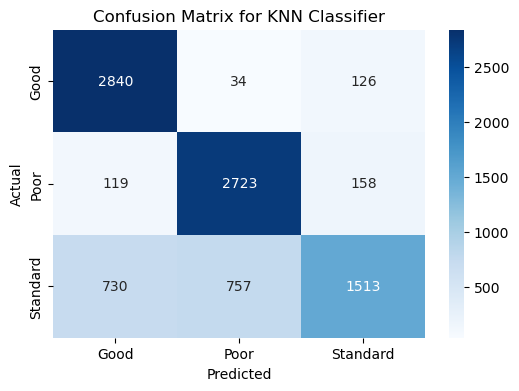

"\n# Decision Tree Classifier\ny_pred_proba_dt = best_dt.predict_proba(X_test)[:, 1]\nfpr_dt, tpr_dt, thresholds_dt = metrics.roc_curve(y_test, y_dt_pred)\ndt_roc_auc = metrics.auc(fpr_dt, tpr_dt)\n\n# Plotting ROC curves\nplt.figure(figsize=(10, 6))\n\n# Decision Tree ROC Curve\nplt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {dt_roc_auc:.2f})', color='green')\n\n# Random Guess Line (AUC = 0.5)\nplt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess (AUC = 0.5)')\n\n# Customize the plot\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive Rate')\nplt.title('Receiver Operating Characteristic (ROC) Curves')\nplt.legend()\nplt.show()\n"

In [6372]:
#prepare the report 
rpt_KNN = classification_report(y_test, y_KNN_pred, target_names=['Good','Poor', 'Standard'])

# Calculate and print accuracy, recall, and precision
acc_KNN = accuracy_score(y_test, y_KNN_pred)
rcl_KNN = recall_score(y_test, y_KNN_pred, average='weighted')
pcn_KNN = precision_score(y_test, y_dt_pred, average='weighted')
print("Classification Report:\n", rpt_KNN)
print(f"Accuracy: {acc_KNN:.2f}")
print(f"Recall: {rcl_KNN:.2f}")
print(f"Precision: {pcn_KNN:.2f}")

# Calculate the confusion matrix
cnm_KNN = confusion_matrix(y_test, y_KNN_pred)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cnm_KNN, annot=True, fmt="d", cmap="Blues", xticklabels=['Good','Poor', 'Standard'], yticklabels=['Good','Poor', 'Standard'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for KNN Classifier")
plt.show()
"""
# Decision Tree Classifier
y_pred_proba_dt = best_dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = metrics.roc_curve(y_test, y_dt_pred)
dt_roc_auc = metrics.auc(fpr_dt, tpr_dt)

# Plotting ROC curves
plt.figure(figsize=(10, 6))

# Decision Tree ROC Curve
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {dt_roc_auc:.2f})', color='green')

# Random Guess Line (AUC = 0.5)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess (AUC = 0.5)')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()
"""
#ROC Curves are not possible for this as it is multiclass classification problem

## Logistic Regression Model

In [6677]:
# Define the hyperparameter values to search
params = {
    'max_iter_vals': list(range(1, 1001,100))
}
bscore_LR=0
bparams_LR = {
    
} 
for n in params['max_iter_vals']:
    logr_model = LogisticRegression(penalty='l2',solver='lbfgs', multi_class='multinomial',max_iter=n ,random_state=42)
    # Perform k-fold cross-validation with your custom metric
    kf = KFold(n_splits=5, shuffle=True, random_state=42)  
    # Adjust the number of splits as needed
    custom_metric_scores = cross_val_score(knn, X, y, cv=kf, scoring=custom_scorer)
    score_mean=custom_metric_scores.mean()
    print(custom_metric_scores)
    print(n)
    if score_mean> bscore_LR:
        bscore_LR = score_mean
        bparams_LR = {
        'max_iter_vals' : n
            }

best_LR = LogisticRegression(penalty='l2',solver='lbfgs', multi_class='multinomial',max_iter=bparams_LR['max_iter_vals'] ,random_state=42)
best_LR.fit(X, y)
#waiting for deployment
"""
best_dt.fit(X, y )
# Make predictions on the test set
y_pred = best_dt.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

y_best_dt_pred = best_dt.predict(X_test)
"""
# Print the results
print("Best Hyperparameters:", bparams_LR)
print("Best Mean Cross-Validation cost:", bscore_LR)

[8184000 8404000 8472000 7971000 8407000]
1
[8184000 8404000 8472000 7971000 8407000]
101
[8184000 8404000 8472000 7971000 8407000]
201
[8184000 8404000 8472000 7971000 8407000]
301
[8184000 8404000 8472000 7971000 8407000]
401
[8184000 8404000 8472000 7971000 8407000]
501
[8184000 8404000 8472000 7971000 8407000]
601
[8184000 8404000 8472000 7971000 8407000]
701
[8184000 8404000 8472000 7971000 8407000]
801
[8184000 8404000 8472000 7971000 8407000]
901
Best Hyperparameters: {'max_iter_vals': 1}
Best Mean Cross-Validation cost: 8287600.0


C:\Users\ajays\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6676]:
params['max_iter_vals']

[1, 101, 201, 301, 401, 501, 601, 701, 801, 901]

In [6012]:
"""
#oLD cODE DO NOT DELETE

mean_cv_acc = []
for max_iter in max_iter_vals:

    logr_model = LogisticRegression(penalty='l2',solver='lbfgs', multi_class='multinomial',max_iter=max_iter ,random_state=42)  

    cv_acc = cross_val_score(logr_model, X_train, y_train, cv=5, scoring='accuracy')
    mean_acc = np.mean(cv_acc)

        
    mean_cv_acc.append({
        'penalty': 'l2',
        'solver': 'lbfgs',
        'max_iter': max_iter,
        'mean_accuracy': mean_acc
            })


bst_hparameters = max(mean_cv_acc, key=lambda x: x['mean_accuracy'])

print("Best Hyperparameters:")
print(bst_hparameters)
bst_LR = LogisticRegression(
                penalty='l2',
                solver='lbfgs',
                multi_class='multinomial',
                max_iter=bst_hparameters['max_iter'],
                random_state=42  
            )
bst_LR.fit(X_train, y_train)


y_LR_pred = bst_LR.predict(X_test)


tst_accuracy = accuracy_score(y_test, y_LR_pred)

print("Mean Cross-Validation Score:", bst_hparameters['mean_accuracy'])
print("Test Accuracy with best parameters:", tst_accuracy)

C:\Users\ajays\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ajays\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best Hyperparameters:
{'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 101, 'mean_accuracy': 0.6930277777777778}
Mean Cross-Validation Score: 0.6930277777777778
Test Accuracy with best parameters: 0.6963333333333334


#### Erorr Metrics

Classification Report:
               precision    recall  f1-score   support

        Good       0.70      0.84      0.76      3000
        Poor       0.74      0.66      0.70      3000
    Standard       0.65      0.59      0.62      3000

    accuracy                           0.70      9000
   macro avg       0.70      0.70      0.69      9000
weighted avg       0.70      0.70      0.69      9000

Accuracy: 0.70
Recall: 0.70
Precision: 0.70
[[2527   69  404]
 [ 484 1979  537]
 [ 604  635 1761]]


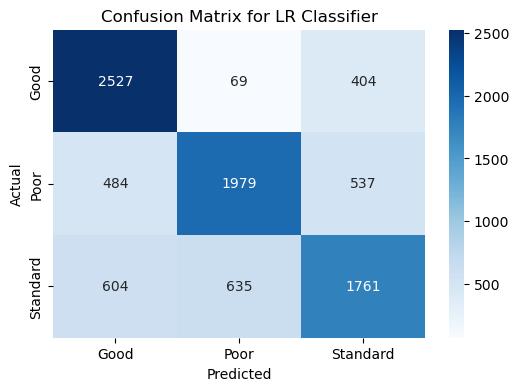

"\n# Decision Tree Classifier\ny_pred_proba_dt = best_dt.predict_proba(X_test)[:, 1]\nfpr_dt, tpr_dt, thresholds_dt = metrics.roc_curve(y_test, y_dt_pred)\ndt_roc_auc = metrics.auc(fpr_dt, tpr_dt)\n\n# Plotting ROC curves\nplt.figure(figsize=(10, 6))\n\n# Decision Tree ROC Curve\nplt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {dt_roc_auc:.2f})', color='green')\n\n# Random Guess Line (AUC = 0.5)\nplt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess (AUC = 0.5)')\n\n# Customize the plot\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive Rate')\nplt.title('Receiver Operating Characteristic (ROC) Curves')\nplt.legend()\nplt.show()\n"

In [6373]:
"""
#prepare the report 
rpt_LR = classification_report(y_test, y_LR_pred, target_names=['Good','Poor', 'Standard'])

# Calculate and print accuracy, recall, and precision
acc_LR = accuracy_score(y_test, y_LR_pred)
rcl_LR = recall_score(y_test, y_LR_pred, average='weighted')
pcn_LR = precision_score(y_test, y_LR_pred, average='weighted')
print("Classification Report:\n", rpt_LR)
print(f"Accuracy: {acc_LR:.2f}")
print(f"Recall: {rcl_LR:.2f}")
print(f"Precision: {pcn_LR:.2f}")

# Calculate the confusion matrix
cnm_LR = confusion_matrix(y_test, y_LR_pred)
print(cnm_LR)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cnm_LR, annot=True, fmt="d", cmap="Blues", xticklabels=['Good','Poor', 'Standard'], yticklabels=['Good','Poor', 'Standard'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for LR Classifier")
plt.show()
"""
"""
# Decision Tree Classifier
y_pred_proba_dt = best_dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = metrics.roc_curve(y_test, y_dt_pred)
dt_roc_auc = metrics.auc(fpr_dt, tpr_dt)

# Plotting ROC curves
plt.figure(figsize=(10, 6))

# Decision Tree ROC Curve
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {dt_roc_auc:.2f})', color='green')

# Random Guess Line (AUC = 0.5)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess (AUC = 0.5)')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()
"""

#ROC Curves are not possible for this as it is multiclass classification problem

In [6414]:
cost(cnm_LR)

7278000

## gAUSSIAN NAIVE BAYES mODEL

In [6678]:
# Define the hyperparameter values to search
params = {
    'var_sm_vals':[1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}
bscore_GNB=0
bparams_GNB = {
} 
for n in params['var_sm_vals']:
    gnb_clfs = GaussianNB(var_smoothing=n)
    # Perform k-fold cross-validation with your custom metric
    kf = KFold(n_splits=5, shuffle=True, random_state=42)  
    # Adjust the number of splits as needed
    custom_metric_scores = cross_val_score(gnb_clfs, X, y, cv=kf, scoring=custom_scorer)
    score_mean=custom_metric_scores.mean()
    print(custom_metric_scores)
    if score_mean> bscore_GNB:
        bscore_GNB = score_mean
        bparams_GNB = {
        'var_sm_vals' : n
            }

best_GNB = GaussianNB(var_smoothing=bparams_GNB['var_sm_vals'])
best_GNB.fit(X, y)
#waiting for deployment
"""
best_dt.fit(X, y )
# Make predictions on the test set
y_pred = best_dt.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

y_best_dt_pred = best_dt.predict(X_test)
"""
# Print the results
print("Best Hyperparameters:", bparams_GNB)
print("Best Mean Cross-Validation cost:", bscore_GNB)

[5810000 6152000 6085000 5666000 6354000]
[5827000 6215000 6104000 5699000 6407000]
[5834000 6222000 6114000 5697000 6407000]
[5834000 6222000 6114000 5697000 6407000]
[5834000 6222000 6114000 5697000 6407000]
[5834000 6222000 6114000 5697000 6407000]
[5834000 6222000 6114000 5697000 6407000]
[5834000 6222000 6114000 5697000 6407000]
[5834000 6222000 6114000 5697000 6407000]
[5834000 6222000 6114000 5697000 6407000]
[5834000 6222000 6114000 5697000 6407000]
[5834000 6222000 6114000 5697000 6407000]
[5834000 6222000 6114000 5697000 6407000]
[5834000 6222000 6114000 5697000 6407000]
Best Hyperparameters: {'var_sm_vals': 0.0001}
Best Mean Cross-Validation cost: 6054800.0


In [ ]:
"""
var_sm_vals = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]


bst_var_sm = None
bst_mean_acc = 0  
bst_test_acc = 0


for var_sm in var_sm_vals:
    
    gnb_clfs = GaussianNB(var_smoothing=var_sm)
    
    # Perform cross-validation and calculate average accuracy
    accs = cross_val_score(gnb_clfs, X_train, y_train, cv=5, scoring='accuracy')
    average_acc = np.mean(accs)
    
    # Check if this model has the best mean accuracy so far
    if average_acc > bst_mean_acc:
        best_mean_acc = average_acc
        best_var_sm = var_sm
        
        # Fit the model on the entire training set to get the test accuracy
        gnb_clfs.fit(X_train, y_train)
        tst_acc = gnb_clfs.score(X_test, y_test)
        bst_test_acc = tst_acc

# Print the best results
print(f"Best var_smoothing: {best_var_sm}")
print(f"Best mean cross-validation accuracy: {best_mean_acc:.4f}")
print(f"Test accuracy with best parameters: {bst_test_acc:.4f}")
"""

#### Error Metrics

Classification Report:
               precision    recall  f1-score   support

        Good       0.79      0.87      0.83      3000
        Poor       0.82      0.82      0.82      3000
    Standard       0.74      0.67      0.70      3000

    accuracy                           0.78      9000
   macro avg       0.78      0.78      0.78      9000
weighted avg       0.78      0.78      0.78      9000

Accuracy: 0.78
Recall: 0.78
Precision: 0.78
[[2618   34  348]
 [ 200 2448  352]
 [ 510  495 1995]]


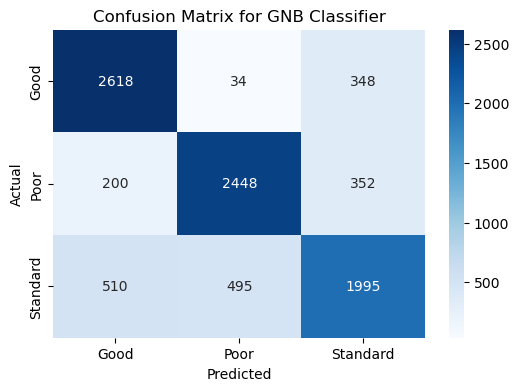

"\n# Decision Tree Classifier\ny_pred_proba_dt = best_dt.predict_proba(X_test)[:, 1]\nfpr_dt, tpr_dt, thresholds_dt = metrics.roc_curve(y_test, y_dt_pred)\ndt_roc_auc = metrics.auc(fpr_dt, tpr_dt)\n\n# Plotting ROC curves\nplt.figure(figsize=(10, 6))\n\n# Decision Tree ROC Curve\nplt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {dt_roc_auc:.2f})', color='green')\n\n# Random Guess Line (AUC = 0.5)\nplt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess (AUC = 0.5)')\n\n# Customize the plot\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive Rate')\nplt.title('Receiver Operating Characteristic (ROC) Curves')\nplt.legend()\nplt.show()\n"

In [6375]:
"""
#prepare the report 
rpt_GNB = classification_report(y_test, y_pred, target_names=['Good','Poor', 'Standard'])

# Calculate and print accuracy, recall, and precision
acc_GNB = accuracy_score(y_test, y_pred)
rcl_GNB = recall_score(y_test, y_pred, average='weighted')
pcn_GNB = precision_score(y_test, y_pred, average='weighted')
print("Classification Report:\n", rpt_GNB)
print(f"Accuracy: {acc_GNB:.2f}")
print(f"Recall: {rcl_GNB:.2f}")
print(f"Precision: {pcn_GNB:.2f}")

# Calculate the confusion matrix
cnm_GNB = confusion_matrix(y_test, y_pred)
print(cnm_GNB)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cnm_GNB, annot=True, fmt="d", cmap="Blues", xticklabels=['Good','Poor', 'Standard'], yticklabels=['Good','Poor', 'Standard'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for GNB Classifier")
plt.show()
"""
"""
# Decision Tree Classifier
y_pred_proba_dt = best_dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = metrics.roc_curve(y_test, y_dt_pred)
dt_roc_auc = metrics.auc(fpr_dt, tpr_dt)

# Plotting ROC curves
plt.figure(figsize=(10, 6))

# Decision Tree ROC Curve
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {dt_roc_auc:.2f})', color='green')

# Random Guess Line (AUC = 0.5)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess (AUC = 0.5)')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()
"""
#ROC Curves are not possible for this as it is multiclass classification problem

In [6415]:
cost(cnm_GNB)

10916000

In [6376]:
# using solver 'svd'

## Linear Discriminnat Analyser

In [6669]:
# Define the hyperparameter values to search
params = {
    'n_comp':[None, 1, 2]
}
# Define the n_components values to be explored
n_comp = [None, 1, 2]
bscore_LDA=0
bparams_LDA = {
} 
for n in params['n_comp']:
    # Create and fit the LDA model with current hyperparameters
    lda = LinearDiscriminantAnalysis(solver='svd', n_components=n)
    # Perform k-fold cross-validation with your custom metric
    kf = KFold(n_splits=5, shuffle=True, random_state=42)  
    # Adjust the number of splits as needed
    custom_metric_scores = cross_val_score(lda, X, y, cv=kf, scoring=custom_scorer)
    score_mean=custom_metric_scores.mean()
    print(custom_metric_scores)
    if score_mean> bscore_LDA:
        bscore_LDA = score_mean
        bparams_LDA = {
        'n_comp' : n
            }
best_lda = LinearDiscriminantAnalysis(solver='svd', n_components=bparams_LDA['n_comp'])
best_lda.fit(X, y)
#waiting for deployment
"""
best_dt.fit(X, y )
# Make predictions on the test set
y_pred = best_dt.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

y_best_dt_pred = best_dt.predict(X_test)
"""
# Print the results
print("Best Hyperparameters:", bparams_LDA)
print("Best Mean Cross-Validation cost:", bscore_LDA)

[6740000 7133000 6982000 6574000 7223000]
[6740000 7133000 6982000 6574000 7223000]
[6740000 7133000 6982000 6574000 7223000]
Best Hyperparameters: {'n_comp': None}
Best Mean Cross-Validation cost: 6930400.0


In [6377]:
""" OLD CODE DO NOT DELETE
# Define the n_components values to be explored
n_comp = [None, 1, 2]

# Initialize variables to store the best hyperparameters and average accuracy
best_n_comp = None
best_avg_acc = 0.0

# Loop over n_components values
for n_comp in n_comp:
    # Create and fit the LDA model with current hyperparameters
    lda = LinearDiscriminantAnalysis(solver='svd', n_components=n_comp)
    
    # Perform cross-validation and calculate average accuracy
    avg_acc = cross_val_score(lda, X_train, y_train, cv=5, scoring='accuracy').mean()
    
    # Update the best hyperparameters if the current model is better
    if avg_acc > best_avg_acc:
        best_n_components = n_components
        best_avg_accuracy = avg_accuracy

# Print the best hyperparameters and average accuracy
print("Best Hyperparameters:")
print("Number of Components:", best_n_components)
print("Best Average Accuracy:", best_avg_accuracy)

lda = LinearDiscriminantAnalysis(solver='svd')

cv_acc = cross_val_score(lda, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy for Each Fold:")
print(cv_acc)

average_acc = cv_acc.mean()
print(f"\nAverage Accuracy: {average_acc * 100:.2f}%")
# Make predictions on the test set
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

# Calculate accuracy on the test set
acc = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {acc * 100:.2f}%")
"""


Best Hyperparameters:
Number of Components: 2
Best Average Accuracy: 0.6906944444444444
Accuracy for Each Fold:
[0.68666667 0.69222222 0.68583333 0.70027778 0.69916667 0.69694444
 0.68527778 0.69694444 0.68861111 0.70083333]

Average Accuracy: 69.33%
Test Set Accuracy: 69.69%


Classification Report:
               precision    recall  f1-score   support

        Good       0.68      0.85      0.75      3000
        Poor       0.75      0.66      0.70      3000
    Standard       0.66      0.58      0.62      3000

    accuracy                           0.70      9000
   macro avg       0.70      0.70      0.69      9000
weighted avg       0.70      0.70      0.69      9000

Accuracy: 0.70
Recall: 0.70
Precision: 0.70
[[2545   55  400]
 [ 538 1980  482]
 [ 660  593 1747]]


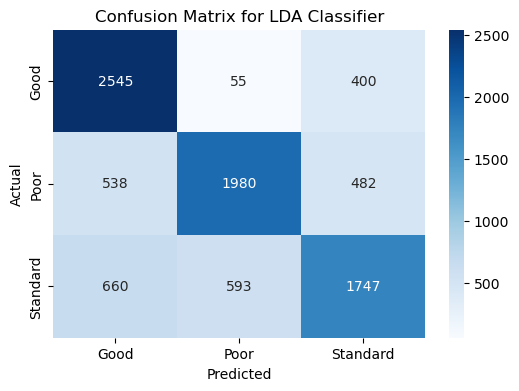

"\n# Decision Tree Classifier\ny_pred_proba_dt = best_dt.predict_proba(X_test)[:, 1]\nfpr_dt, tpr_dt, thresholds_dt = metrics.roc_curve(y_test, y_dt_pred)\ndt_roc_auc = metrics.auc(fpr_dt, tpr_dt)\n\n# Plotting ROC curves\nplt.figure(figsize=(10, 6))\n\n# Decision Tree ROC Curve\nplt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {dt_roc_auc:.2f})', color='green')\n\n# Random Guess Line (AUC = 0.5)\nplt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess (AUC = 0.5)')\n\n# Customize the plot\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive Rate')\nplt.title('Receiver Operating Characteristic (ROC) Curves')\nplt.legend()\nplt.show()\n"

In [6378]:
"""
#prepare the report 
rpt_LDA = classification_report(y_test, y_pred, target_names=['Good','Poor', 'Standard'])

# Calculate and print accuracy, recall, and precision
acc_LDA = accuracy_score(y_test, y_pred)
rcl_LDA = recall_score(y_test, y_pred, average='weighted')
pcn_LDA = precision_score(y_test, y_pred, average='weighted')
print("Classification Report:\n", rpt_LDA)
print(f"Accuracy: {acc_LDA:.2f}")
print(f"Recall: {rcl_LDA:.2f}")
print(f"Precision: {pcn_LDA:.2f}")

# Calculate the confusion matrix
cnm_LDA = confusion_matrix(y_test, y_pred)
print(cnm_LDA)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cnm_LDA, annot=True, fmt="d", cmap="Blues", xticklabels=['Good','Poor', 'Standard'], yticklabels=['Good','Poor', 'Standard'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for LDA Classifier")
plt.show()
"""
"""
# Decision Tree Classifier
y_pred_proba_dt = best_dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = metrics.roc_curve(y_test, y_dt_pred)
dt_roc_auc = metrics.auc(fpr_dt, tpr_dt)

# Plotting ROC curves
plt.figure(figsize=(10, 6))

# Decision Tree ROC Curve
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {dt_roc_auc:.2f})', color='green')

# Random Guess Line (AUC = 0.5)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess (AUC = 0.5)')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()
"""
#ROC Curves are not possible for this as it is multiclass classification problem

In [6416]:
cost(cnm_LDA)

6990000

In [6019]:
# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Fit the classifier on the training data
xgb_classifier.fit(X_train , y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 78.46%


In [6020]:
X_train.shape

(36000, 14)

In [6021]:
# Print the best hyperparameters and accuracy
print("Best Hyperparameters:")
print("Number of Components:", best_n_components)
print("Best Accuracy:", best_accuracy)


Best Hyperparameters:
Number of Components: 2
Best Accuracy: 0.6938888888888889


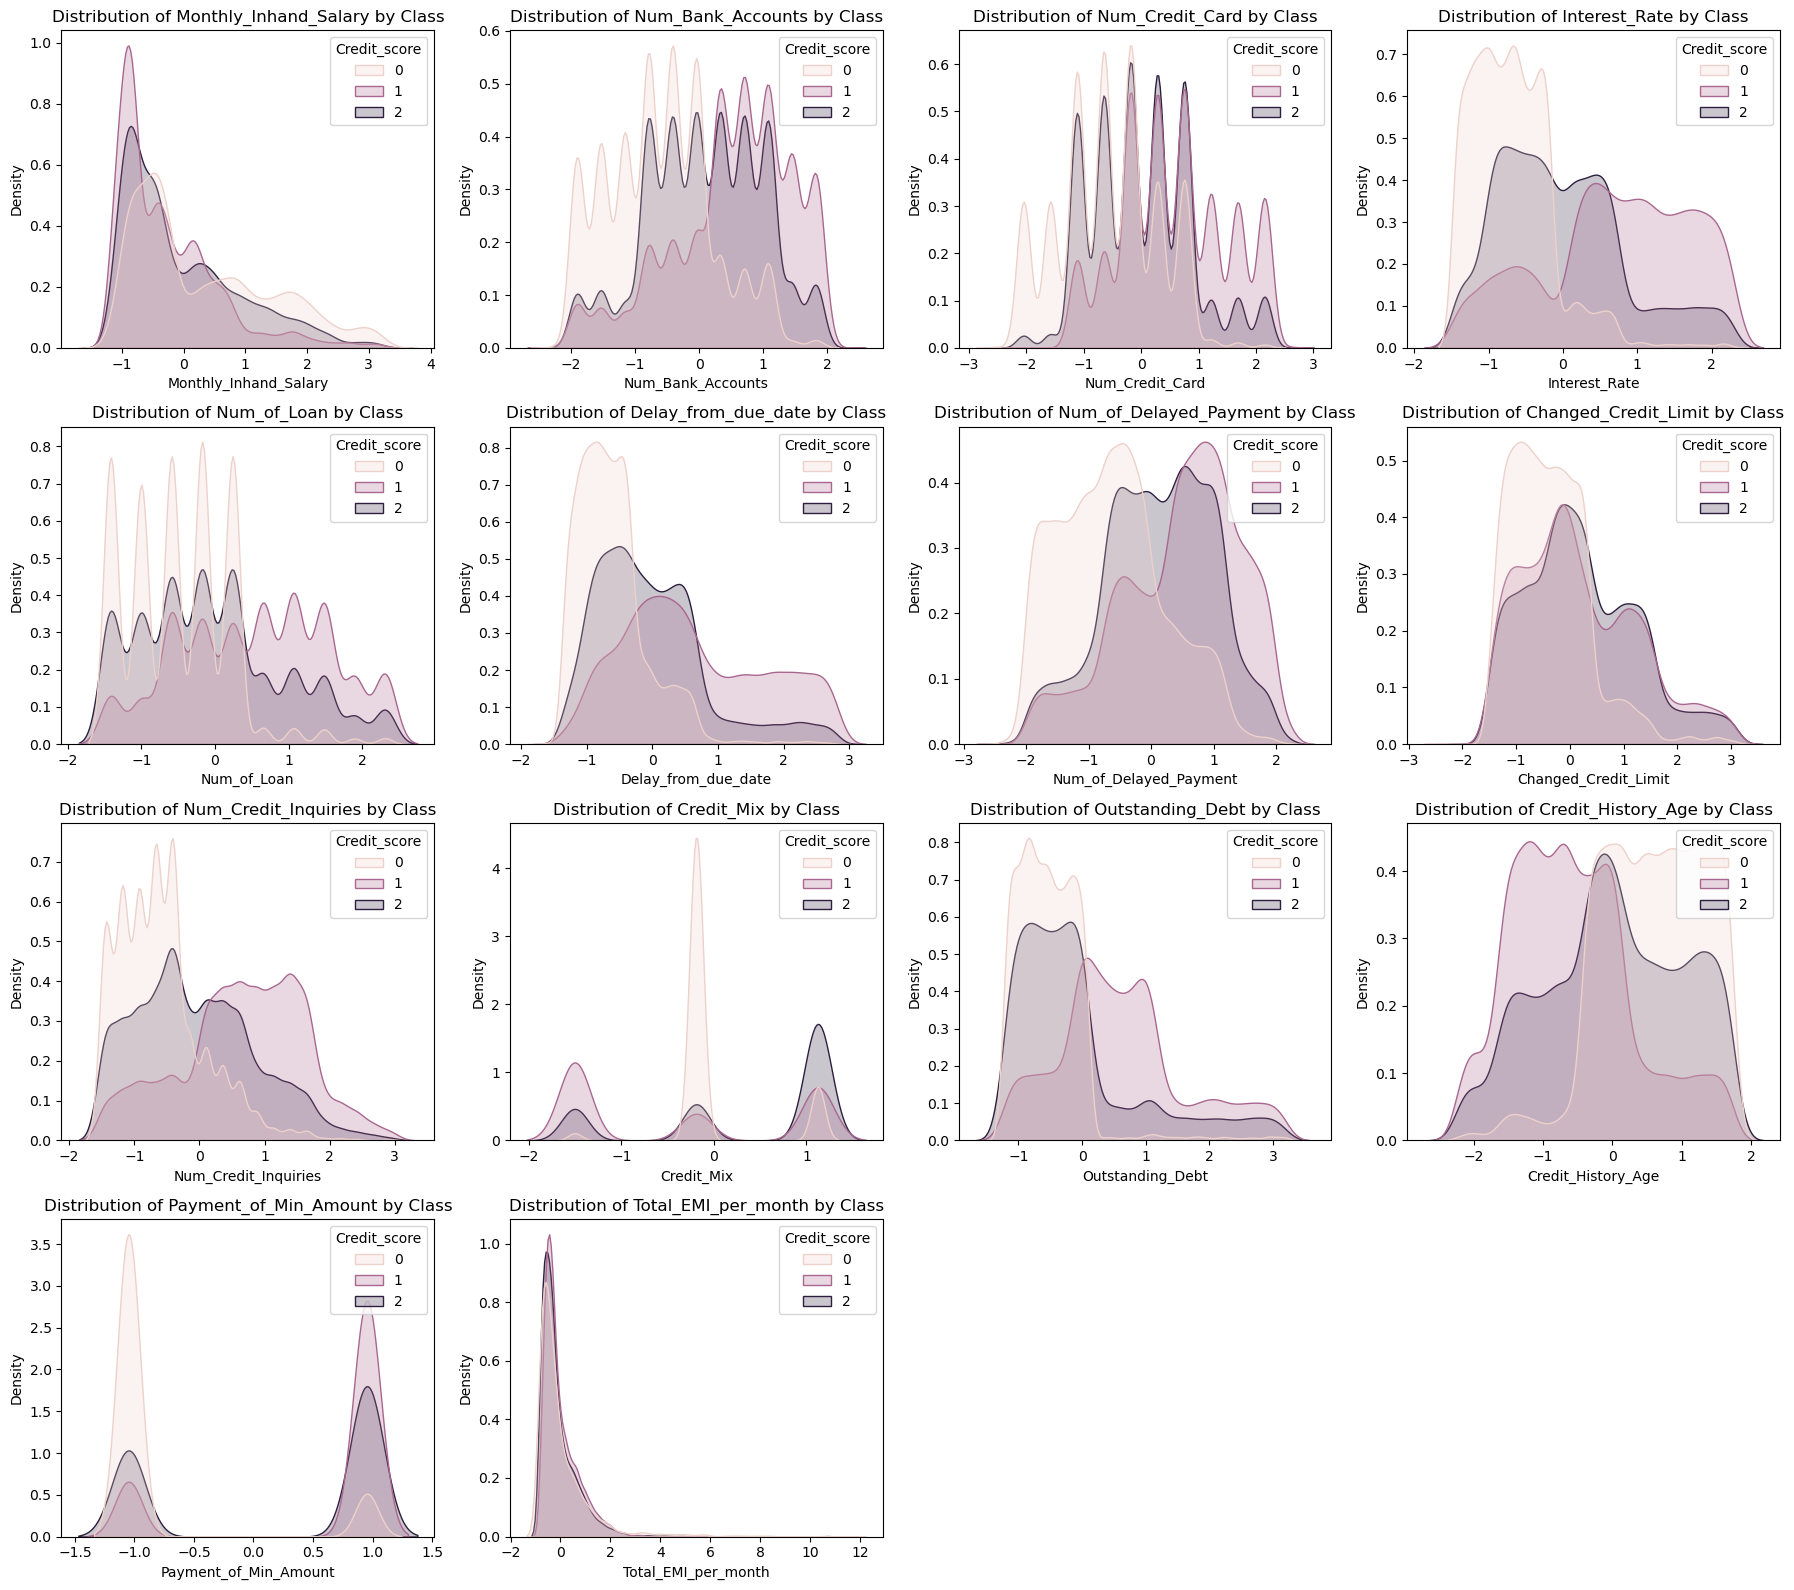

In [6680]:
#normal distribution
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


X1 = X
y1 = y


# Create a DataFrame for easier plotting
df = X1.copy(deep=True)
df['Credit_score'] = y1
# Determine the number of subplots based on the number of features
num_features = len(df.columns) - 1  # Exclude the 'Class' column
num_rows = 4  # You can adjust this based on your preference
num_cols = -(-num_features // num_rows) 

# Plot the distribution of each feature for each class
plt.figure(figsize=(18, 16))
for i, feature in enumerate(X1.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.kdeplot(data=df, x=feature, hue='Credit_score', fill=True, common_norm=False)
    plt.title(f'Distribution of {feature} by Class')

plt.tight_layout()
plt.show()

In [6023]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45000 entries, 30719 to 25622
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Monthly_Inhand_Salary   45000 non-null  float64
 1   Num_Bank_Accounts       45000 non-null  float64
 2   Num_Credit_Card         45000 non-null  float64
 3   Interest_Rate           45000 non-null  float64
 4   Num_of_Loan             45000 non-null  float64
 5   Delay_from_due_date     45000 non-null  float64
 6   Num_of_Delayed_Payment  45000 non-null  float64
 7   Changed_Credit_Limit    45000 non-null  float64
 8   Num_Credit_Inquiries    45000 non-null  float64
 9   Credit_Mix              45000 non-null  float64
 10  Outstanding_Debt        45000 non-null  float64
 11  Credit_History_Age      45000 non-null  float64
 12  Payment_of_Min_Amount   45000 non-null  float64
 13  Total_EMI_per_month     45000 non-null  float64
 14  Credit_score            45000 non-

In [6024]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45000 entries, 30719 to 25622
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Monthly_Inhand_Salary   45000 non-null  float64
 1   Num_Bank_Accounts       45000 non-null  float64
 2   Num_Credit_Card         45000 non-null  float64
 3   Interest_Rate           45000 non-null  float64
 4   Num_of_Loan             45000 non-null  float64
 5   Delay_from_due_date     45000 non-null  float64
 6   Num_of_Delayed_Payment  45000 non-null  float64
 7   Changed_Credit_Limit    45000 non-null  float64
 8   Num_Credit_Inquiries    45000 non-null  float64
 9   Credit_Mix              45000 non-null  float64
 10  Outstanding_Debt        45000 non-null  float64
 11  Credit_History_Age      45000 non-null  float64
 12  Payment_of_Min_Amount   45000 non-null  float64
 13  Total_EMI_per_month     45000 non-null  float64
dtypes: float64(14)
memory usage: 6.2 M

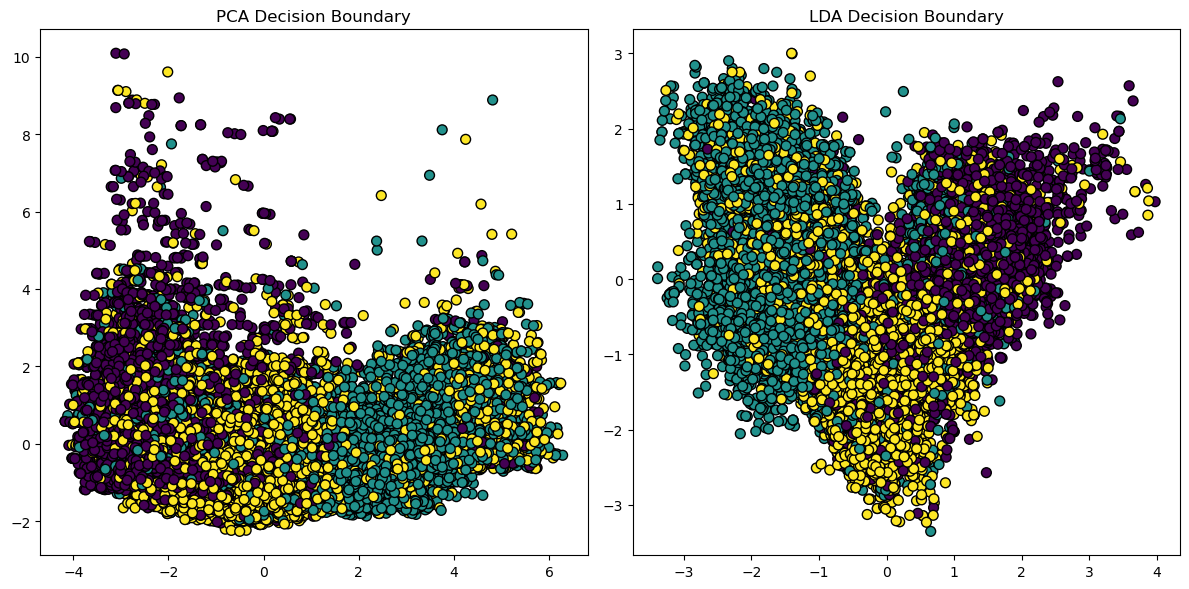

In [6025]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification


# Apply PCA for dimensionality reduction to 2D
pc = PCA(n_components=2)
X_pc = pca.fit_transform(X_train)

# Apply LDA
ld = LinearDiscriminantAnalysis()
X_ld = lda.fit_transform(X_train, y_train)

# Plot PCA-transformed data with decision boundaries
plt.figure(figsize=(12, 6))

# Plot PCA decision boundary
plt.subplot(1, 2, 1)
plt.scatter(X_pc[:, 0], X_pc[:, 1], c=y_train, cmap='viridis', marker='o', edgecolors='k', s=50)
plt.title('PCA Decision Boundary')

# Plot LDA decision boundary
plt.subplot(1, 2, 2)
plt.scatter(X_ld[:, 0], X_ld[:, 1], c=y_train, cmap='viridis', marker='o', edgecolors='k', s=50)
plt.title('LDA Decision Boundary')

plt.tight_layout()
plt.show()

In [6026]:
df.T

30719     24073     67223     44490     56739  \
Monthly_Inhand_Salary  -0.852891 -0.102295 -0.238238 -0.460745 -0.307183   
Num_Bank_Accounts      -1.907637 -1.162641 -1.162641 -0.790143 -1.162641   
Num_Credit_Card        -0.183061 -1.116570 -0.649815 -0.649815  0.283693   
Interest_Rate          -0.652684 -0.652684 -1.099409 -1.322771 -1.322771   
Num_of_Loan            -0.176113 -1.003886 -0.589999 -0.589999  0.237773   
Delay_from_due_date    -1.271257 -0.540263 -0.540263 -0.340901 -0.739625   
Num_of_Delayed_Payment -1.322138 -0.250876 -0.097838  0.820386 -0.403913   
Changed_Credit_Limit   -0.404720 -0.060791 -1.123149  0.150151 -0.056206   
Num_Credit_Inquiries    0.361902  0.618923 -0.923201 -0.409160 -0.409160   
Credit_Mix             -0.187726 -0.187726 -0.187726 -0.187726 -0.187726   
Outstanding_Debt       -1.076683 -1.056194 -0.723196 -1.168265 -1.200314   
Credit_History_Age      1.443883  0.666530  1.625602 -0.312732  0.717008   
Payment_of_Min_Amount  -1.048789 -1.048789 -1.048789 -1.048789 -1.048789   
Total_EMI_per_month    -0.242891 -0.639548 -0.504737 -0.511459  0.023820   
Credit_score            0.000000  0.000000  0.000000  0.000000  0.000000   

                           43884     64534     40271     60285     30712  ...  \
Monthly_Inhand_Salary  -0.649979 -0.482416 -0.867585 -0.920143 -0.838489  ...   
Num_Bank_Accounts      -1.162641  0.327351 -1.535139 -1.907637 -1.907637  ...   
Num_Credit_Card        -2.050078 -0.183061 -0.183061 -2.050078 -0.183061  ...   
Interest_Rate          -1.211090 -0.205960 -0.652684 -0.764365 -0.652684  ...   
Num_of_Loan            -0.589999 -0.176113 -1.417772 -0.589999 -0.176113  ...   
Delay_from_due_date    -0.340901  0.257184 -0.473809 -0.540263 -1.271257  ...   
Num_of_Delayed_Payment -1.781250 -0.403913 -1.016063 -1.322138 -1.475175  ...   
Changed_Credit_Limit   -0.582035  0.865523  0.021751 -1.000863 -0.404720  ...   
Num_Credit_Inquiries    0.361902 -1.437242 -0.152139 -0.409160 -0.409160  ...   
Credit_Mix             -0.187726  1.126063 -0.187726 -0.187726 -0.187726  ...   
Outstanding_Debt       -1.057634 -0.961433 -0.847737 -0.310538 -1.076683  ...   
Credit_History_Age      0.151660  1.332833  0.282902  1.615507  1.383310  ...   
Payment_of_Min_Amount  -1.048789  0.953481 -1.048789 -1.048789 -1.048789  ...   
Total_EMI_per_month    -0.586103 -0.279627 -0.783021 -0.641636 -0.578121  ...   
Credit_score            0.000000  0.000000  0.000000  0.000000  0.000000  ...   

                           17942     92785     83433     76142     43970  \
Monthly_Inhand_Salary  -0.528208 -0.981905 -0.929653  0.239484  0.314613   
Num_Bank_Accounts       0.699849  1.072348  0.327351  0.327351  0.327351   
Num_Credit_Card         0.283693 -1.116570  0.283693 -1.583324  1.217202   
Interest_Rate           0.017402 -0.094279  1.580938  0.464127  0.575808   
Num_of_Loan            -1.417772  0.237773  1.065545  0.237773  1.065545   
Delay_from_due_date    -0.673171  0.190730  1.519809  0.124276  1.652717   
Num_of_Delayed_Payment -0.709988 -0.250876  0.820386 -0.709988  0.667348   
Changed_Credit_Limit    0.862466 -0.892335  2.092967  0.486437 -0.575920   
Num_Credit_Inquiries   -1.180221 -0.409160  0.104881  0.104881  1.389984   
Credit_Mix              1.126063  1.126063 -1.501515  1.126063 -1.501515   
Outstanding_Debt       -0.223125 -0.686943  2.911047 -0.503267  0.119624   
Credit_History_Age      1.595316  0.212233 -0.625693 -1.090085  0.070896   
Payment_of_Min_Amount   0.953481  0.953481  0.953481  0.953481  0.953481   
Total_EMI_per_month    -0.783021 -0.545999 -0.486011  0.604926  0.987185   
Credit_score            2.000000  2.000000  2.000000  2.000000  2.000000   

                           21346     9280      90990     31683     25622  
Monthly_Inhand_Salary  -0.881070 -1.088846 -0.902507  0.032564 -0.970745  
Num_Bank_Accounts       1.444846  0.699849 -0.045147  0.327351  0.327351  
Num_Credit_Card         1.683956 -1.116570  0.283693  0.750448  0.28369

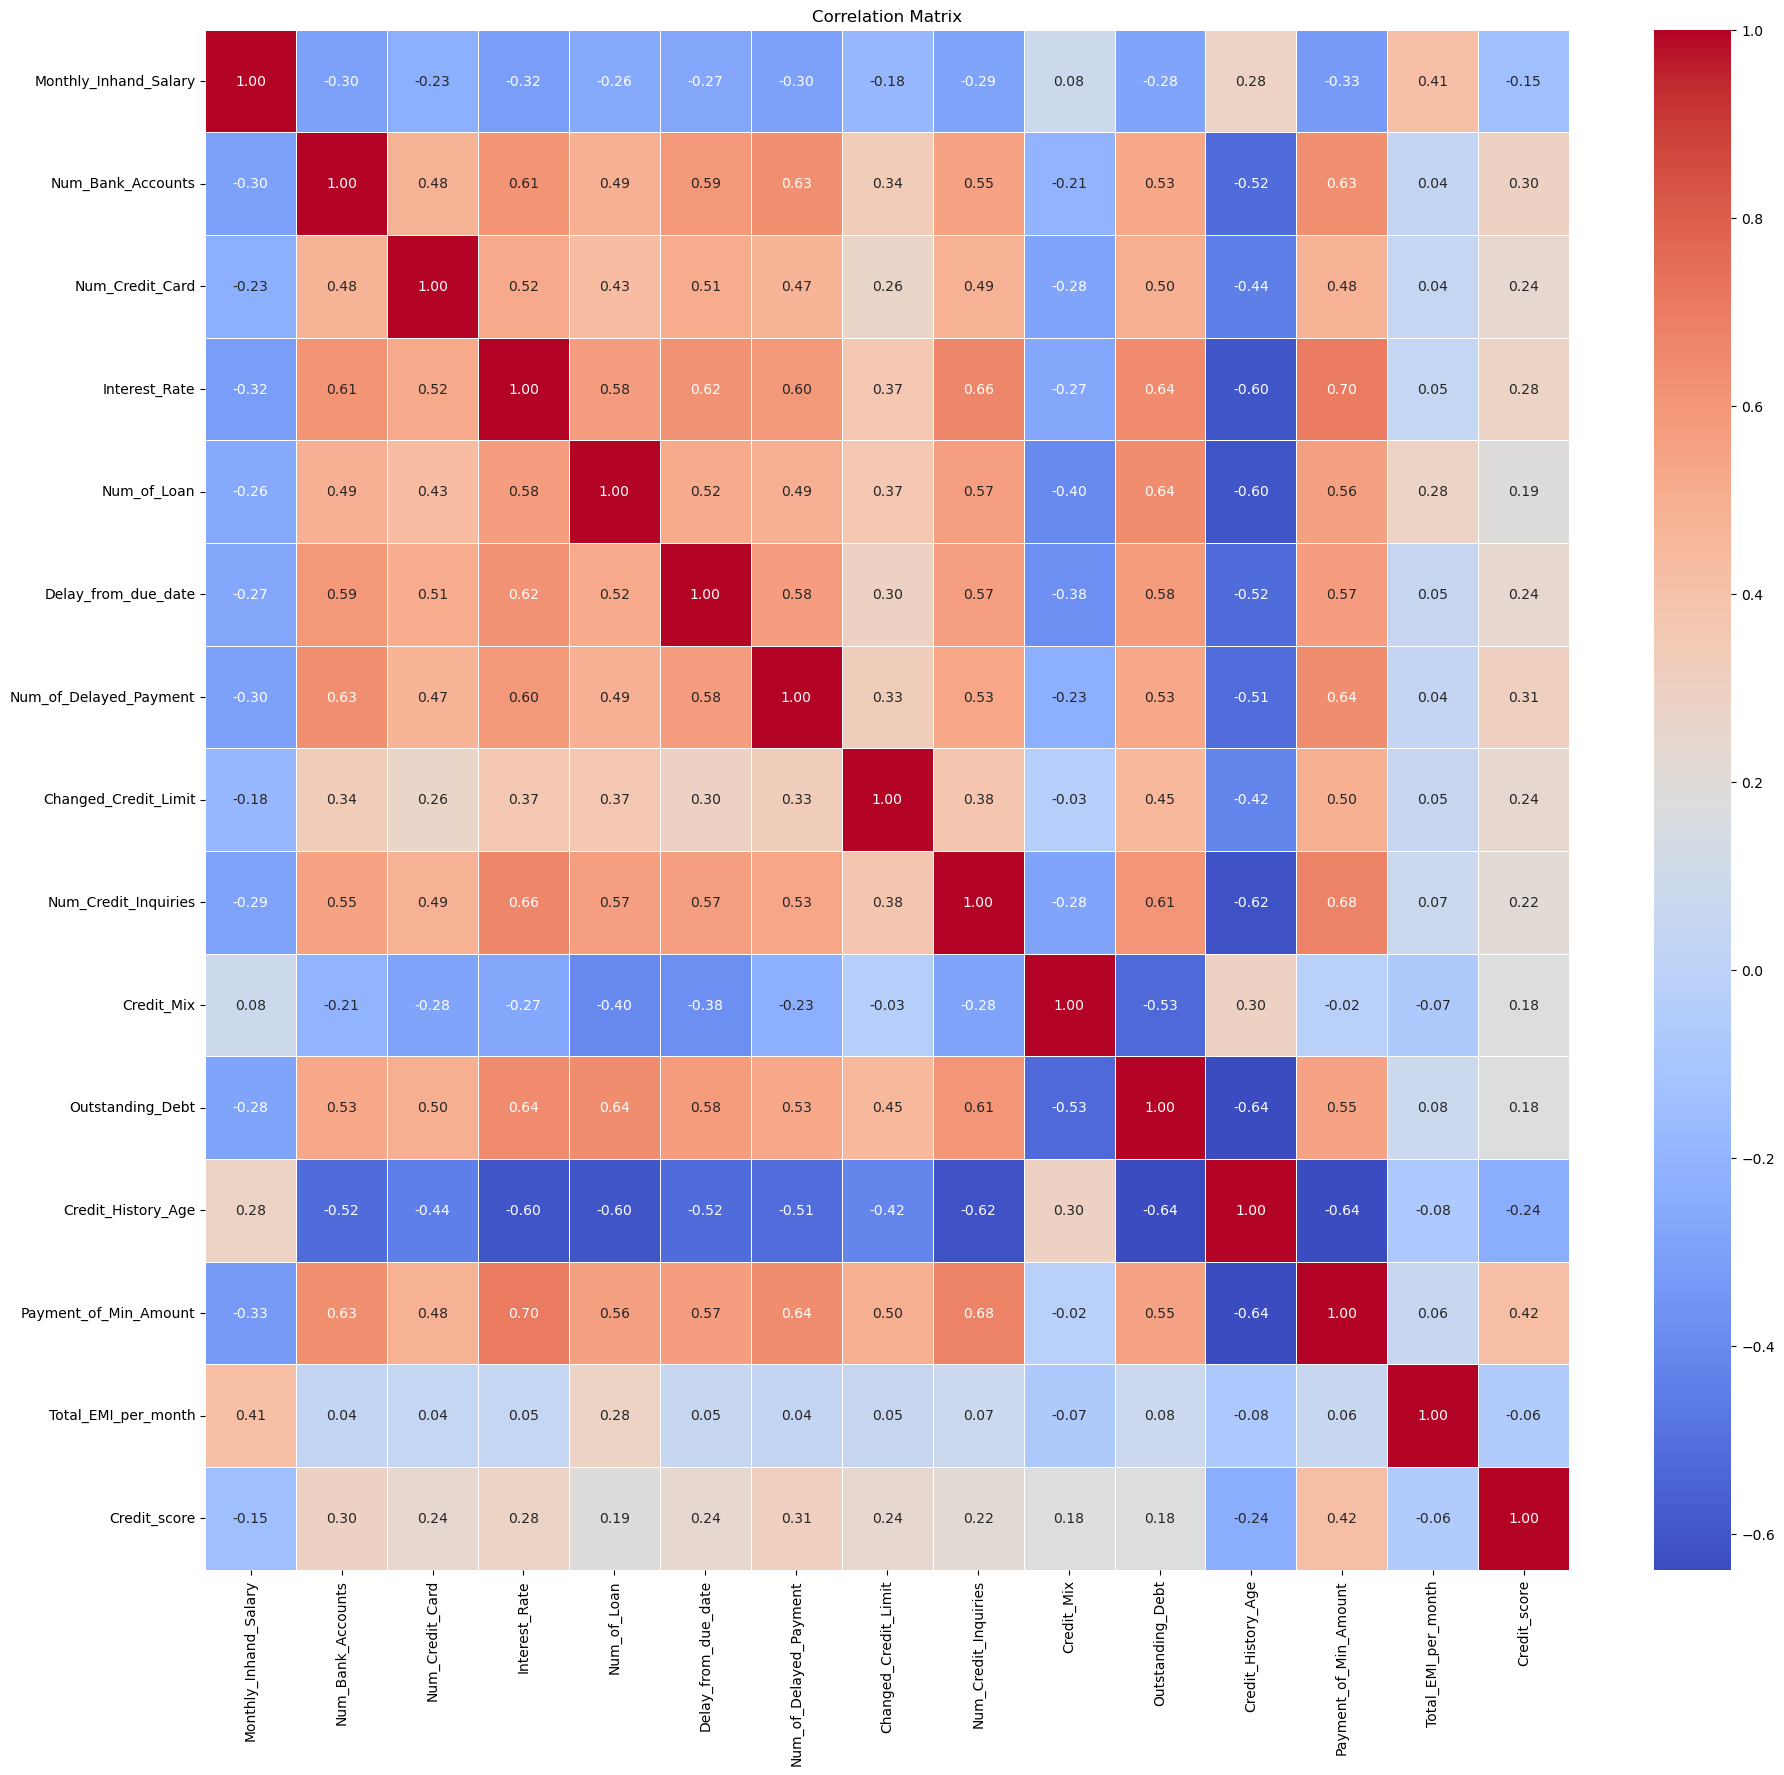

In [6027]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(22, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [6028]:
df.T

30719     24073     67223     44490     56739  \
Monthly_Inhand_Salary  -0.852891 -0.102295 -0.238238 -0.460745 -0.307183   
Num_Bank_Accounts      -1.907637 -1.162641 -1.162641 -0.790143 -1.162641   
Num_Credit_Card        -0.183061 -1.116570 -0.649815 -0.649815  0.283693   
Interest_Rate          -0.652684 -0.652684 -1.099409 -1.322771 -1.322771   
Num_of_Loan            -0.176113 -1.003886 -0.589999 -0.589999  0.237773   
Delay_from_due_date    -1.271257 -0.540263 -0.540263 -0.340901 -0.739625   
Num_of_Delayed_Payment -1.322138 -0.250876 -0.097838  0.820386 -0.403913   
Changed_Credit_Limit   -0.404720 -0.060791 -1.123149  0.150151 -0.056206   
Num_Credit_Inquiries    0.361902  0.618923 -0.923201 -0.409160 -0.409160   
Credit_Mix             -0.187726 -0.187726 -0.187726 -0.187726 -0.187726   
Outstanding_Debt       -1.076683 -1.056194 -0.723196 -1.168265 -1.200314   
Credit_History_Age      1.443883  0.666530  1.625602 -0.312732  0.717008   
Payment_of_Min_Amount  -1.048789 -1.048789 -1.048789 -1.048789 -1.048789   
Total_EMI_per_month    -0.242891 -0.639548 -0.504737 -0.511459  0.023820   
Credit_score            0.000000  0.000000  0.000000  0.000000  0.000000   

                           43884     64534     40271     60285     30712  ...  \
Monthly_Inhand_Salary  -0.649979 -0.482416 -0.867585 -0.920143 -0.838489  ...   
Num_Bank_Accounts      -1.162641  0.327351 -1.535139 -1.907637 -1.907637  ...   
Num_Credit_Card        -2.050078 -0.183061 -0.183061 -2.050078 -0.183061  ...   
Interest_Rate          -1.211090 -0.205960 -0.652684 -0.764365 -0.652684  ...   
Num_of_Loan            -0.589999 -0.176113 -1.417772 -0.589999 -0.176113  ...   
Delay_from_due_date    -0.340901  0.257184 -0.473809 -0.540263 -1.271257  ...   
Num_of_Delayed_Payment -1.781250 -0.403913 -1.016063 -1.322138 -1.475175  ...   
Changed_Credit_Limit   -0.582035  0.865523  0.021751 -1.000863 -0.404720  ...   
Num_Credit_Inquiries    0.361902 -1.437242 -0.152139 -0.409160 -0.409160  ...   
Credit_Mix             -0.187726  1.126063 -0.187726 -0.187726 -0.187726  ...   
Outstanding_Debt       -1.057634 -0.961433 -0.847737 -0.310538 -1.076683  ...   
Credit_History_Age      0.151660  1.332833  0.282902  1.615507  1.383310  ...   
Payment_of_Min_Amount  -1.048789  0.953481 -1.048789 -1.048789 -1.048789  ...   
Total_EMI_per_month    -0.586103 -0.279627 -0.783021 -0.641636 -0.578121  ...   
Credit_score            0.000000  0.000000  0.000000  0.000000  0.000000  ...   

                           17942     92785     83433     76142     43970  \
Monthly_Inhand_Salary  -0.528208 -0.981905 -0.929653  0.239484  0.314613   
Num_Bank_Accounts       0.699849  1.072348  0.327351  0.327351  0.327351   
Num_Credit_Card         0.283693 -1.116570  0.283693 -1.583324  1.217202   
Interest_Rate           0.017402 -0.094279  1.580938  0.464127  0.575808   
Num_of_Loan            -1.417772  0.237773  1.065545  0.237773  1.065545   
Delay_from_due_date    -0.673171  0.190730  1.519809  0.124276  1.652717   
Num_of_Delayed_Payment -0.709988 -0.250876  0.820386 -0.709988  0.667348   
Changed_Credit_Limit    0.862466 -0.892335  2.092967  0.486437 -0.575920   
Num_Credit_Inquiries   -1.180221 -0.409160  0.104881  0.104881  1.389984   
Credit_Mix              1.126063  1.126063 -1.501515  1.126063 -1.501515   
Outstanding_Debt       -0.223125 -0.686943  2.911047 -0.503267  0.119624   
Credit_History_Age      1.595316  0.212233 -0.625693 -1.090085  0.070896   
Payment_of_Min_Amount   0.953481  0.953481  0.953481  0.953481  0.953481   
Total_EMI_per_month    -0.783021 -0.545999 -0.486011  0.604926  0.987185   
Credit_score            2.000000  2.000000  2.000000  2.000000  2.000000   

                           21346     9280      90990     31683     25622  
Monthly_Inhand_Salary  -0.881070 -1.088846 -0.902507  0.032564 -0.970745  
Num_Bank_Accounts       1.444846  0.699849 -0.045147  0.327351  0.327351  
Num_Credit_Card         1.683956 -1.116570  0.283693  0.750448  0.28369

Variance for Class 0 :
 Monthly_Inhand_Salary     1.255348
Num_Bank_Accounts         0.684765
Num_Credit_Card           0.720342
Interest_Rate             0.299106
Num_of_Loan               0.469076
Delay_from_due_date       0.306601
Num_of_Delayed_Payment    0.721926
Changed_Credit_Limit      0.535410
Num_Credit_Inquiries      0.438472
Credit_Mix                0.259049
Outstanding_Debt          0.294784
Credit_History_Age        0.543924
Payment_of_Min_Amount     0.434909
Total_EMI_per_month       1.704180
Credit_score              0.000000
dtype: float64


Variance for Class 0 :
 Monthly_Inhand_Salary     0.660985
Num_Bank_Accounts         0.866521
Num_Credit_Card           0.852877
Interest_Rate             0.985478
Num_of_Loan               1.005343
Delay_from_due_date       1.174332
Num_of_Delayed_Payment    0.882477
Changed_Credit_Limit      1.166228
Num_Credit_Inquiries      0.914595
Credit_Mix                1.395516
Outstanding_Debt          1.027038
Credit_History_Age        0.776837
Payment_of_Min_Amount     0.613052
Total_EMI_per_month       0.552503
Credit_score              0.000000
dtype: float64


Variance for Class 0 :
 Monthly_Inhand_Salary     0.894769
Num_Bank_Accounts         0.777926
Num_Credit_Card           0.750482
Interest_Rate             0.733293
Num_of_Loan               0.976203
Delay_from_due_date       0.730264
Num_of_Delayed_Payment    0.750021
Changed_Credit_Limit      1.070351
Num_Credit_Inquiries      0.851166
Credit_Mix                1.024276
Outstanding_Debt          1.025407
Credit_History_Age        1.019424
Payment_of_Min_Amount     0.928181
Total_EMI_per_month       0.734194
Credit_score              0.000000
dtype: float64


Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
30719              -0.852891          -1.907637        -0.183061   
24073              -0.102295          -1.162641        -1.116570   
67223              -0.238238          -1.162641        -0.649815   
44490              -0.460745          -0.790143        -0.649815   
56739              -0.307183          -1.162641         0.283693   
...                      ...                ...              ...   
21346              -0.881070           1.444846         1.683956   
9280               -1.088846           0.699849        -1.116570   
90990              -0.902507          -0.045147         0.283693   
31683               0.032564           0.327351         0.750448   
25622              -0.970745           0.327351         0.283693   

       Interest_Rate  Num_of_Loan  Delay_from_due_date  \
30719      -0.652684    -0.176113            -1.271257   
24073      -0.652684    -1.003886            -0.540263   
67223      -1.099409    -0.589999            -0.540263   
44490      -1.322771    -0.589999            -0.340901   
56739      -1.322771     0.237773            -0.739625   
...              ...          ...                  ...   
21346       0.575808     1.065545             1.054632   
9280       -0.987728     1.065545             0.523000   
90990      -0.317641    -0.589999            -0.673171   
31683       2.027663     2.307204             2.117895   
25622      -0.987728     0.237773             0.589454   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
30719               -1.322138             -0.404720              0.361902   
24073               -0.250876             -0.060791              0.618923   
67223               -0.097838             -1.123149             -0.923201   
44490                0.820386              0.150151             -0.409160   
56739               -0.403913             -0.056206             -0.409160   
...                       ...                   ...                   ...   
21346                0.820386              0.672923              0.875943   
9280                -0.097838              0.683623              0.618923   
90990               -0.709988              0.758523             -0.152139   
31683                1.432535              1.252252              0.618923   
25622                0.514311              0.144037             -0.152139   

       Credit_Mix  Outstanding_Debt  Credit_History_Age  \
30719   -0.187726         -1.076683            1.443883   
24073   -0.187726         -1.056194            0.666530   
67223   -0.187726         -0.723196            1.625602   
44490   -0.187726         -1.168265           -0.312732   
56739   -0.187726         -1.200314            0.717008   
...           ...               ...                 ...   
21346   -1.501515          1.419170           -1.150658   
9280     1.126063          0.486270           -0.979035   
90990   -0.187726          0.057530            0.666530   
31683   -1.501515          3.098512           -1.150658   
25622    1.126063         -0.928642           -0.767029   

       Payment_of_Min_Amount  Total_EMI_per_month  Credit_score  
30719              -1.048789            -0.242891             0  
24073              -1.048789            -0.639548             0  
67223              -1.048789            -0.504737             0  
44490              -1.048789            -0.511459             0  
56739              -1.048789             0.023820             0  
...                      ...                  ...           ...  
21346               0.953481            -0.363943             2  
9280                0.953481            -0.463266             2  
90990              -1.048789            -0.054065             2  
31683               0.953481             1.420534             2  
25622               0.953481             0.334621             2  

[45000 rows x 15 columns]

In [6674]:
np.NaN


nan

In [ ]:
# Define the hyperparameter values to search
params = {
    'crt': ['gini', 'entropy'],
    'mdpth': [x for x in range(2, 30)],
}
bscore = 0
bparams = {} 
for crt in params['crt']:
    for mdpth in params['mdpth']:
        dti = DecisionTreeClassifier(criterion=crt, max_depth=mdpth, random_state=42)
        # Perform k-fold cross-validation with your custom metric
        kf = KFold(n_splits=5, shuffle=True, random_state=42)  
        # Adjust the number of splits as needed
        custom_metric_scores = cross_val_score(dti, X, y, cv=kf, scoring=custom_scorer)